In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Data Preprocessing

## Life Expectancy

In [ ]:
Life_exp = pd.read_csv('Life Expectancy.csv')

In [ ]:

Life_exp.head()

IndicatorCode                         Indicator ValueType  \
0  WHOSIS_000001  Life expectancy at birth (years)      text   
1  WHOSIS_000001  Life expectancy at birth (years)      text   
2  WHOSIS_000001  Life expectancy at birth (years)      text   
3  WHOSIS_000001  Life expectancy at birth (years)      text   
4  WHOSIS_000001  Life expectancy at birth (years)      text   

  ParentLocationCode         ParentLocation Location type SpatialDimValueCode  \
0                AFR                 Africa       Country                 LSO   
1                AFR                 Africa       Country                 CAF   
2                EMR  Eastern Mediterranean       Country                 SOM   
3                AFR                 Africa       Country                 SWZ   
4                AFR                 Africa       Country                 MOZ   

                   Location Period type  Period  ...  FactValueUoM  \
0                   Lesotho        Year    2019  ...           NaN   
1  Central African Republic        Year    2019  ...           NaN   
2                   Somalia        Year    2019  ...           NaN   
3                  Eswatini        Year    2019  ...           NaN   
4                Mozambique        Year    2019  ...           NaN   

  FactValueNumericLowPrefix FactValueNumericLow FactValueNumericHighPrefix  \
0                       NaN               50.48                        NaN   
1                       NaN               51.78                        NaN   
2                       NaN               53.93                        NaN   
3                       NaN               54.44                        NaN   
4                       NaN               57.27                        NaN   

   FactValueNumericHigh             Value  FactValueTranslationID  \
0                 53.18  51.8 [50.5-53.2]                     NaN   
1                 54.20  52.9 [51.8-54.2]                     NaN   
2                 56.72  55.2 [53.9-56.7]                     NaN   
3                 57.30  55.7 [54.4-57.3]                     NaN   
4                 59.75  58.5 [57.3-59.7]                     NaN   

   FactComments  Language              DateModified  
0           NaN        EN  2024-08-01T18:30:00.000Z  
1           NaN        EN  2024-08-01T18:30:00.000Z  
2           NaN        EN  2024-08-01T18:30:00.000Z  
3           NaN        EN  2024-08-01T18:30:00.000Z  
4           NaN        EN  2024-08-01T18:30:00.000Z  

[5 rows x 34 columns]

In [ ]:
Life_exp.shape

(185, 34)

In [ ]:
columns = ['ParentLocationCode','Location', 'FactValueNumeric']

In [ ]:
Life_exp1 = Life_exp[columns]

In [ ]:
Life_exp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ParentLocationCode  185 non-null    object 
 1   Location            185 non-null    object 
 2   FactValueNumeric    185 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.5+ KB


In [ ]:
Life_exp1[Life_exp1['Location'] == 'India']

ParentLocationCode Location  FactValueNumeric
65               SEAR    India             70.73

In [ ]:
Life_exp1.columns

Index(['ParentLocationCode', 'Location', 'FactValueNumeric'], dtype='object')

In [ ]:
Life_exp1.columns=['ParentLocationCode', 'Location', 'Life expectancy']

## Air Pollutants

In [ ]:
CO = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'CO')
OC = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'OC')
PM25 = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'PM2.5')
SO2 = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'SO2')
BC = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'BC')
NH3 = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'NH3')
NMVOC = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'NMVOC')
NOx = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'NOx')
PM10 = pd.read_excel('Air Pollutants data.xlsx', sheet_name = 'PM10')

In [ ]:
pollutants=CO.merge(OC,left_on='Name',right_on='Name',how='inner')

In [ ]:
pollutants=pollutants.merge(PM25,left_on='Name',right_on='Name',how='inner')
pollutants=pollutants.merge(SO2,left_on='Name',right_on='Name',how='inner')
pollutants=pollutants.merge(BC,left_on='Name',right_on='Name',how='inner')
pollutants=pollutants.merge(NH3,left_on='Name',right_on='Name',how='inner')
pollutants=pollutants.merge(NMVOC,left_on='Name',right_on='Name',how='inner')
pollutants=pollutants.merge(NOx,left_on='Name',right_on='Name',how='inner')
pollutants=pollutants.merge(PM10,left_on='Name',right_on='Name',how='inner')
pollutants.head()

Name           CO         OC       PM2.5         SO2         BC  \
0          Aruba     4.229931   0.033575    0.180539    4.291816   0.048939   
1    Afghanistan   288.923620   9.163871   24.842107   53.420171   2.767595   
2         Angola  1853.820844  50.281522  115.711374   92.396707  18.594678   
3       Anguilla     0.452628   0.002683    0.008835    0.021196   0.003708   
4  Int. Aviation   288.074617   3.883664   39.516630  216.611521   7.900351   

          NH3       NMVOC          NOx        PM10  
0    0.111502    1.462099     3.261320    0.253814  
1   89.370336  131.843273    44.114516   37.005460  
2  120.655167  570.424894   152.784049  259.086569  
3    0.001917    0.113676     0.222887    0.010623  
4   32.044108   93.912135  2704.689561   39.516630

## Polluting fuels


In [ ]:
df1=pd.read_csv('data2.csv')
df1=df1[df1['Period']==2019]
df1.head()
df1.shape

(582, 34)

In [ ]:
df1=df1[df1['Dim1']=='Total']
df1.shape

(194, 34)

In [ ]:
columns_to_keep = [
    'ParentLocationCode',
    'ParentLocation',
    'SpatialDimValueCode',
    'Location',
    'FactValueNumeric',
    'FactValueNumericLow',
    'FactValueNumericHigh',
    'Value'
]

In [ ]:
df1 = df1[columns_to_keep]
df1.index = range(0, len(df1))
df1.head()

ParentLocationCode   ParentLocation SpatialDimValueCode  \
0                EUR           Europe                 AND   
1                AMR         Americas                 ATG   
2                WPR  Western Pacific                 AUS   
3                EUR           Europe                 AUT   
4                AMR         Americas                 BHS   

              Location  FactValueNumeric  FactValueNumericLow  \
0              Andorra               0.0                  0.0   
1  Antigua and Barbuda               0.0                  0.0   
2            Australia               0.0                  0.0   
3              Austria               0.0                  0.0   
4              Bahamas               0.0                  0.0   

   FactValueNumericHigh      Value  
0                   0.0  0 [0 - 0]  
1                   0.0  0 [0 - 0]  
2                   0.0  0 [0 - 0]  
3                   0.0  0 [0 - 0]  
4                   0.0  0 [0 - 0]

In [ ]:
dfa=df1[['Location','FactValueNumeric']]
dfa.columns

Index(['Location', 'FactValueNumeric'], dtype='object')

In [ ]:
dfa.columns=['Location', 'per_polluting_fuels']

In [ ]:
dfa.head()

Location  per_polluting_fuels
0              Andorra                  0.0
1  Antigua and Barbuda                  0.0
2            Australia                  0.0
3              Austria                  0.0
4              Bahamas                  0.0

## Other Predictors

In [ ]:
dfp=pd.read_csv('data_x.csv')
dfp.head()

IndicatorCode  \
0    SDGAIRBODA   
1    SDGAIRBODA   
2    SDGAIRBODA   
3    SDGAIRBODA   
4    SDGAIRBODA   

                                                                                                Indicator  \
0  Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)   
1  Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)   
2  Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)   
3  Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)   
4  Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AMR       Americas       Country   
1   numeric                AMR       Americas       Country   
2   numeric                AMR       Americas       Country   
3   numeric                AMR       Americas       Country   
4   numeric                AMR       Americas       Country   

  SpatialDimValueCode             Location Period type  Period  ...  \
0                 ATG  Antigua and Barbuda        Year    2019  ...   
1                 ATG  Antigua and Barbuda        Year    2019  ...   
2                 BHS              Bahamas        Year    2019  ...   
3                 BHS              Bahamas        Year    2019  ...   
4                 BHS              Bahamas        Year    2019  ...   

   FactValueUoM FactValueNumericLowPrefix FactValueNumericLow  \
0           NaN                       NaN               0.056   
1           NaN                       NaN               0.024   
2           NaN                       NaN               0.000   
3           NaN                       NaN               0.000   
4           NaN                       NaN               0.000   

  FactValueNumericHighPrefix FactValueNumericHigh    Value  \
0                        NaN                 0.41  0 [0-0]   
1                        NaN                 0.18  0 [0-0]   
2                        NaN                 0.24  0 [0-0]   
3                        NaN                 0.13  0 [0-0]   
4                        NaN                 0.39  0 [0-0]   

  FactValueTranslationID  FactComments  Language              DateModified  
0                    NaN           NaN        EN  2024-10-02T18:30:00.000Z  
1                    NaN           NaN        EN  2024-10-02T18:30:00.000Z  
2                    NaN           NaN        EN  2024-10-02T18:30:00.000Z  
3                    NaN           NaN        EN  2024-10-02T18:30:00.000Z  
4                    NaN           NaN        EN  2024-10-02T18:30:00.000Z  

[5 rows x 34 columns]

In [ ]:
dfp.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [ ]:
dfp.drop(columns=['IndicatorCode','Indicator','ValueType','Location type','Period type',
                 'DateModified','FactComments','FactValueTranslationID','IsLatestYear',
                  'Dim1ValueCode', 'Dim2 type','ParentLocationCode','SpatialDimValueCode','Dim1 type','Dim2ValueCode',
       'Dim3 type', 'Dim3', 'Dim3ValueCode','DataSourceDimValueCode','DataSource', 'FactValueNumericPrefix',
                  'FactValueUoM', 'FactValueNumericLowPrefix','FactValueNumericHighPrefix',
                  'Value','Language'],inplace=True)
dfp.head()

ParentLocation             Location  Period        Dim1  \
0       Americas  Antigua and Barbuda    2019  Both sexes   
1       Americas  Antigua and Barbuda    2019      Female   
2       Americas              Bahamas    2019  Both sexes   
3       Americas              Bahamas    2019      Female   
4       Americas              Bahamas    2019        Male   

                              Dim2  FactValueNumeric  FactValueNumericLow  \
0  Trachea, bronchus, lung cancers             0.190                0.056   
1  Trachea, bronchus, lung cancers             0.084                0.024   
2  Trachea, bronchus, lung cancers             0.079                0.000   
3  Trachea, bronchus, lung cancers             0.042                0.000   
4  Trachea, bronchus, lung cancers             0.130                0.000   

   FactValueNumericHigh  
0                  0.41  
1                  0.18  
2                  0.24  
3                  0.13  
4                  0.39

In [ ]:
dfp.columns

Index(['ParentLocation', 'Location', 'Period', 'Dim1', 'Dim2',
       'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh'],
      dtype='object')

In [ ]:
dfp=dfp[dfp.Period==2019]
dfp.shape

(3240, 8)

In [ ]:
dfp.Dim1.unique()

array(['Both sexes', 'Female', 'Male'], dtype=object)

In [ ]:
dfp=dfp[dfp.Dim1=='Both sexes']
dfp.shape

(1080, 8)

In [ ]:
dfp.Dim2.unique()

array(['Trachea, bronchus, lung cancers',
       'Acute lower respiratory infections',
       'Chronic obstructive pulmonary disease', 'Stroke', 'All causes',
       'Ischaemic heart disease'], dtype=object)

In [ ]:
dfp=dfp[dfp.Dim2=='All causes']
dfp.shape

(180, 8)

In [ ]:
dfp.drop(columns=['Period','Dim1','Dim2'],inplace=True)

<ipython-input-285-fa42e4f61287>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp.drop(columns=['Period','Dim1','Dim2'],inplace=True)


In [ ]:
dfp.head()

ParentLocation   Location  FactValueNumeric  FactValueNumericLow  \
466         Americas    Bahamas             10.42                 0.00   
520  Western Pacific  Australia              9.81                 6.60   
521           Europe     France             10.03                 7.28   
528           Europe      Spain             10.12                 7.09   
532           Europe   Portugal             10.00                 6.74   

     FactValueNumericHigh  
466                 20.80  
520                 13.10  
521                 13.02  
528                 13.32  
532                 13.78

In [ ]:
dfp.columns

Index(['ParentLocation', 'Location', 'FactValueNumeric', 'FactValueNumericLow',
       'FactValueNumericHigh'],
      dtype='object')

In [ ]:
dfp.columns=['ParentLocation', 'Location', 'Death_rate', 'Lower_bound',
       'Upper_bound']

In [ ]:
dfp.head()

ParentLocation   Location  Death_rate  Lower_bound  Upper_bound
466         Americas    Bahamas       10.42         0.00        20.80
520  Western Pacific  Australia        9.81         6.60        13.10
521           Europe     France       10.03         7.28        13.02
528           Europe      Spain       10.12         7.09        13.32
532           Europe   Portugal       10.00         6.74        13.78

In [ ]:
dfp2=pd.read_csv('/content/popden.csv')
dfp2.head()

Data Source   Unnamed: 1
0                NaN          NaN
1  Last Updated Date          NaN
2                NaN          NaN
3       Country Name  2019.000000
4              Aruba   606.683333

In [ ]:
dfp2.columns

Index(['Data Source', 'Unnamed: 1'], dtype='object')

In [ ]:
dfp2=dfp2.iloc[3:,]
dfp2 = dfp2.reset_index(drop=True)
dfp2.columns=['Country', 'Density']
dfp2.head()

Country      Density
0                 Country Name  2019.000000
1                        Aruba   606.683333
2  Africa Eastern and Southern    45.533465
3                  Afghanistan    58.041061
4   Africa Western and Central    51.224525

In [ ]:
ig=pd.read_excel('/content/income_group.xlsx',sheet_name='Country Analytical History',)
ig.head(10)

Unnamed: 0        World Bank Analytical Classifications   Unnamed: 2  \
0        NaN  (presented in World Development Indicators)          NaN   
1        NaN    GNI per capita in US$ (Atlas methodology)          NaN   
2        NaN                                          NaN          NaN   
3        NaN                          Bank's fiscal year:         FY89   
4        NaN                     Data for calendar year :         1987   
5        NaN                               Low income (L)       <= 480   
6        NaN                     Lower middle income (LM)    481-1,940   
7        NaN                     Upper middle income (UM)  1,941-6,000   
8        NaN                              High income (H)     > 6,000    
9        NaN                                          NaN          NaN   

    Unnamed: 3   Unnamed: 4   Unnamed: 5   Unnamed: 6   Unnamed: 7  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3         FY90         FY91         FY92         FY93         FY94   
4         1988         1989         1990         1991         1992   
5       <= 545       <= 580       <= 610       <= 635       <= 675   
6    546-2,200    581-2,335    611-2,465    636-2,555    676-2,695   
7  2,201-6,000  2,336-6,000  2,466-7,620  2,556-7,910  2,696-8,355   
8      > 6,000      > 6,000      > 7,620      > 7,910      > 8,355   
9          NaN          NaN          NaN          NaN          NaN   

    Unnamed: 8   Unnamed: 9  ...   Unnamed: 29   Unnamed: 30   Unnamed: 31  \
0          NaN          NaN  ...           NaN           NaN           NaN   
1          NaN          NaN  ...           NaN           NaN           NaN   
2          NaN          NaN  ...           NaN           NaN           NaN   
3         FY95         FY96  ...          FY16          FY17          FY18   
4         1993         1994  ...          2014          2015          2016   
5       <= 695       <= 725  ...      <= 1,045      <= 1,025      <= 1,005   
6    696-2,785    726-2,895  ...   1,046-4,125   1,026-4,035   1,006-3,955   
7  2,786-8,625  2,896-8,955  ...  4,126-12,735  4,036-12,475  3,956-12,235   
8      > 8,625      > 8,955  ...      > 12,735      > 12,475      > 12,235   
9          NaN          NaN  ...           NaN           NaN           NaN   

    Unnamed: 32   Unnamed: 33     Unnamed: 34     Unnamed: 35     Unnamed: 36  \
0           NaN           NaN             NaN             NaN             NaN   
1           NaN           NaN             NaN             NaN             NaN   
2           NaN           NaN             NaN             NaN             NaN   
3          FY19          FY20            FY21            FY22            FY23   
4          2017          2018            2019            2020            2021   
5        <= 995      <= 1,025        <= 1,035        <= 1,045        <= 1,085   
6     996-3,895   1,026-3,995   1,036 - 4,045   1,046 - 4,095   1,086 - 4,255   
7  3,896-12,055  3,996-12,375  4,046 - 12,535  4,096 - 12,695  4,256 - 13,205   
8      > 12,055      > 12,375        > 12,535        > 12,695        > 13,205   
9           NaN           NaN             NaN             NaN             NaN   

      Unnamed: 37     Unnamed: 38  
0             NaN             NaN  
1             NaN             NaN  
2             NaN             NaN  
3            FY24            FY25  
4            2022            2023  
5        <= 1,135        <= 1,145  
6   1,136 - 4,465   1,146 - 4,515  
7  4,466 - 13,845  4,516 - 14,005  
8        > 13,845        > 14,005  
9             NaN             NaN  

[10 rows x 39 columns]

In [ ]:
ig=ig.iloc[4:229,1:].reset_index(drop=True)

In [ ]:
ig.columns = ig.iloc[0]

In [ ]:
ig.head()

0  Data for calendar year :         1987         1988         1989  \
0  Data for calendar year :         1987         1988         1989   
1            Low income (L)       <= 480       <= 545       <= 580   
2  Lower middle income (LM)    481-1,940    546-2,200    581-2,335   
3  Upper middle income (UM)  1,941-6,000  2,201-6,000  2,336-6,000   
4           High income (H)     > 6,000       > 6,000      > 6,000   

0         1990         1991         1992         1993         1994  \
0         1990         1991         1992         1993         1994   
1       <= 610       <= 635       <= 675       <= 695       <= 725   
2    611-2,465    636-2,555    676-2,695    696-2,785    726-2,895   
3  2,466-7,620  2,556-7,910  2,696-8,355  2,786-8,625  2,896-8,955   
4      > 7,620      > 7,910      > 8,355      > 8,625      > 8,955   

0         1995  ...          2014          2015          2016          2017  \
0         1995  ...          2014          2015          2016          2017   
1       <= 765  ...      <= 1,045      <= 1,025      <= 1,005        <= 995   
2    766-3,035  ...   1,046-4,125   1,026-4,035   1,006-3,955     996-3,895   
3  3,036-9,385  ...  4,126-12,735  4,036-12,475  3,956-12,235  3,896-12,055   
4      > 9,385  ...      > 12,735      > 12,475      > 12,235      > 12,055   

0          2018            2019            2020            2021  \
0          2018            2019            2020            2021   
1      <= 1,025        <= 1,035        <= 1,045        <= 1,085   
2   1,026-3,995   1,036 - 4,045   1,046 - 4,095   1,086 - 4,255   
3  3,996-12,375  4,046 - 12,535  4,096 - 12,695  4,256 - 13,205   
4      > 12,375        > 12,535        > 12,695        > 13,205   

0            2022            2023  
0            2022            2023  
1        <= 1,135        <= 1,145  
2   1,136 - 4,465   1,146 - 4,515  
3  4,466 - 13,845  4,516 - 14,005  
4        > 13,845        > 14,005  

[5 rows x 38 columns]

In [ ]:
ig=ig.iloc[6:224,].reset_index(drop=True)

In [ ]:
ig.columns

Index(['Data for calendar year :',                       1987,
                             1988,                       1989,
                             1990,                       1991,
                             1992,                       1993,
                             1994,                       1995,
                             1996,                       1997,
                             1998,                       1999,
                             2000,                       2001,
                             2002,                       2003,
                             2004,                       2005,
                             2006,                       2007,
                             2008,                       2009,
                             2010,                       2011,
                             2012,                       2013,
                             2014,                       2015,
                             2016,                     

In [ ]:
ig=ig[['Data for calendar year :',2019]]

In [ ]:
ig.columns=['Country','Income_group']

In [ ]:
dfp3=pd.read_csv('forest cover.csv')
dfp3.columns=['Location','Forest_cover']
dfp3.head()

Location       Forest_cover
0     Afghanistan   1.85278199408184
1         Albania   28.7919708029197
2         Algeria  0.814110350369751
3  American Samoa               85.8
4         Andorra   34.0425531914894

In [ ]:
dfp31=pd.read_csv('urban.csv')
dfp31.columns=['Location','Urbanisation']
dfp31.head()

Location Urbanisation
0     Afghanistan       25.754
1         Albania       61.229
2         Algeria       73.189
3  American Samoa       87.147
4         Andorra       87.984

In [ ]:
dfp3=dfp3.merge(dfp31,
                left_on='Location',
                right_on='Location',
                how='inner')
dfp3.head()

Location       Forest_cover Urbanisation
0     Afghanistan   1.85278199408184       25.754
1         Albania   28.7919708029197       61.229
2         Algeria  0.814110350369751       73.189
3  American Samoa               85.8       87.147
4         Andorra   34.0425531914894       87.984

In [ ]:
dfp31=pd.read_csv('industry.csv')
dfp31.columns=['Location','Industrialisation']
dfp31.head()

Location Industrialisation
0     Afghanistan  14.0581123697768
1         Albania  22.9655306366233
2         Algeria  33.5743211841578
3  American Samoa                ..
4         Andorra  11.6998176283166

In [ ]:
dfp3=dfp3.merge(dfp31,
                left_on='Location',
                right_on='Location',
                how='inner')
dfp3.head()

Location       Forest_cover Urbanisation Industrialisation
0     Afghanistan   1.85278199408184       25.754  14.0581123697768
1         Albania   28.7919708029197       61.229  22.9655306366233
2         Algeria  0.814110350369751       73.189  33.5743211841578
3  American Samoa               85.8       87.147                ..
4         Andorra   34.0425531914894       87.984  11.6998176283166

In [ ]:
prec=pd.read_csv('/content/Precipitation levels.csv')
prec.head()

Country Name    2019
0     Afghanistan   327.0
1         Albania  1485.0
2         Algeria    89.0
3  American Samoa     NaN
4         Andorra     NaN

In [ ]:
prec.columns=['Country','Precipitation(mm)']
prec.head()

Country  Precipitation(mm)
0     Afghanistan              327.0
1         Albania             1485.0
2         Algeria               89.0
3  American Samoa                NaN
4         Andorra                NaN

## Merging all datasets

In [ ]:
merged_df = dfp.merge(dfp2, left_on='Location', right_on='Country', how='left')
merged_df.shape

(180, 7)

In [ ]:
merged_df.head()
merged_df = merged_df.drop(columns='Country')

In [ ]:
merged_df.head()

ParentLocation   Location  Death_rate  Lower_bound  Upper_bound  \
0         Americas    Bahamas       10.42         0.00        20.80   
1  Western Pacific  Australia        9.81         6.60        13.10   
2           Europe     France       10.03         7.28        13.02   
3           Europe      Spain       10.12         7.09        13.32   
4           Europe   Portugal       10.00         6.74        13.78   

      Density  
0         NaN  
1    3.293651  
2  123.059446  
3   94.350809  
4  112.288583

In [ ]:
merged_df = merged_df.merge(Life_exp1, left_on='Location', right_on='Location', how='left')
merged_df.shape

(180, 8)

In [ ]:
merged_df.head()

ParentLocation   Location  Death_rate  Lower_bound  Upper_bound  \
0         Americas    Bahamas       10.42         0.00        20.80   
1  Western Pacific  Australia        9.81         6.60        13.10   
2           Europe     France       10.03         7.28        13.02   
3           Europe      Spain       10.12         7.09        13.32   
4           Europe   Portugal       10.00         6.74        13.78   

      Density ParentLocationCode  Life expectancy  
0         NaN                AMR            70.74  
1    3.293651                WPR            82.64  
2  123.059446                EUR            82.53  
3   94.350809                EUR            83.14  
4  112.288583                EUR            81.37

In [ ]:
merged_df = merged_df.merge(dfa, left_on='Location', right_on='Location', how='left')
merged_df.shape

(180, 9)

In [ ]:
merged_df.head()

ParentLocation   Location  Death_rate  Lower_bound  Upper_bound  \
0         Americas    Bahamas       10.42         0.00        20.80   
1  Western Pacific  Australia        9.81         6.60        13.10   
2           Europe     France       10.03         7.28        13.02   
3           Europe      Spain       10.12         7.09        13.32   
4           Europe   Portugal       10.00         6.74        13.78   

      Density ParentLocationCode  Life expectancy  per_polluting_fuels  
0         NaN                AMR            70.74                  0.0  
1    3.293651                WPR            82.64                  0.0  
2  123.059446                EUR            82.53                  0.0  
3   94.350809                EUR            83.14                  0.0  
4  112.288583                EUR            81.37                  0.0

In [ ]:
merged_df = merged_df.merge(dfp3, left_on='Location', right_on='Location', how='left')
merged_df.shape

(180, 12)

In [ ]:
merged_df.head()

ParentLocation   Location  Death_rate  Lower_bound  Upper_bound  \
0         Americas    Bahamas       10.42         0.00        20.80   
1  Western Pacific  Australia        9.81         6.60        13.10   
2           Europe     France       10.03         7.28        13.02   
3           Europe      Spain       10.12         7.09        13.32   
4           Europe   Portugal       10.00         6.74        13.78   

      Density ParentLocationCode  Life expectancy  per_polluting_fuels  \
0         NaN                AMR            70.74                  0.0   
1    3.293651                WPR            82.64                  0.0   
2  123.059446                EUR            82.53                  0.0   
3   94.350809                EUR            83.14                  0.0   
4  112.288583                EUR            81.37                  0.0   

       Forest_cover Urbanisation Industrialisation  
0               NaN          NaN               NaN  
1  17.4213145571644       86.124  25.2720792022262  
2  31.3567354631573       80.709   16.907003960354  
3  37.1677215644695       80.565  19.9779055762497  
4   36.154994891142       65.764   18.886083188208

In [ ]:
merged_df=merged_df.merge(ig, left_on='Location', right_on='Country', how='left')
merged_df.drop(columns='Country',inplace=True)

In [ ]:
merged_df

ParentLocation              Location  Death_rate  Lower_bound  \
0                 Americas               Bahamas       10.42         0.00   
1          Western Pacific             Australia        9.81         6.60   
2                   Europe                France       10.03         7.28   
3                   Europe                 Spain       10.12         7.09   
4                   Europe              Portugal       10.00         6.74   
..                     ...                   ...         ...          ...   
175               Americas             Guatemala       93.31        76.17   
176                 Europe       North Macedonia       95.58        57.30   
177               Americas                Guyana       96.13        63.40   
178  Eastern Mediterranean  Syrian Arab Republic       96.07        65.75   
179        South-East Asia             Indonesia       96.67        68.36   

     Upper_bound     Density ParentLocationCode  Life expectancy  \
0          20.80         NaN                AMR            70.74   
1          13.10    3.293651                WPR            82.64   
2          13.02  123.059446                EUR            82.53   
3          13.32   94.350809                EUR            83.14   
4          13.78  112.288583                EUR            81.37   
..           ...         ...                ...              ...   
175       109.70  159.609957                AMR            72.71   
176       146.30   74.395797                EUR            76.15   
177       130.70    4.102946                AMR            68.73   
178       148.30  110.839917                EMR            69.17   
179       126.40  145.132689               SEAR            71.40   

     per_polluting_fuels      Forest_cover Urbanisation Industrialisation  \
0                    0.0               NaN          NaN               NaN   
1                    0.0  17.4213145571644       86.124  25.2720792022262   
2                    0.0  31.3567354631573       80.709   16.907003960354   
3                    0.0  37.1677215644695       80.565  19.9779055762497   
4                    0.0   36.154994891142       65.764   18.886083188208   
..                   ...               ...          ...               ...   
175                 56.8  33.0291153415453       51.439  21.9422574352816   
176                 21.8  39.7101506740682       58.208  23.7034834116039   
177                  0.0  93.5968503937008       26.689  28.6893186333175   
178                  6.4  2.84310842454937       54.821  15.9160468546957   
179                 17.9  49.3942964092507       55.985  38.9517679950779   

    Income_group  
0            NaN  
1              H  
2              H  
3              H  
4              H  
..           ...  
175           UM  
176           UM  
177           UM  
178            L  
179           UM  

[180 rows x 13 columns]

In [ ]:
merged_df=merged_df.merge(prec, left_on='Location', right_on='Country', how='left')

##Main data from here

In [ ]:
merged_df=merged_df.merge(pollutants, left_on='Location', right_on='Name', how='left')

In [ ]:
merged_df

ParentLocation              Location  Death_rate  Lower_bound  \
0                 Americas               Bahamas       10.42         0.00   
1          Western Pacific             Australia        9.81         6.60   
2                   Europe                France       10.03         7.28   
3                   Europe                 Spain       10.12         7.09   
4                   Europe              Portugal       10.00         6.74   
..                     ...                   ...         ...          ...   
175               Americas             Guatemala       93.31        76.17   
176                 Europe       North Macedonia       95.58        57.30   
177               Americas                Guyana       96.13        63.40   
178  Eastern Mediterranean  Syrian Arab Republic       96.07        65.75   
179        South-East Asia             Indonesia       96.67        68.36   

     Upper_bound     Density ParentLocationCode  Life expectancy  \
0          20.80         NaN                AMR            70.74   
1          13.10    3.293651                WPR            82.64   
2          13.02  123.059446                EUR            82.53   
3          13.32   94.350809                EUR            83.14   
4          13.78  112.288583                EUR            81.37   
..           ...         ...                ...              ...   
175       109.70  159.609957                AMR            72.71   
176       146.30   74.395797                EUR            76.15   
177       130.70    4.102946                AMR            68.73   
178       148.30  110.839917                EMR            69.17   
179       126.40  145.132689               SEAR            71.40   

     per_polluting_fuels      Forest_cover  ...                  Name  \
0                    0.0               NaN  ...               Bahamas   
1                    0.0  17.4213145571644  ...             Australia   
2                    0.0  31.3567354631573  ...                France   
3                    0.0  37.1677215644695  ...                 Spain   
4                    0.0   36.154994891142  ...              Portugal   
..                   ...               ...  ...                   ...   
175                 56.8  33.0291153415453  ...             Guatemala   
176                 21.8  39.7101506740682  ...                   NaN   
177                  0.0  93.5968503937008  ...                Guyana   
178                  6.4  2.84310842454937  ...  Syrian Arab Republic   
179                 17.9  49.3942964092507  ...             Indonesia   

               CO          OC        PM2.5          SO2          BC  \
0       20.522264    0.196906     0.913361    13.318509    0.173927   
1     2118.857116   36.973240   138.985504   957.361035   23.793400   
2     2481.249729   42.499764   226.100082   191.697127   27.774003   
3     1123.881843   22.063090    99.945273   404.909456   18.893879   
4      229.957187    8.909173    45.582443    84.801949    4.339350   
..            ...         ...          ...          ...         ...   
175   1835.127011   60.608225   136.243316    83.255048   17.085126   
176           NaN         NaN          NaN          NaN         NaN   
177     53.640913    1.498710     4.420424    20.864181    0.663827   
178    169.613883    5.642596    13.067528   176.652116    1.758467   
179  10120.043871  402.152661  1063.335161  2660.097491  124.188295   

             NH3        NMVOC          NOx         PM10  
0       1.170414     6.026441    15.447838     1.506637  
1     618.172309   957.661476  1105.179363   185.602754  
2     876.659975  1020.240095   644.837670   297.478129  
3     584.272936   593.144931   705.883686   151.825633  
4      75.923563   136.622672   126.354822    57.052490  
..           ...          ...          ...          ...  
175   142.053155   330.075174   141.604818   253.927452  
176          NaN          NaN          NaN          NaN  
177    10.096626  

In [ ]:
list(merged_df[merged_df['Density'].isna()].Location)

['Bahamas',
 'Egypt',
 'Kyrgyzstan',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Congo',
 'Republic of Korea',
 'Yemen',
 "Lao People's Democratic Republic",
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Gambia',
 'Micronesia (Federated States of)',
 'Saint Lucia',
 'Slovakia',
 'Saint Vincent and the Grenadines',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Bolivia (Plurinational State of)']

In [ ]:
population_density_2019 = {
    "Bahamas": 39.428072,
    "Bolivia (Plurinational State of)": 10.773919,
    "Congo": 16.447031,
    "Democratic People's Republic of Korea": 216.241442,
    "Democratic Republic of the Congo": 40.999291,
    "Gambia": 242.771146,
    "Iran (Islamic Republic of)": 53.652788,
    "Kyrgyzstan": 34.359807,
    "Lao People's Democratic Republic": 31.358908,
    "Micronesia (Federated States of)": 157.545714,
    "Netherlands (Kingdom of the)": 515.143273,
    "Republic of Korea": 530.377275,
    "Republic of Moldova": 92.756094,
    "Saint Lucia": 291.247541,
    "Saint Vincent and the Grenadines": 267.094872,
    "Slovakia": 113.438998,
    "Türkiye": 107.297585,
    "United Kingdom of Great Britain and Northern Ireland": 276.26308,
    "United Republic of Tanzania": 66.803896,
    "United States of America": 35.893176,
    "Venezuela (Bolivarian Republic of)": 32.807775,
    "Yemen": 66.502657,
    "Egypt": 108.044762
}


In [ ]:
def f(row):
  if row['Location'] in population_density_2019:
    row['Density']=population_density_2019[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
merged_df.isna().sum()

ParentLocation          0
Location                0
Death_rate              0
Lower_bound             0
Upper_bound             0
Density                 0
ParentLocationCode      0
Life expectancy         0
per_polluting_fuels     0
Forest_cover           23
Urbanisation           23
Industrialisation      23
Income_group           24
Country                23
Precipitation(mm)      27
Name                   20
CO                     20
OC                     20
PM2.5                  20
SO2                    20
BC                     20
NH3                    20
NMVOC                  20
NOx                    20
PM10                   20
dtype: int64

In [ ]:
list(merged_df[merged_df['Forest_cover'].isna()].Location)

['Bahamas',
 'Egypt',
 'Kyrgyzstan',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Congo',
 'Republic of Korea',
 'Yemen',
 "Lao People's Democratic Republic",
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Gambia',
 'Micronesia (Federated States of)',
 'Saint Lucia',
 'Slovakia',
 'Saint Vincent and the Grenadines',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Bolivia (Plurinational State of)']

In [ ]:
forest_cover_2019 = {
    "Bahamas": 50.9350649350649,
    "Bolivia (Plurinational State of)": 47.1095356780209,
    "Congo": 64.307467057101,
    "Democratic People's Republic of Korea": 50.255958807408,
    "Democratic Republic of the Congo": 56.1331289561324,
    "Egypt": 0.0451855944547692,
    "Gambia": 24.5454545454545,
    "Iran (Islamic Republic of)": 6.6215531587057,
    "Kyrgyzstan": 6.76298227320125,
    "Lao People's Democratic Republic": 72.053726169844,
    "Micronesia (Federated States of)": 91.9857142857143,
    "Netherlands (Kingdom of the)": 10.9465399465399,
    "Republic of Korea": 64.5184426229508,
    "Republic of Moldova": 11.7527572607105,
    "Saint Lucia": 34.0491803278688,
    "Saint Vincent and the Grenadines": 73.1794871794872,
    "Slovakia": 40.05615640599,
    "Türkiye": 28.6687888985616,
    "United Kingdom of Great Britain and Northern Ireland": 13.1525647914686,
    "United Republic of Tanzania": 52.1720478663355,
    "United States of America": 33.8669264120375,
    "Venezuela (Bolivarian Republic of)": 52.4596111331557,
    "Yemen": 1.03983180862549
}

In [ ]:
def f(row):
  if row['Location'] in forest_cover_2019:
    row['Forest_cover']=forest_cover_2019[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
list(merged_df[merged_df['Urbanisation'].isna()].Location)

['Bahamas',
 'Egypt',
 'Kyrgyzstan',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Congo',
 'Republic of Korea',
 'Yemen',
 "Lao People's Democratic Republic",
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Gambia',
 'Micronesia (Federated States of)',
 'Saint Lucia',
 'Slovakia',
 'Saint Vincent and the Grenadines',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Bolivia (Plurinational State of)']

In [ ]:
urban_population_2019 = {
    "Bahamas": 83.132,
    "Bolivia (Plurinational State of)": 69.773,
    "Congo": 67.373,
    "Democratic People's Republic of Korea": 62.134,
    "Democratic Republic of the Congo": 45.046,
    "Egypt": 42.73,
    "Gambia": 61.931,
    "Iran (Islamic Republic of)": 75.391,
    "Kyrgyzstan": 36.591,
    "Lao People's Democratic Republic": 35.645,
    "Micronesia (Federated States of)": 22.812,
    "Netherlands (Kingdom of the)": 91.876,
    "Republic of Korea": 81.43,
    "Republic of Moldova": 42.726,
    "Saint Lucia": 18.754,
    "Saint Vincent and the Grenadines": 52.614,
    "Slovakia": 53.729,
    "Türkiye": 75.63,
    "United Kingdom of Great Britain and Northern Ireland": 83.652,
    "United Republic of Tanzania": 34.5,
    "United States of America": 82.459,
    "Venezuela (Bolivarian Republic of)": 88.24,
    "Yemen": 37.273
}


In [ ]:
def f(row):
  if row['Location'] in urban_population_2019:
    row['Urbanisation']=urban_population_2019[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
list(merged_df[merged_df['Industrialisation'].isna()].Location)

['Bahamas',
 'Egypt',
 'Kyrgyzstan',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Congo',
 'Republic of Korea',
 'Yemen',
 "Lao People's Democratic Republic",
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Gambia',
 'Micronesia (Federated States of)',
 'Saint Lucia',
 'Slovakia',
 'Saint Vincent and the Grenadines',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Bolivia (Plurinational State of)']

In [ ]:
industrialization_2019 = {
    "Bahamas": 13.2458013859652,
    "Bolivia (Plurinational State of)": 25.2102745518532,
    "Congo": 50.1286715725578,
    "Democratic Republic of the Congo": 39.6519158406748,
    "Egypt": 35.8254243818749,
    "Gambia": 17.2826008332323,
    "Iran (Islamic Republic of)": 33.2971452640649,
    "Kyrgyzstan": 26.5803149529246,
    "Lao People's Democratic Republic": 31.531381987864,
    "Micronesia (Federated States of)": 4.81791878172589,
    "Netherlands (Kingdom of the)": 17.1127557495056,
    "Republic of Korea": 32.6791489168007,
    "Republic of Moldova": 21.9233489252916,
    "Saint Lucia": 9.04463102076889,
    "Saint Vincent and the Grenadines": 13.6994880178279,
    "Slovakia": 29.1467840646082,
    "Türkiye": 27.3317028269222,
    "United Kingdom of Great Britain and Northern Ireland": 17.7588643465906,
    "United Republic of Tanzania": 28.6718333565052,
    "United States of America": 18.1454838448797
}

In [ ]:
def f(row):
  if row['Location'] in industrialization_2019:
    row['Industrialisation']=industrialization_2019[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
merged_df.isna().sum()

ParentLocation          0
Location                0
Death_rate              0
Lower_bound             0
Upper_bound             0
Density                 0
ParentLocationCode      0
Life expectancy         0
per_polluting_fuels     0
Forest_cover            0
Urbanisation            0
Industrialisation       3
Income_group           24
Country                23
Precipitation(mm)      27
Name                   20
CO                     20
OC                     20
PM2.5                  20
SO2                    20
BC                     20
NH3                    20
NMVOC                  20
NOx                    20
PM10                   20
dtype: int64

In [ ]:
list(merged_df[merged_df['Income_group'].isna()].Location)

['Bahamas',
 'Egypt',
 'Kyrgyzstan',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Congo',
 'Republic of Korea',
 'Yemen',
 "Cote d'Ivoire",
 "Lao People's Democratic Republic",
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Gambia',
 'Sao Tome and Principe',
 'Micronesia (Federated States of)',
 'Saint Lucia',
 'Slovakia',
 'Saint Vincent and the Grenadines',
 'Venezuela (Bolivarian Republic of)',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Bolivia (Plurinational State of)']

In [ ]:
d={'Bahamas':'H',
 'Egypt':'LM',
 'Kyrgyzstan':'LM',
 'Netherlands (Kingdom of the)':'H',
 'United Kingdom of Great Britain and Northern Ireland':'H',
 'United Republic of Tanzania':'LM',
 'United States of America':'H',
 'Congo':'LM',
 'Republic of Korea':'H',
 'Yemen':'L',
 "Cote d'Ivoire":'LM',
 "Lao People's Democratic Republic":'LM',
 'Democratic Republic of the Congo':'L',
 "Democratic People's Republic of Korea":'L',
 'Gambia':'L',
 'Sao Tome and Principe':'LM',
 'Micronesia (Federated States of)':'LM',
 'Saint Lucia':'UM',
 'Slovakia':'H',
 'Saint Vincent and the Grenadines':'UM',
 'Venezuela (Bolivarian Republic of)':'UM',
 'Iran (Islamic Republic of)':'UM',
 'Republic of Moldova':'LM',
 'Bolivia (Plurinational State of)':'LM'}

In [ ]:
def f(row):
  if row['Location'] in d:
    row['Income_group']=d[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
merged_df.drop(columns='Name',inplace=True)

In [ ]:
merged_df.isna().sum()

ParentLocation          0
Location                0
Death_rate              0
Lower_bound             0
Upper_bound             0
Density                 0
ParentLocationCode      0
Life expectancy         0
per_polluting_fuels     0
Forest_cover            0
Urbanisation            0
Industrialisation       3
Income_group            0
Country                23
Precipitation(mm)      27
CO                     20
OC                     20
PM2.5                  20
SO2                    20
BC                     20
NH3                    20
NMVOC                  20
NOx                    20
PM10                   20
dtype: int64

In [ ]:
list(merged_df[merged_df['CO'].isna()].Location)

['Montenegro',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'South Sudan',
 'Eswatini',
 'Republic of Korea',
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Micronesia (Federated States of)',
 'Czechia',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Serbia',
 'Bolivia (Plurinational State of)',
 'Cabo Verde',
 'North Macedonia']

In [ ]:
co_2019_data = {
    "Bolivia (Plurinational State of)": 560.401172,
    "Cabo Verde": 24.826055,
    "Czechia": 934.563612,
    "Democratic People's Republic of Korea": 1310.79191,
    "Democratic Republic of the Congo": 6014.058971,
    "Eswatini": 166.960406,
    "Iran (Islamic Republic of)": 1504.148641,
    "Micronesia (Federated States of)": 0.018453,
    "Netherlands (Kingdom of the)": 519.985494,
    "North Macedonia": 57.054539,
    "Republic of Korea": 2906.309216,
    "Republic of Moldova": 169.507544,
    "Türkiye": 2027.680095,
    "United Kingdom of Great Britain and Northern Ireland": 1117.859995,
    "United Republic of Tanzania": 4301.696798,
    "United States of America": 26176.460573,
    "Venezuela (Bolivarian Republic of)": 920.850729
}

In [ ]:
def f(row):
  if row['Location'] in co_2019_data:
    row['CO']=co_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
list(merged_df[merged_df['OC'].isna()].Location)

['Montenegro',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'South Sudan',
 'Eswatini',
 'Republic of Korea',
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Micronesia (Federated States of)',
 'Czechia',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Serbia',
 'Bolivia (Plurinational State of)',
 'Cabo Verde',
 'North Macedonia']

In [ ]:
oc_2019_data = {
    "Bolivia (Plurinational State of)": 12.336677,
    "Cabo Verde": 0.602506,
    "Czechia": 19.915094,
    "Democratic People's Republic of Korea": 49.488276,
    "Democratic Republic of the Congo": 151.436348,
    "Eswatini": 4.705027,
    "Iran (Islamic Republic of)": 14.569024,
    "Micronesia (Federated States of)": 0.000817,
    "Netherlands (Kingdom of the)": 5.345803,
    "North Macedonia": 2.098676,
    "Republic of Korea": 16.127428,
    "Republic of Moldova": 6.104748,
    "Türkiye": 46.874553,
    "United Kingdom of Great Britain and Northern Ireland": 18.7001,
    "United Republic of Tanzania": 125.971852,
    "United States of America": 325.525448,
    "Venezuela (Bolivarian Republic of)": 6.819332
}


In [ ]:
def f(row):
  if row['Location'] in oc_2019_data:
    row['OC']=oc_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
list(merged_df[merged_df['PM2.5'].isna()].Location)

['Montenegro',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'South Sudan',
 'Eswatini',
 'Republic of Korea',
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Micronesia (Federated States of)',
 'Czechia',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Serbia',
 'Bolivia (Plurinational State of)',
 'Cabo Verde',
 'North Macedonia']

In [ ]:
pm25_2019_data = {
    "Bolivia (Plurinational State of)": 39.689354,
    "Cabo Verde": 1.519038,
    "Czechia": 56.321257,
    "Democratic People's Republic of Korea": 121.340166,
    "Democratic Republic of the Congo": 355.190628,
    "Eswatini": 14.843118,
    "Iran (Islamic Republic of)": 86.284957,
    "Micronesia (Federated States of)": 0.003211,
    "Netherlands (Kingdom of the)": 22.231337,
    "North Macedonia": 6.949686,
    "Republic of Korea": 127.698691,
    "Republic of Moldova": 14.477062,
    "Türkiye": 203.284969,
    "United Kingdom of Great Britain and Northern Ireland": 85.205281,
    "United Republic of Tanzania": 300.167371,
    "United States of America": 1447.670989,
    "Venezuela (Bolivarian Republic of)": 25.391627
}


In [ ]:
def f(row):
  if row['Location'] in pm25_2019_data:
    row['PM2.5']=pm25_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
list(merged_df[merged_df['SO2'].isna()].Location)

['Montenegro',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'South Sudan',
 'Eswatini',
 'Republic of Korea',
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Micronesia (Federated States of)',
 'Czechia',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Serbia',
 'Bolivia (Plurinational State of)',
 'Cabo Verde',
 'North Macedonia']

In [ ]:
so2_2019_data = {
    "Bolivia (Plurinational State of)": 20.002742,
    "Cabo Verde": 4.397389,
    "Czechia": 156.46753,
    "Democratic People's Republic of Korea": 371.749696,
    "Democratic Republic of the Congo": 31.99583,
    "Eswatini": 6.651842,
    "Iran (Islamic Republic of)": 701.434251,
    "Micronesia (Federated States of)": 0.000103,
    "Netherlands (Kingdom of the)": 61.342525,
    "North Macedonia": 62.678742,
    "Republic of Korea": 588.574503,
    "Republic of Moldova": 7.963938,
    "Türkiye": 1098.47449,
    "United Kingdom of Great Britain and Northern Ireland": 229.850718,
    "United Republic of Tanzania": 63.507644,
    "United States of America": 3536.777923,
    "Venezuela (Bolivarian Republic of)": 214.138211
}

In [ ]:
def f(row):
  if row['Location'] in so2_2019_data:
    row['SO2']=so2_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
list(merged_df[merged_df['BC'].isna()].Location)

['Montenegro',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'South Sudan',
 'Eswatini',
 'Republic of Korea',
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Micronesia (Federated States of)',
 'Czechia',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Serbia',
 'Bolivia (Plurinational State of)',
 'Cabo Verde',
 'North Macedonia']

In [ ]:
bc_2019_data = {
    "Bolivia (Plurinational State of)": 6.039285,
    "Cabo Verde": 0.294393,
    "Czechia": 7.508631,
    "Democratic People's Republic of Korea": 9.234705,
    "Democratic Republic of the Congo": 53.926937,
    "Eswatini": 3.096448,
    "Iran (Islamic Republic of)": 12.095454,
    "Micronesia (Federated States of)": 0.000111,
    "Netherlands (Kingdom of the)": 3.096628,
    "North Macedonia": 0.843774,
    "Republic of Korea": 13.866489,
    "Republic of Moldova": 1.795303,
    "Türkiye": 19.441839,
    "United Kingdom of Great Britain and Northern Ireland": 13.127436,
    "United Republic of Tanzania": 43.501644,
    "United States of America": 188.806663,
    "Venezuela (Bolivarian Republic of)": 5.618251
}


In [ ]:
def f(row):
  if row['Location'] in bc_2019_data:
    row['BC']=bc_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
nh3_2019_data = {
    "Bolivia (Plurinational State of)": 145.188877,
    "Cabo Verde": 1.430723,
    "Czechia": 99.269751,
    "Democratic People's Republic of Korea": 53.772667,
    "Democratic Republic of the Congo": 216.27821,
    "Eswatini": 10.248936,
    "Iran (Islamic Republic of)": 589.858213,
    "Micronesia (Federated States of)": 0.419585,
    "Netherlands (Kingdom of the)": 219.491584,
    "North Macedonia": 11.830631,
    "Republic of Korea": 203.725946,
    "Republic of Moldova": 41.722814,
    "Türkiye": 911.194106,
    "United Kingdom of Great Britain and Northern Ireland": 485.716641,
    "United Republic of Tanzania": 307.80799,
    "United States of America": 4303.777119,
    "Venezuela (Bolivarian Republic of)": 200.174714
}


In [ ]:
def f(row):
  if row['Location'] in nh3_2019_data:
    row['NH3']=nh3_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
nmvoc_2019_data = {
    "Bolivia (Plurinational State of)": 199.193327,
    "Cabo Verde": 6.064076,
    "Czechia": 200.202922,
    "Democratic People's Republic of Korea": 322.241273,
    "Democratic Republic of the Congo": 1734.298149,
    "Eswatini": 37.566075,
    "Iran (Islamic Republic of)": 1782.209085,
    "Micronesia (Federated States of)": 0.070539,
    "Netherlands (Kingdom of the)": 340.623103,
    "North Macedonia": 19.519618,
    "Republic of Korea": 798.023892,
    "Republic of Moldova": 56.552536,
    "Türkiye": 957.641479,
    "United Kingdom of Great Britain and Northern Ireland": 683.215339,
    "United Republic of Tanzania": 1016.543492,
    "United States of America": 10289.290834,
    "Venezuela (Bolivarian Republic of)": 557.465388
}


In [ ]:
def f(row):
  if row['Location'] in nmvoc_2019_data:
    row['NMVOC']=nmvoc_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
nox_2019_data = {
    "Bolivia (Plurinational State of)": 138.430144,
    "Cabo Verde": 7.54403,
    "Czechia": 214.626038,
    "Democratic People's Republic of Korea": 275.456114,
    "Democratic Republic of the Congo": 89.867707,
    "Eswatini": 22.229356,
    "Iran (Islamic Republic of)": 1454.033893,
    "Micronesia (Federated States of)": 0.024158,
    "Netherlands (Kingdom of the)": 218.138737,
    "North Macedonia": 18.826208,
    "Republic of Korea": 928.999931,
    "Republic of Moldova": 29.976412,
    "Türkiye": 797.266798,
    "United Kingdom of Great Britain and Northern Ireland": 706.274391,
    "United Republic of Tanzania": 170.83148,
    "United States of America": 9157.22897,
    "Venezuela (Bolivarian Republic of)": 398.851829
}


In [ ]:
def f(row):
  if row['Location'] in nox_2019_data:
    row['NOx']=nox_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
pm10_2019_data = {
    "Bolivia (Plurinational State of)": 63.723622,
    "Cabo Verde": 3.049124,
    "Czechia": 68.23648,
    "Democratic People's Republic of Korea": 159.547927,
    "Democratic Republic of the Congo": 1002.07133,
    "Eswatini": 24.19279,
    "Iran (Islamic Republic of)": 166.135374,
    "Micronesia (Federated States of)": 0.011995,
    "Netherlands (Kingdom of the)": 35.180675,
    "North Macedonia": 7.911364,
    "Republic of Korea": 184.774419,
    "Republic of Moldova": 25.9668,
    "Türkiye": 281.401308,
    "United Kingdom of Great Britain and Northern Ireland": 117.414393,
    "United Republic of Tanzania": 635.038714,
    "United States of America": 2174.073621,
    "Venezuela (Bolivarian Republic of)": 39.112271
}

In [ ]:
def f(row):
  if row['Location'] in pm10_2019_data:
    row['PM10']=pm10_2019_data[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
list(merged_df[merged_df['Precipitation(mm)'].isna()].Location)

['Bahamas',
 'Egypt',
 'Montenegro',
 'Kyrgyzstan',
 'Netherlands (Kingdom of the)',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Congo',
 'Republic of Korea',
 'Yemen',
 "Lao People's Democratic Republic",
 'Democratic Republic of the Congo',
 "Democratic People's Republic of Korea",
 'Gambia',
 'Kiribati',
 'Micronesia (Federated States of)',
 'Saint Lucia',
 'Slovakia',
 'Saint Vincent and the Grenadines',
 'Venezuela (Bolivarian Republic of)',
 'Türkiye',
 'Tonga',
 'Iran (Islamic Republic of)',
 'Republic of Moldova',
 'Serbia',
 'Bolivia (Plurinational State of)']

In [ ]:
d={
    'Bahamas': 1292.0,
    'Egypt': 18.1,
    'Kyrgyzstan': 533.0,
    'Netherlands (Kingdom of the)': 778.0,
    'United Kingdom of Great Britain and Northern Ireland': 1220.0,
    'United Republic of Tanzania': 1071.0,
    'United States of America': 715.0,
    'Congo': 1646.0,
    'Republic of Korea': 1274.0,
    "Lao People's Democratic Republic": 1834.0,
    'Democratic Republic of the Congo': 1543.0,
    'Gambia': 836.0,
    'Saint Lucia': 2301.0,
    'Slovakia': 824.0,
    'Saint Vincent and the Grenadines': 1583.0,
    'Türkiye': 593.0,
    'Iran (Islamic Republic of)': 228.0,
    'Republic of Moldova': 450.0,
    'Bolivia (Plurinational State of)': 1146.0
}


In [ ]:
def f(row):
  if row['Location'] in d:
    row['Precipitation(mm)']=d[row['Location']]
  return row

merged_df=merged_df.apply(f,axis=1)

In [ ]:
merged_df.drop(columns='Country',inplace=True)

In [ ]:
merged_df.isna().sum()

ParentLocation         0
Location               0
Death_rate             0
Lower_bound            0
Upper_bound            0
Density                0
ParentLocationCode     0
Life expectancy        0
per_polluting_fuels    0
Forest_cover           0
Urbanisation           0
Industrialisation      3
Income_group           0
Precipitation(mm)      8
CO                     3
OC                     3
PM2.5                  3
SO2                    3
BC                     3
NH3                    3
NMVOC                  3
NOx                    3
PM10                   3
dtype: int64

In [ ]:
merged_df.shape

(180, 23)

In [ ]:
merged_df.dropna().shape

(171, 23)

In [ ]:
merged_df.dropna(inplace=True)

In [ ]:
merged_df.drop(columns='ParentLocationCode',inplace=True)

In [ ]:
merged_df[merged_df['Industrialisation']=='..']

ParentLocation Location  Death_rate  Lower_bound  Upper_bound  \
96                  Africa  Eritrea       237.6        198.6        278.0   
101  Eastern Mediterranean  Somalia       247.9        211.9        282.7   
103        Western Pacific  Vanuatu       261.0        207.7        317.4   

       Density  Life expectancy  per_polluting_fuels      Forest_cover  \
96   26.760649            63.76                89.80  8.74145380877288   
101  25.553880            55.21                96.70   9.6546529792457   
103  23.952830            67.13                92.75  36.2838392124692   

    Urbanisation  ... Precipitation(mm)           CO         OC       PM2.5  \
96        40.712  ...             384.0   220.025477   5.412000   12.287683   
101       45.554  ...             282.0  1559.668864  46.305551  106.587382   
103       25.394  ...            2000.0     6.758911   0.185753    0.476244   

           SO2         BC         NH3       NMVOC        NOx        PM10  
96    6.283762   1.919705   22.336299   64.834381   9.722033   29.544164  
101  12.555043  14.795826  115.511819  346.621081  30.305371  240.625147  
103   1.558600   0.074248    1.784380    1.951810   1.818318    0.876473  

[3 rows x 22 columns]

In [ ]:
merged_df = merged_df[merged_df['Industrialisation']!='..']

In [ ]:
merged_df = merged_df.astype({
    'Forest_cover': float,
    'Urbanisation': float,
    'Industrialisation': float
})

#Exploratory Data Analysis

In [ ]:
df=merged_df.copy()

In [ ]:
df.head()

ParentLocation   Location  Death_rate  Lower_bound  Upper_bound  \
0         Americas    Bahamas       10.42         0.00        20.80   
1  Western Pacific  Australia        9.81         6.60        13.10   
2           Europe     France       10.03         7.28        13.02   
3           Europe      Spain       10.12         7.09        13.32   
4           Europe   Portugal       10.00         6.74        13.78   

      Density  Life expectancy  per_polluting_fuels  Forest_cover  \
0   39.428072            70.74                  0.0     50.935065   
1    3.293651            82.64                  0.0     17.421315   
2  123.059446            82.53                  0.0     31.356735   
3   94.350809            83.14                  0.0     37.167722   
4  112.288583            81.37                  0.0     36.154995   

   Urbanisation  ...  Precipitation(mm)           CO         OC       PM2.5  \
0        83.132  ...             1292.0    20.522264   0.196906    0.913361   
1        86.124  ...              534.0  2118.857116  36.973240  138.985504   
2        80.709  ...              867.0  2481.249729  42.499764  226.100082   
3        80.565  ...              636.0  1123.881843  22.063090   99.945273   
4        65.764  ...              854.0   229.957187   8.909173   45.582443   

          SO2         BC         NH3        NMVOC          NOx        PM10  
0   13.318509   0.173927    1.170414     6.026441    15.447838    1.506637  
1  957.361035  23.793400  618.172309   957.661476  1105.179363  185.602754  
2  191.697127  27.774003  876.659975  1020.240095   644.837670  297.478129  
3  404.909456  18.893879  584.272936   593.144931   705.883686  151.825633  
4   84.801949   4.339350   75.923563   136.622672   126.354822   57.052490  

[5 rows x 22 columns]

In [ ]:
df.shape

(168, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 179
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ParentLocation       168 non-null    object 
 1   Location             168 non-null    object 
 2   Death_rate           168 non-null    float64
 3   Lower_bound          168 non-null    float64
 4   Upper_bound          168 non-null    float64
 5   Density              168 non-null    float64
 6   Life expectancy      168 non-null    float64
 7   per_polluting_fuels  168 non-null    float64
 8   Forest_cover         168 non-null    float64
 9   Urbanisation         168 non-null    float64
 10  Industrialisation    168 non-null    float64
 11  Income_group         168 non-null    object 
 12  Precipitation(mm)    168 non-null    float64
 13  CO                   168 non-null    float64
 14  OC                   168 non-null    float64
 15  PM2.5                168 non-null    float64


## Death Rate

<Axes: xlabel='Death_rate', ylabel='Density'>

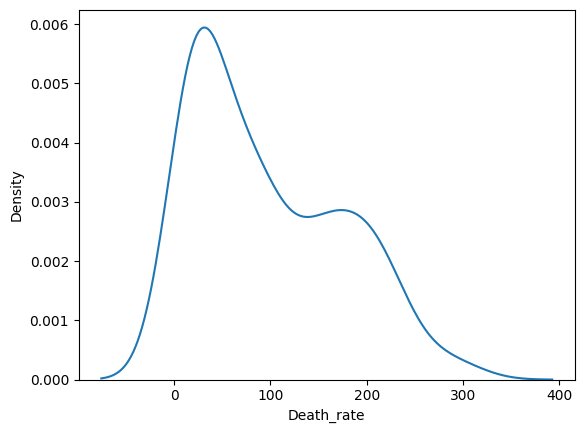

In [ ]:
sns.kdeplot(df['Death_rate'])

## Descriptive Statistics

In [ ]:
import pandas as pd

# Separate numerical and categorical columns
numerical_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['object', 'category'])

# Descriptive statistics for numerical variables
numerical_stats = numerical_df.describe()

# Descriptive statistics for categorical variables
categorical_stats = categorical_df.describe()

# Print out the statistics
print("Numerical Descriptive Statistics:")
print(numerical_stats)

print("\nCategorical Descriptive Statistics:")
print(categorical_stats)


Numerical Descriptive Statistics:
       Death_rate  Lower_bound  Upper_bound      Density  Life expectancy  \
count  168.000000   168.000000   168.000000   168.000000       168.000000   
mean    96.967500    75.992202   119.578571   206.161007        72.855417   
std     77.216914    66.310808    89.118499   656.729215         7.260350   
min      7.450000     0.000000    10.660000     2.098350        51.780000   
25%     29.467500    19.495000    40.372500    33.609582        67.842500   
50%     78.890000    55.685000   109.000000    84.097636        73.920000   
75%    162.500000   130.125000   192.550000   199.111083        77.942500   
max    309.500000   257.900000   367.900000  7965.878492        84.470000   

       per_polluting_fuels  Forest_cover  Urbanisation  Industrialisation  \
count           168.000000    168.000000    168.000000         168.000000   
mean             31.205655     32.527713     58.742339          26.389749   
std              37.525444     23.696894 

In [ ]:
print(numerical_df.skew())

Death_rate              0.644929
Lower_bound             0.769998
Upper_bound             0.533986
Density                10.240478
Life expectancy        -0.510832
per_polluting_fuels     0.763002
Forest_cover            0.526371
Urbanisation           -0.163943
Industrialisation       0.945094
Precipitation(mm)       0.653322
CO                      8.960394
OC                      7.906966
PM2.5                   9.370782
SO2                     9.805888
BC                      8.389909
NH3                     6.454652
NMVOC                   8.343808
NOx                     8.153214
PM10                    8.811454
dtype: float64


In [ ]:
print(numerical_df.kurtosis())

Death_rate              -0.707306
Lower_bound             -0.608866
Upper_bound             -0.774050
Density                118.506619
Life expectancy         -0.446144
per_polluting_fuels     -1.094155
Forest_cover            -0.448862
Urbanisation            -0.941852
Industrialisation        1.164091
Precipitation(mm)       -0.401444
CO                      92.406194
OC                      70.456313
PM2.5                   98.175668
SO2                    106.177623
BC                      77.999848
NH3                     46.519360
NMVOC                   82.196366
NOx                     76.763620
PM10                    88.465593
dtype: float64


##Parent Location

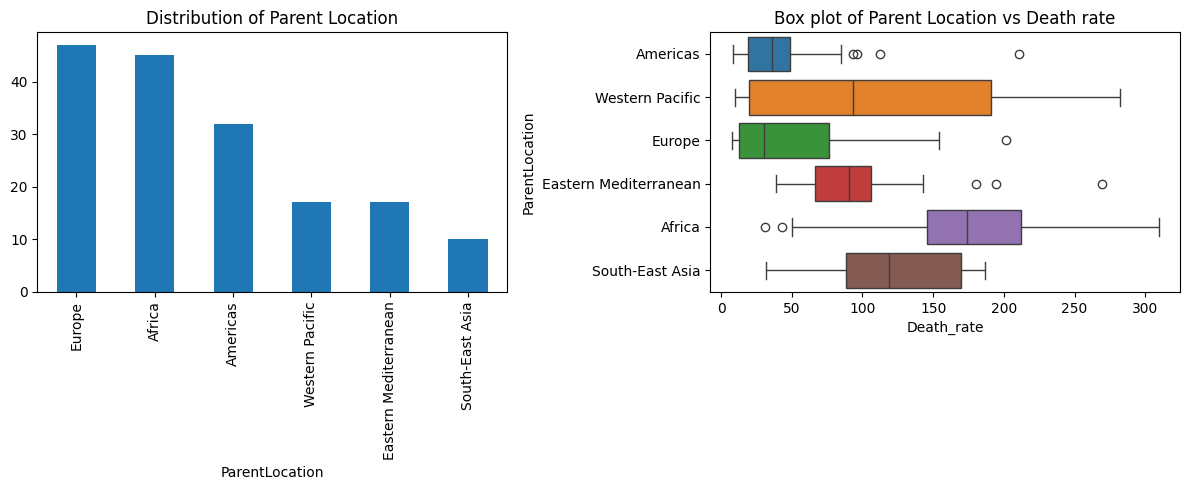

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df['ParentLocation'].value_counts().plot(kind='bar', ax = ax[0])
ax[0].set_title('Distribution of Parent Location')

sns.boxplot(df,x='Death_rate',y='ParentLocation',hue='ParentLocation')
ax[1].set_title('Box plot of Parent Location vs Death rate')

plt.tight_layout()
plt.show()

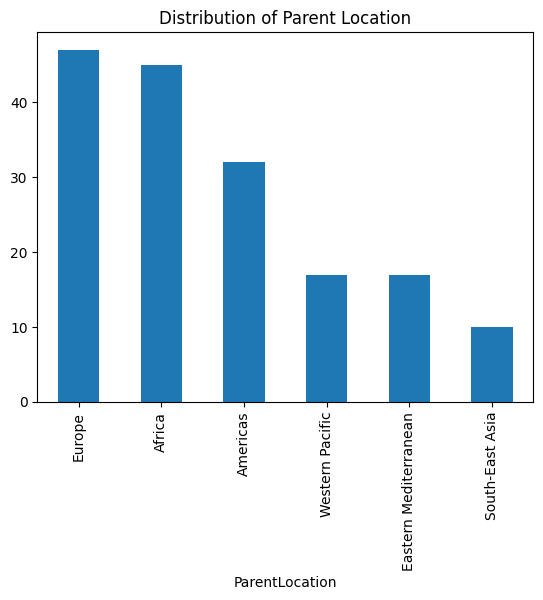

In [ ]:
df['ParentLocation'].value_counts().plot(kind='bar')
plt.title('Distribution of Parent Location')
plt.show()

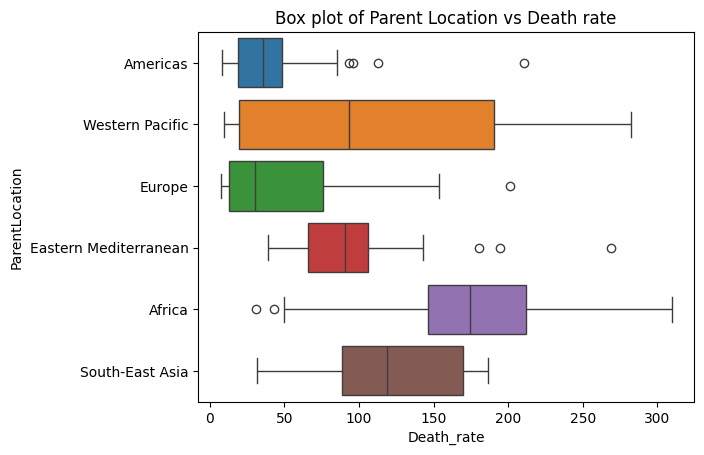

In [ ]:
sns.boxplot(df,x='Death_rate',y='ParentLocation',hue='ParentLocation')
plt.title('Box plot of Parent Location vs Death rate')
plt.show()

## Population Density

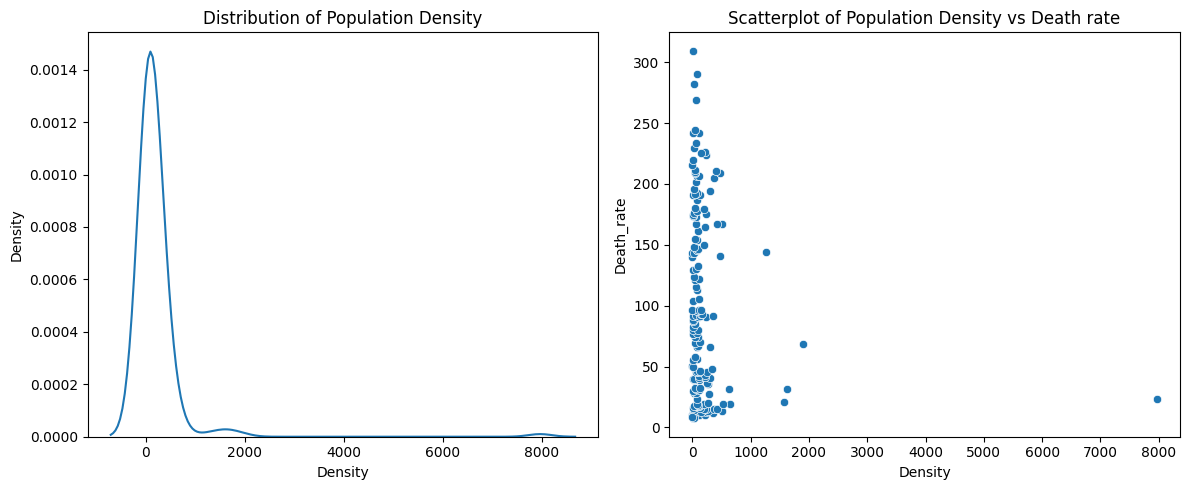

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['Density'], ax = ax[0])
ax[0].set_title('Distribution of Population Density')

sns.scatterplot(df,x = 'Density', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Population Density vs Death rate')

plt.tight_layout()
plt.show()

## Life Expectancy

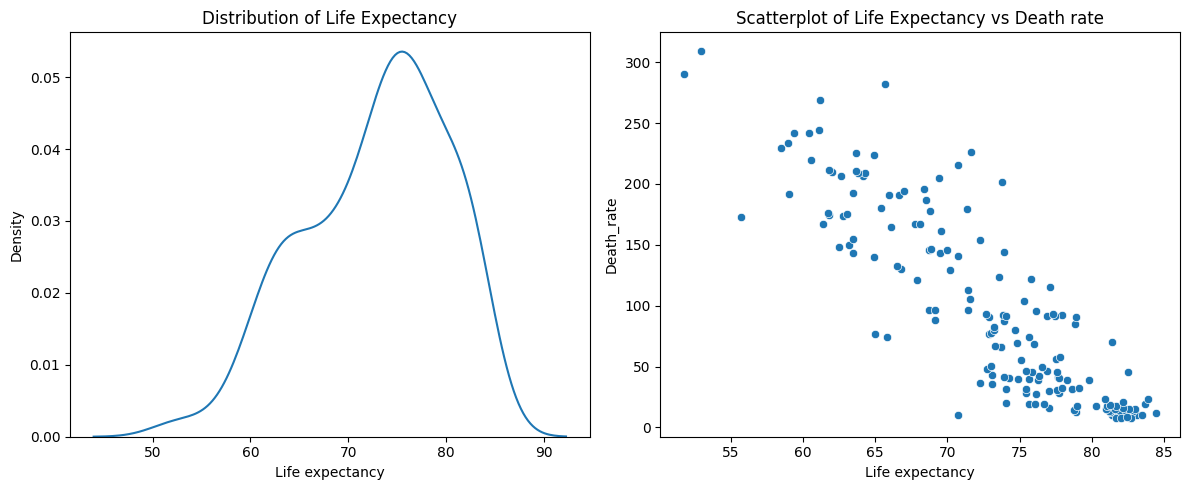

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['Life expectancy'], ax = ax[0])
ax[0].set_title('Distribution of Life Expectancy')

sns.scatterplot(df,x = 'Life expectancy', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Life Expectancy vs Death rate')

plt.tight_layout()
plt.show()

## Percentage of Polluting Fuels

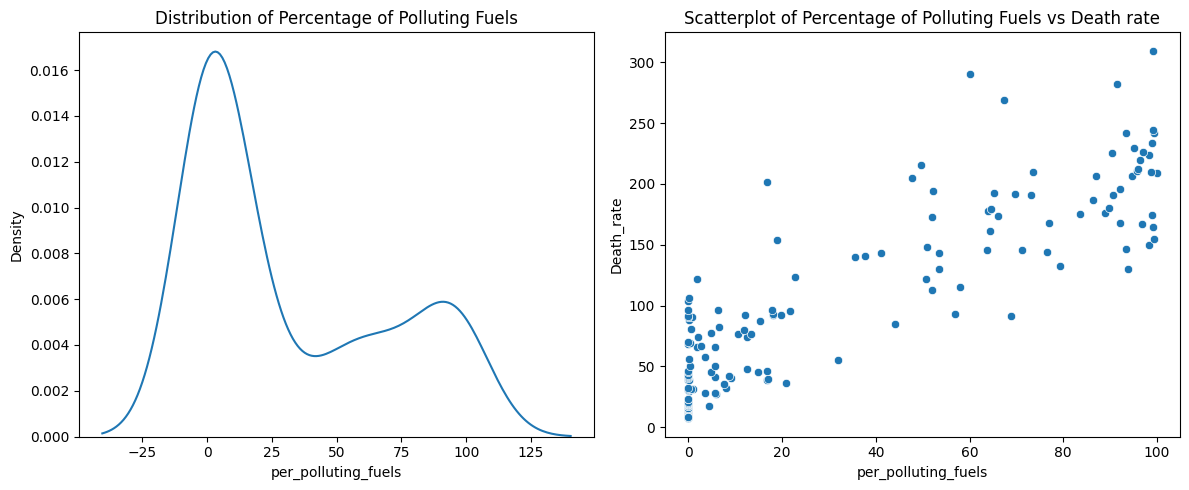

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['per_polluting_fuels'], ax = ax[0])
ax[0].set_title('Distribution of Percentage of Polluting Fuels')

sns.scatterplot(df,x = 'per_polluting_fuels', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Percentage of Polluting Fuels vs Death rate')

plt.tight_layout()
plt.show()

## % of Forest Cover

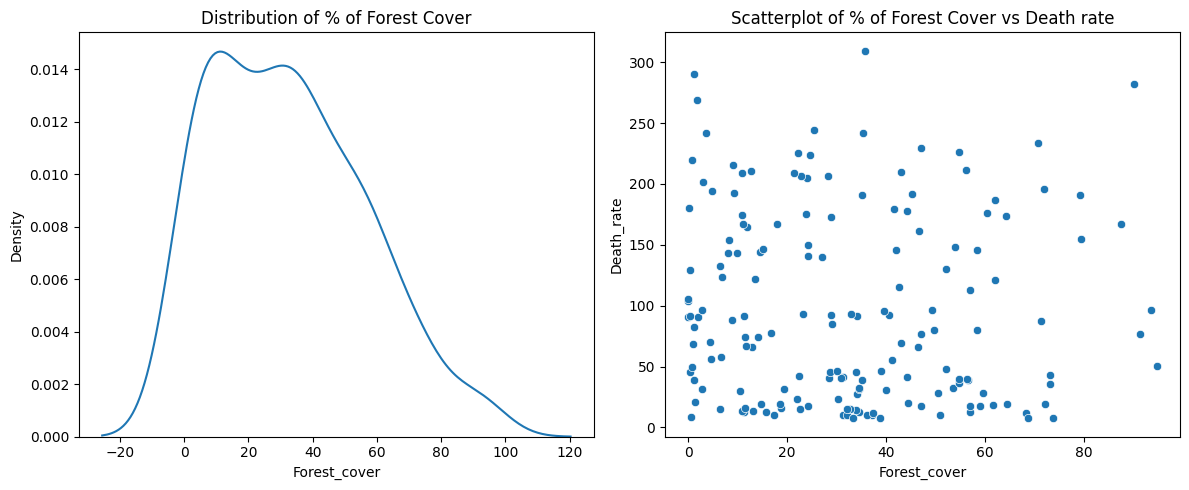

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['Forest_cover'], ax = ax[0])
ax[0].set_title('Distribution of % of Forest Cover')

sns.scatterplot(df,x = 'Forest_cover', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of % of Forest Cover vs Death rate')

plt.tight_layout()
plt.show()

## % of Urbanisation

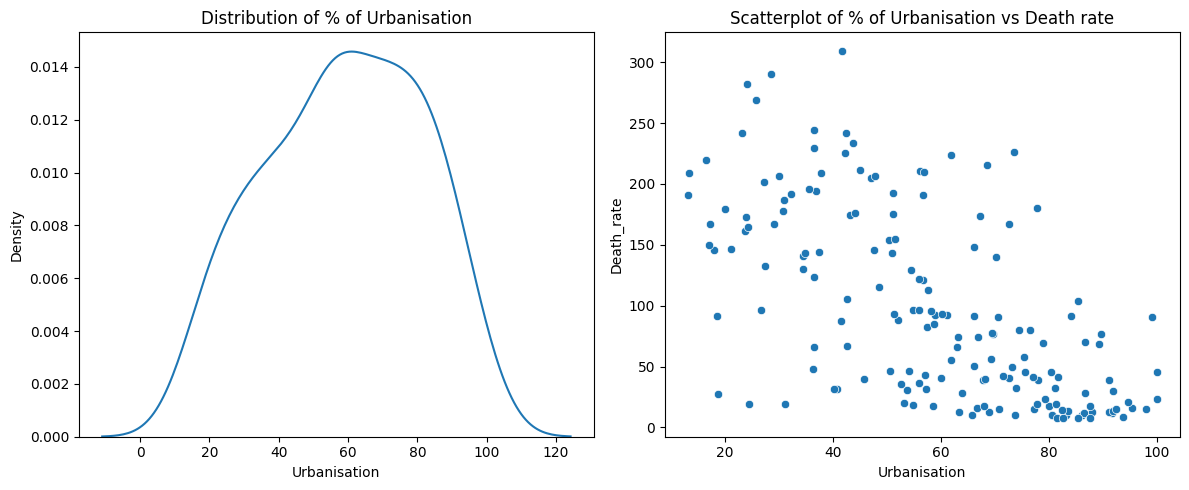

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['Urbanisation'], ax = ax[0])
ax[0].set_title('Distribution of % of Urbanisation')

sns.scatterplot(df,x = 'Urbanisation', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of % of Urbanisation vs Death rate')

plt.tight_layout()
plt.show()

## % of Industrialisation

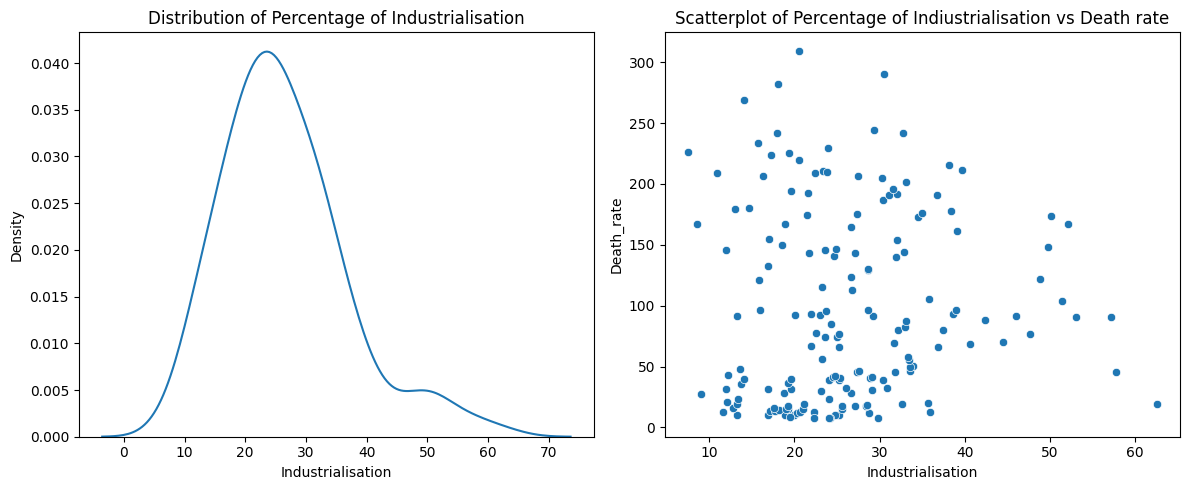

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['Industrialisation'], ax = ax[0])
ax[0].set_title('Distribution of Percentage of Industrialisation')

sns.scatterplot(df,x = 'Industrialisation', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Percentage of Indiustrialisation vs Death rate')

plt.tight_layout()
plt.show()

## Income Group

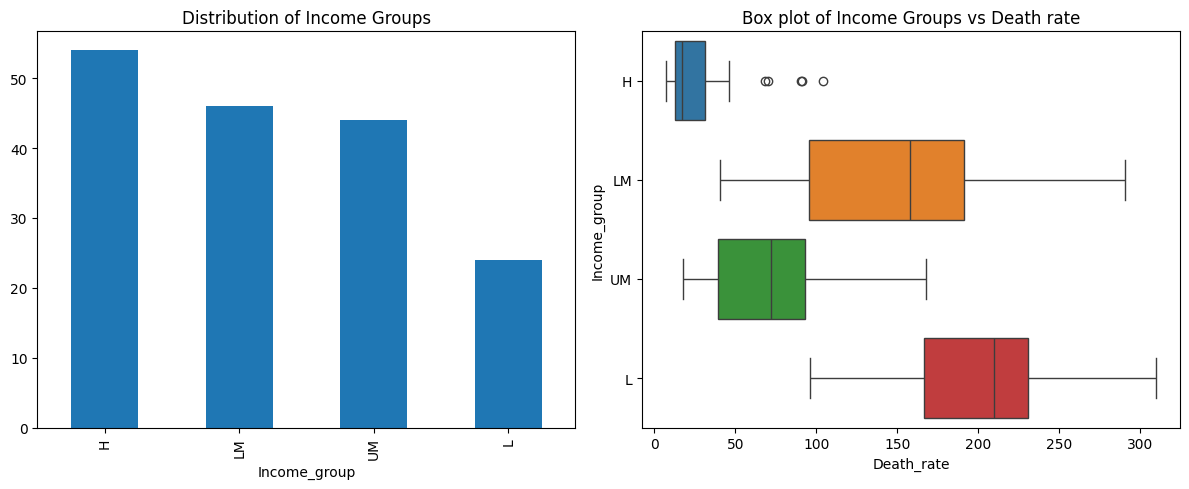

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df['Income_group'].value_counts().plot(kind='bar', ax = ax[0])
ax[0].set_title('Distribution of Income Groups')

sns.boxplot(df,x='Death_rate',y='Income_group',hue='Income_group')
ax[1].set_title('Box plot of Income Groups vs Death rate')

plt.tight_layout()
plt.show()

## Precipitation Levels (mm)

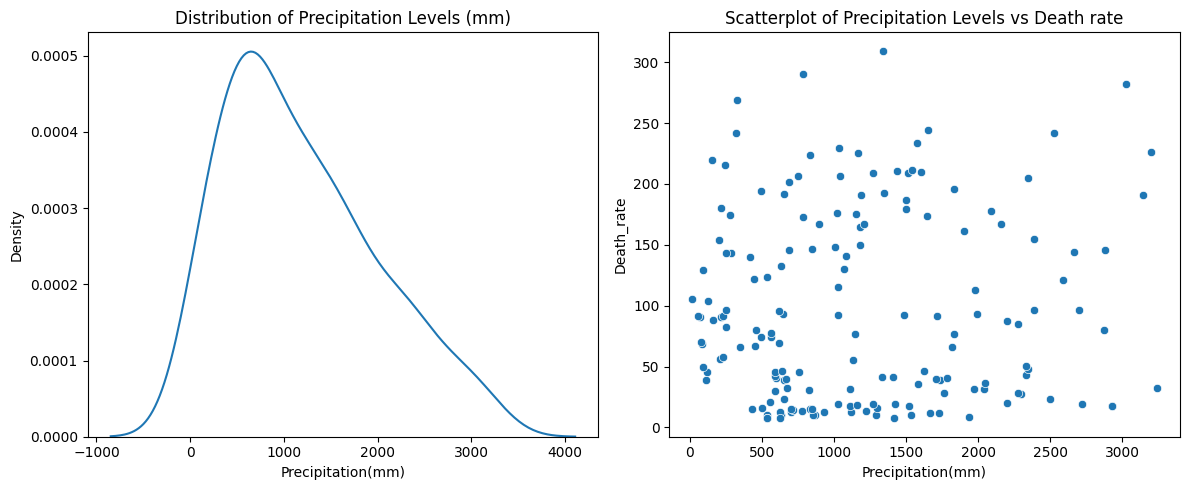

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['Precipitation(mm)'], ax = ax[0])
ax[0].set_title('Distribution of Precipitation Levels (mm)')

sns.scatterplot(df,x = 'Precipitation(mm)', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Precipitation Levels vs Death rate')

plt.tight_layout()
plt.show()

## Carbon Monoxide (CO)

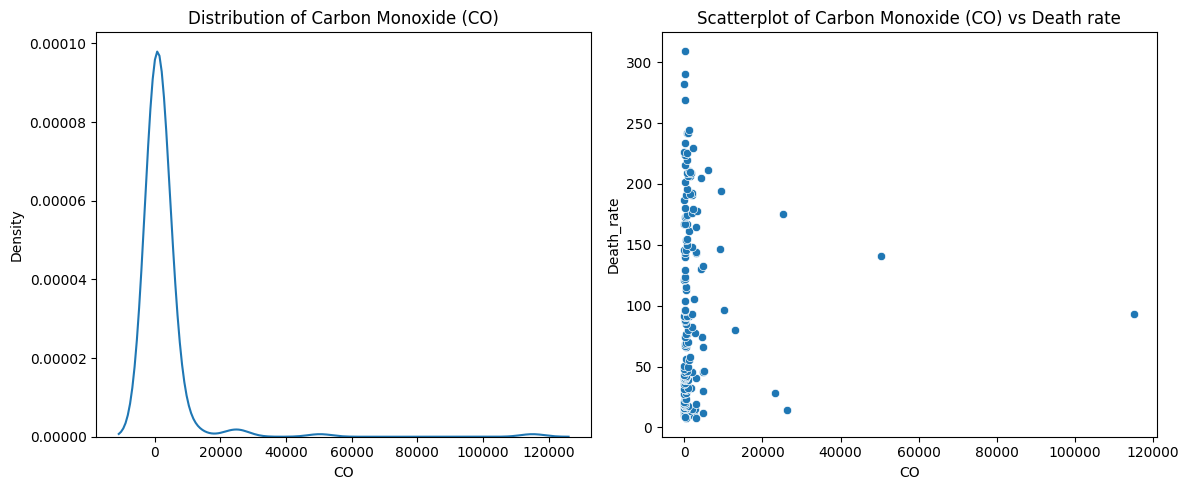

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['CO'], ax = ax[0])
ax[0].set_title('Distribution of Carbon Monoxide (CO)')

sns.scatterplot(df,x = 'CO', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Carbon Monoxide (CO) vs Death rate')

plt.tight_layout()
plt.show()

## Organic Carbon (OC)

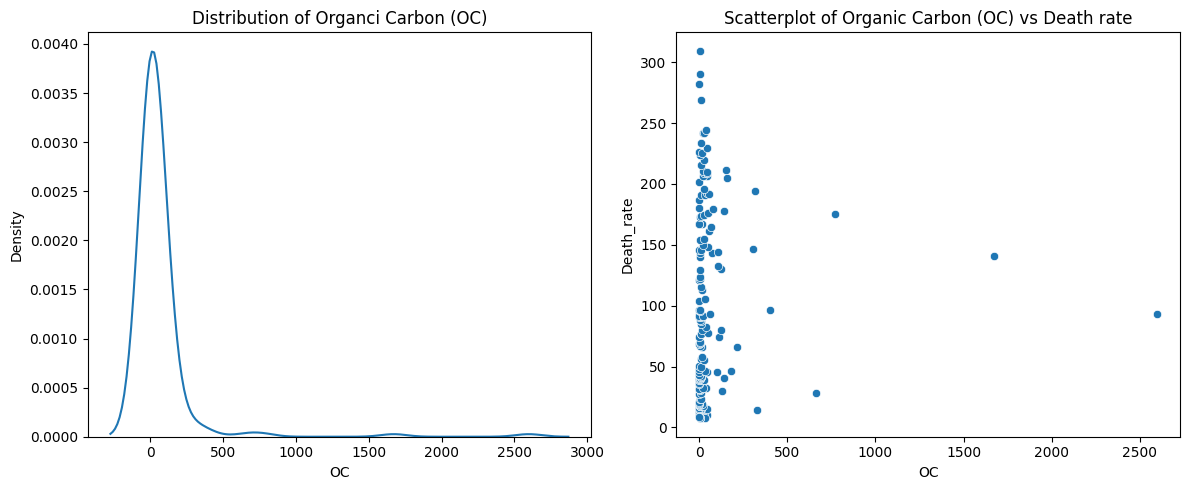

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['OC'], ax = ax[0])
ax[0].set_title('Distribution of Organci Carbon (OC)')

sns.scatterplot(df,x = 'OC', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Organic Carbon (OC) vs Death rate')

plt.tight_layout()
plt.show()

## PM 2.5

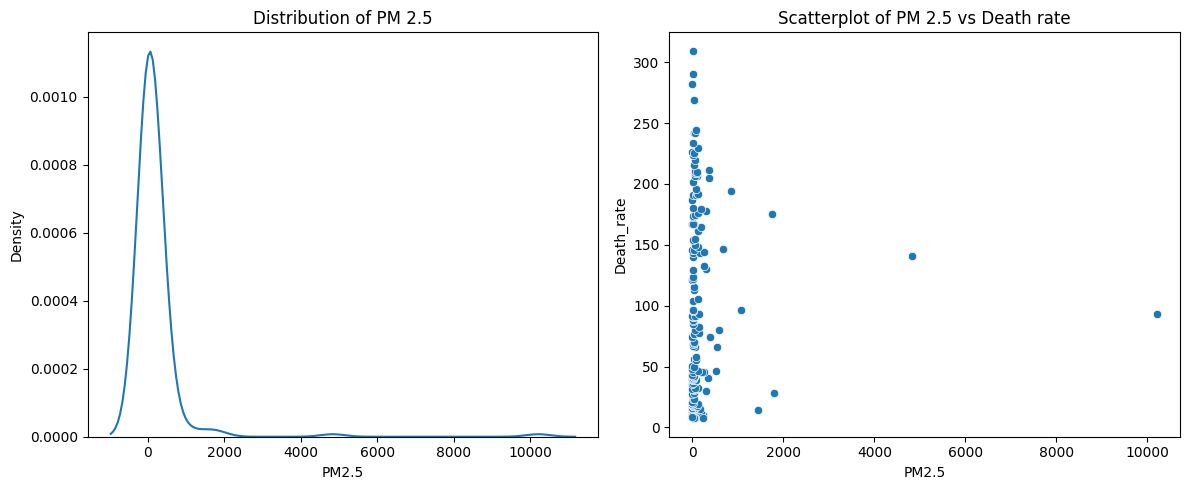

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['PM2.5'], ax = ax[0])
ax[0].set_title('Distribution of PM 2.5')

sns.scatterplot(df,x = 'PM2.5', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of PM 2.5 vs Death rate')

plt.tight_layout()
plt.show()

## Sulfur Dioxide (SO2)

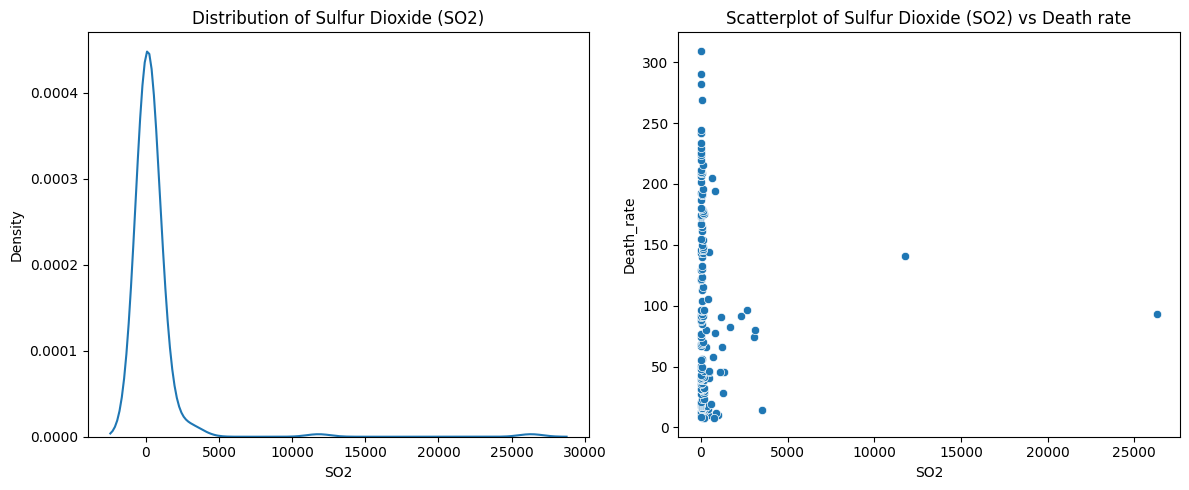

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['SO2'], ax = ax[0])
ax[0].set_title('Distribution of Sulfur Dioxide (SO2)')

sns.scatterplot(df,x = 'SO2', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Sulfur Dioxide (SO2) vs Death rate')

plt.tight_layout()
plt.show()

## Black Carbon (BC)

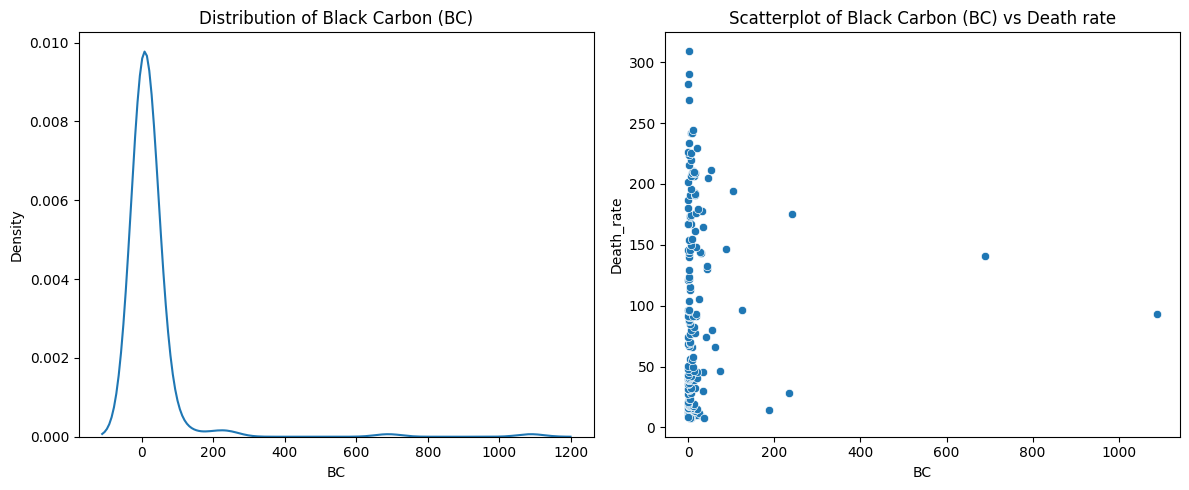

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['BC'], ax = ax[0])
ax[0].set_title('Distribution of Black Carbon (BC)')

sns.scatterplot(df,x = 'BC', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Black Carbon (BC) vs Death rate')

plt.tight_layout()
plt.show()

## Ammonia (NH3)

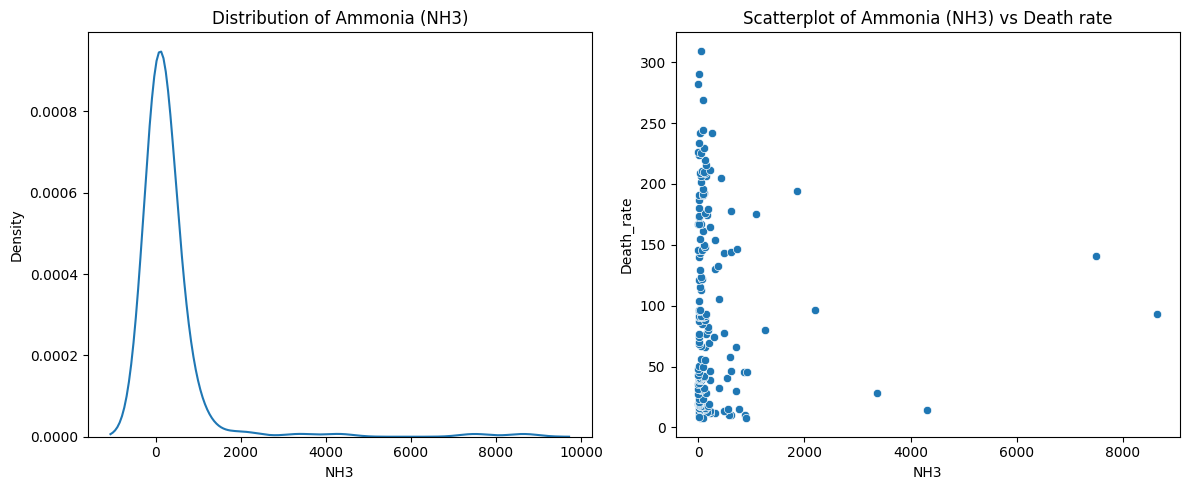

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['NH3'], ax = ax[0])
ax[0].set_title('Distribution of Ammonia (NH3)')

sns.scatterplot(df,x = 'NH3', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Ammonia (NH3) vs Death rate')

plt.tight_layout()
plt.show()

## Non-Methane Volatile Organic Compounds (NMVOC)

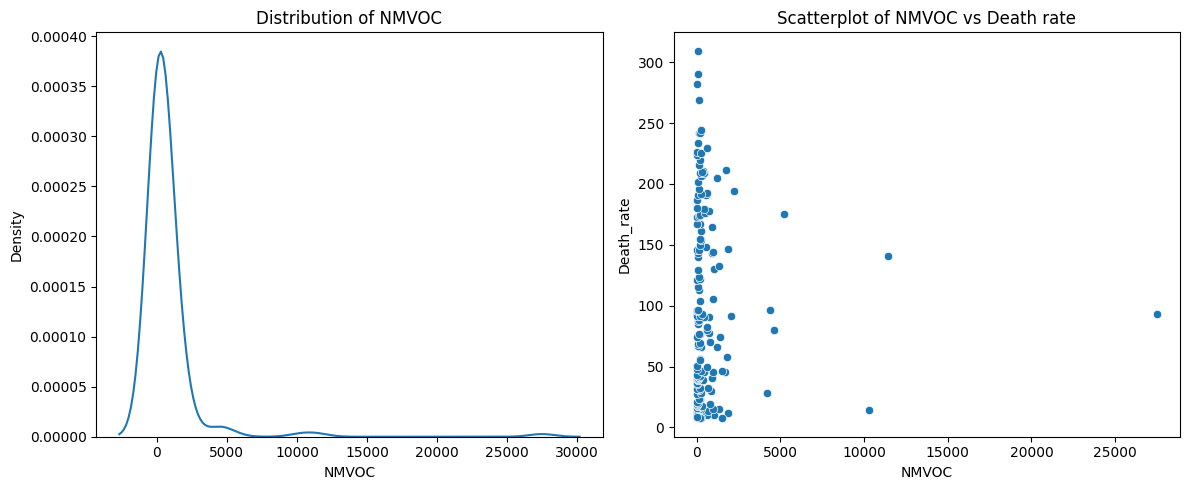

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['NMVOC'], ax = ax[0])
ax[0].set_title('Distribution of NMVOC')

sns.scatterplot(df,x = 'NMVOC', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of NMVOC vs Death rate')

plt.tight_layout()
plt.show()

## Nitrogen Oxides (NOx)

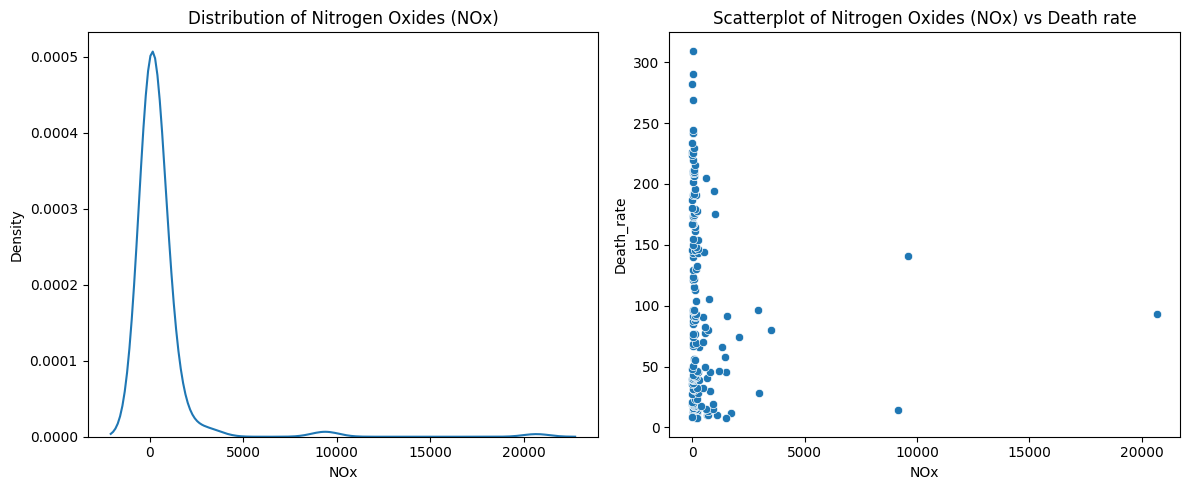

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['NOx'], ax = ax[0])
ax[0].set_title('Distribution of Nitrogen Oxides (NOx)')

sns.scatterplot(df,x = 'NOx', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of Nitrogen Oxides (NOx) vs Death rate')

plt.tight_layout()
plt.show()

## PM 10

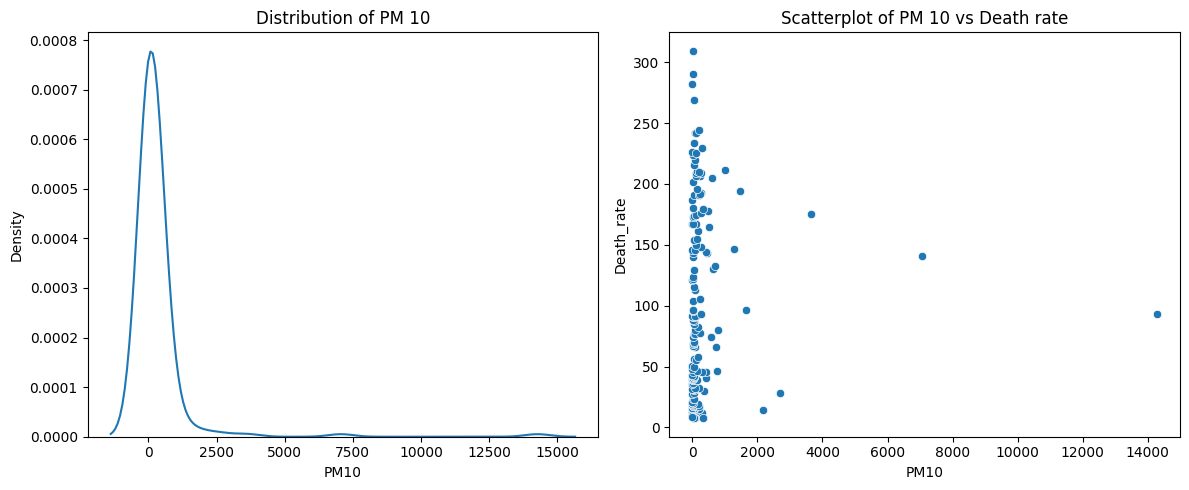

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['PM10'], ax = ax[0])
ax[0].set_title('Distribution of PM 10')

sns.scatterplot(df,x = 'PM10', y = 'Death_rate', ax = ax[1])
ax[1].set_title('Scatterplot of PM 10 vs Death rate')

plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns='Location',inplace=True)

# Outlier

In [ ]:
dfn=pd.get_dummies(df, columns=['Income_group','ParentLocation'],drop_first=True).astype(float)

In [ ]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 179
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Death_rate                            168 non-null    float64
 1   Lower_bound                           168 non-null    float64
 2   Upper_bound                           168 non-null    float64
 3   Density                               168 non-null    float64
 4   Life expectancy                       168 non-null    float64
 5   per_polluting_fuels                   168 non-null    float64
 6   Forest_cover                          168 non-null    float64
 7   Urbanisation                          168 non-null    float64
 8   Industrialisation                     168 non-null    float64
 9   Precipitation(mm)                     168 non-null    float64
 10  CO                                    168 non-null    float64
 11  OC                      

In [ ]:
dfn

Death_rate  Lower_bound  Upper_bound     Density  Life expectancy  \
0         10.42         0.00        20.80   39.428072            70.74   
1          9.81         6.60        13.10    3.293651            82.64   
2         10.03         7.28        13.02  123.059446            82.53   
3         10.12         7.09        13.32   94.350809            83.14   
4         10.00         6.74        13.78  112.288583            81.37   
..          ...          ...          ...         ...              ...   
175       93.31        76.17       109.70  159.609957            72.71   
176       95.58        57.30       146.30   74.395797            76.15   
177       96.13        63.40       130.70    4.102946            68.73   
178       96.07        65.75       148.30  110.839917            69.17   
179       96.67        68.36       126.40  145.132689            71.40   

     per_polluting_fuels  Forest_cover  Urbanisation  Industrialisation  \
0                    0.0     50.935065        83.132          13.245801   
1                    0.0     17.421315        86.124          25.272079   
2                    0.0     31.356735        80.709          16.907004   
3                    0.0     37.167722        80.565          19.977906   
4                    0.0     36.154995        65.764          18.886083   
..                   ...           ...           ...                ...   
175                 56.8     33.029115        51.439          21.942257   
176                 21.8     39.710151        58.208          23.703483   
177                  0.0     93.596850        26.689          28.689319   
178                  6.4      2.843108        54.821          15.916047   
179                 17.9     49.394296        55.985          38.951768   

     Precipitation(mm)  ...          NOx         PM10  Income_group_L  \
0               1292.0  ...    15.447838     1.506637             0.0   
1                534.0  ...  1105.179363   185.602754             0.0   
2                867.0  ...   644.837670   297.478129             0.0   
3                636.0  ...   705.883686   151.825633             0.0   
4                854.0  ...   126.354822    57.052490             0.0   
..                 ...  ...          ...          ...             ...   
175             1996.0  ...   141.604818   253.927452             0.0   
176              619.0  ...    18.826208     7.911364             0.0   
177             2387.0  ...    22.157226     7.097353             0.0   
178              252.0  ...    81.257645    15.968870             1.0   
179             2702.0  ...  2920.269651  1657.049010             0.0   

     Income_group_LM  Income_group_UM  ParentLocation_Americas  \
0                0.0              0.0                      1.0   
1                0.0              0.0                      0.0   
2                0.0              0.0                      0.0   
3                0.0              0.0                      0.0   
4                0.0              0.0                      0.0   
..               ...              ...                      ...   
175              0.0              1.0                      1.0   
176              0.0              1.0                      0.0   
177              0.0              1.0                      1.0   
178              0.0              0.0                      0.0   
179              0.0              1.0                      0.0   

     ParentLocation_Eastern Mediterranean  ParentLocation_Europe  \
0                                     0.0                    0.0   
1                                     0.0                    0.0   
2                                     0.0                    1.0   
3                                     0.0                    1.0   
4                                     0.0                    1.0   
..                                    ...                    ...   
175                                   0.0                    0.0   
1

In [ ]:
X=dfn.drop(columns=['Death_rate','Lower_bound','Upper_bound'])
Y=pd.DataFrame(dfn['Death_rate'])

In [ ]:
X_c = sm.add_constant(X)
model = sm.OLS(Y, X_c).fit()
influence = model.get_influence()

In [ ]:
n, p = X_c.shape

## Results of MLR without removing outliers

In [ ]:
model.summary() #This is MLR without removing the outliers and influential points

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death_rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.89
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.49e-67
Time:                        15:37:21   Log-Likelihood:                -753.32
No. Observations:                 168   AIC:                             1557.
Df Residuals:                     143   BIC:                             1635.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  437.8818     44.056      9.939      0.000     350.797     524.966
Density                                 -0.0005      0.003     -0.175      0.861      -0.007       0.006
Life expectancy                         -5.8167      0.596     -9.758      0.000      -6.995      -4.638
per_polluting_fuels                      0.9839      0.114      8.664      0.000       0.759       1.208
Forest_cover                            -0.3210      0.114     -2.806      0.006      -0.547      -0.095
Urbanisation                             0.1275      0.128      0.999      0.320      -0.125       0.380
Industrialisation                        0.3906      0.216      1.811      0.072      -0.036       0.817
Precipitation(mm)                        0.0064      0.004      1.608      0.110      -0.001       0.014
CO                                      -0.0016      0.004     -0.434      0.665      -0.009       0.006
OC                                       0.0210      0.128      0.164      0.870      -0.231       0.273
PM2.5                                    0.1012      0.061      1.649      0.101      -0.020       0.223
SO2                                     -0.0041      0.007     -0.598      0.550      -0.018       0.010
BC                                       0.4074      0.379      1.074      0.284      -0.342       1.157
NH3                                     -0.0080      0.013     -0.616      0.539      -0.033       0.018
NMVOC                                    0.0202      0.016      1.298      0.196      -0.011       0.051
NOx                                     -0.0116      0.017     -0.695      0.488      -0.045       0.021
PM10                                    -0.1023      0.059     -1.728      0.086      -0.219       0.015
Income_group_L                          33.2038     10.827      3.067      0.003      11.803      54.605
Income_group_LM                         29.4781      7.736      3.811      0.000      14.187      44.769
Income_group_UM                          9.3113      5.964      1.561      0.121      -2.478      21.101
ParentLocation_Americas                  7.4674      8.419      0.887      0.377      -9.173      24.108
ParentLocation_Eastern Mediterranean    41.0688      9.102      4.512      0.000      23.076      59.062
ParentLocation_Europe                   41.2956      8.696      4.749      0.000      24.107      58.484
ParentLocation_South-East Asia          18.7110     11.482      1.630      0.105      -3.986      41.408
ParentLocation_Western Pacific          39.3373      9.321      4.220      0.000      20.913      57.761
==============================================================================
Omnibus:                       15.882   Durbin-Watson:          

In [ ]:
X_trainout, X_testout, y_trainout, y_testout = train_test_split(
        X_c, Y, test_size=0.2, random_state= 0)
mlr_outliers = sm.OLS(y_trainout, X_trainout).fit()
Y_pred_out = mlr_outliers.predict(X_testout)
r2_score(y_testout,Y_pred_out)

0.36252514071941044

In [ ]:
mlr_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death_rate   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     64.71
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.55e-53
Time:                        15:37:21   Log-Likelihood:                -590.54
No. Observations:                 134   AIC:                             1231.
Df Residuals:                     109   BIC:                             1304.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  461.8715     50.547      9.137      0.000     361.689     562.054
Density                                  0.0006      0.003      0.209      0.835      -0.005       0.007
Life expectancy                         -5.9990      0.670     -8.949      0.000      -7.328      -4.670
per_polluting_fuels                      0.8630      0.131      6.578      0.000       0.603       1.123
Forest_cover                            -0.1929      0.123     -1.567      0.120      -0.437       0.051
Urbanisation                             0.1314      0.137      0.956      0.341      -0.141       0.404
Industrialisation                        0.3202      0.231      1.387      0.168      -0.137       0.778
Precipitation(mm)                       -0.0007      0.005     -0.160      0.873      -0.010       0.008
CO                                      -0.0033      0.005     -0.649      0.518      -0.013       0.007
OC                                      -0.2295      0.153     -1.501      0.136      -0.533       0.074
PM2.5                                    0.1809      0.084      2.144      0.034       0.014       0.348
SO2                                     -0.0154      0.010     -1.473      0.144      -0.036       0.005
BC                                      -1.2441      0.916     -1.358      0.177      -3.060       0.572
NH3                                      0.0006      0.016      0.035      0.972      -0.032       0.033
NMVOC                                    0.0107      0.019      0.557      0.579      -0.027       0.049
NOx                                     -0.0005      0.018     -0.027      0.979      -0.037       0.036
PM10                                     0.0424      0.081      0.522      0.603      -0.119       0.204
Income_group_L                          33.8677     12.254      2.764      0.007       9.581      58.155
Income_group_LM                         28.6231      8.510      3.364      0.001      11.757      45.489
Income_group_UM                         14.2580      6.647      2.145      0.034       1.084      27.432
ParentLocation_Americas                  4.7418      9.048      0.524      0.601     -13.191      22.675
ParentLocation_Eastern Mediterranean    35.8654      9.512      3.771      0.000      17.013      54.718
ParentLocation_Europe                   33.8842      9.224      3.673      0.000      15.602      52.166
ParentLocation_South-East Asia          30.6175     13.723      2.231      0.028       3.419      57.816
ParentLocation_Western Pacific          43.1771     10.103      4.274      0.000      23.154      63.200
==============================================================================
Omnibus:                        6.060   Durbin-Watson:          

## Leverage

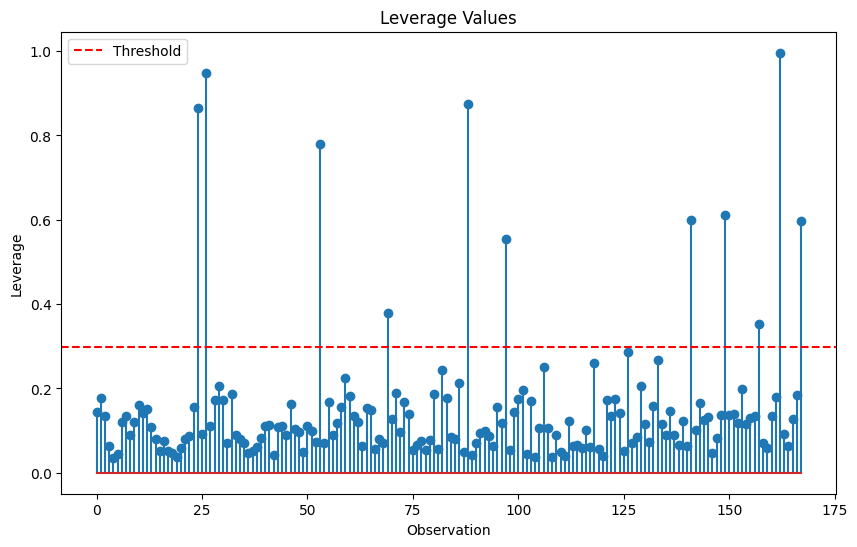

In [ ]:
leverage = influence.hat_matrix_diag
leverage_threshold = 2 * (p) / n

plt.figure(figsize=(10, 6))
plt.stem(leverage)
plt.axhline(leverage_threshold, color='r', linestyle='--', label='Threshold')
plt.title("Leverage Values")
plt.xlabel("Observation")
plt.ylabel("Leverage")
plt.legend()
plt.show()

## Cook's Distance

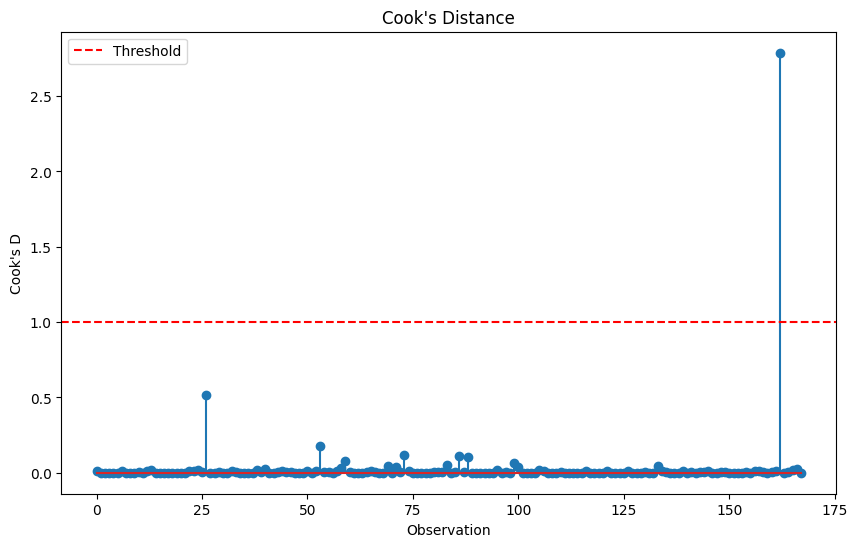

In [ ]:
cooks_d = influence.cooks_distance[0]
cooks_threshold = 1

plt.figure(figsize=(10, 6))
plt.stem(cooks_d)
plt.axhline(cooks_threshold, color='r', linestyle='--', label='Threshold')
plt.title("Cook's Distance")
plt.xlabel("Observation")
plt.ylabel("Cook's D")
plt.legend()
plt.show()

## DEBETAs

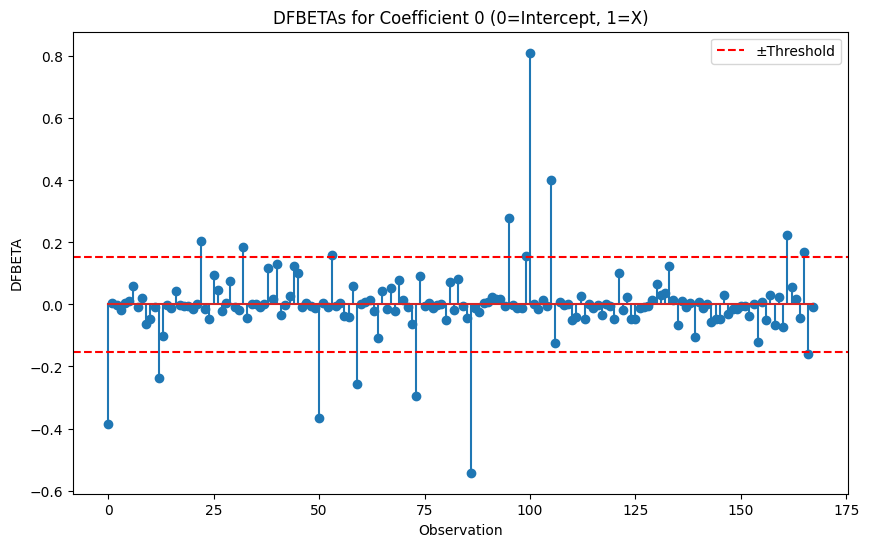

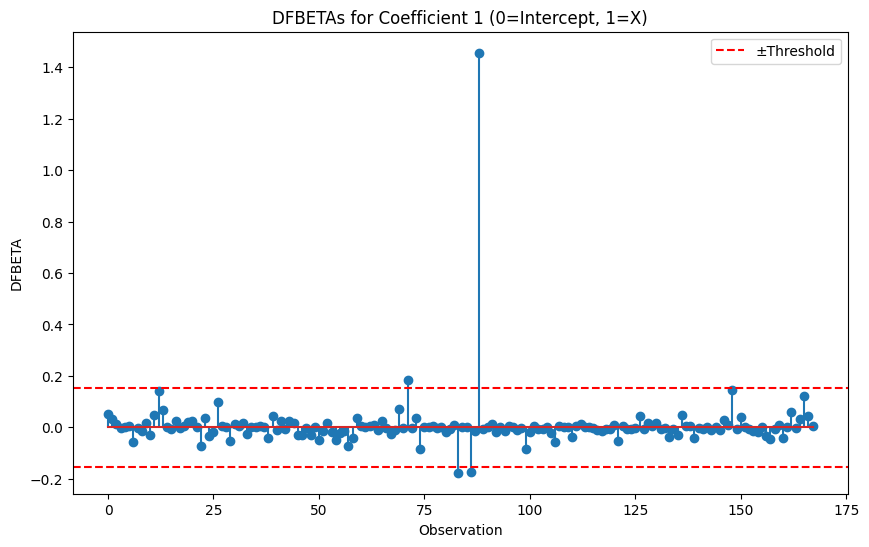

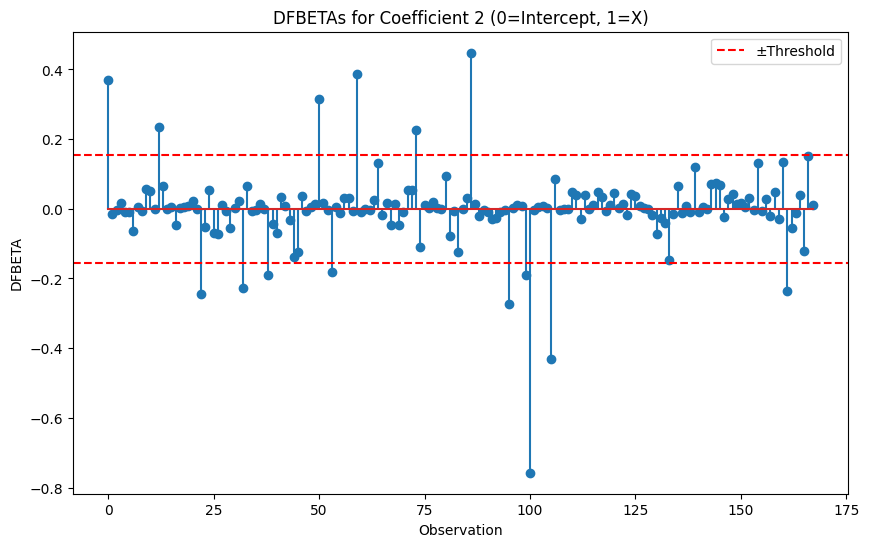

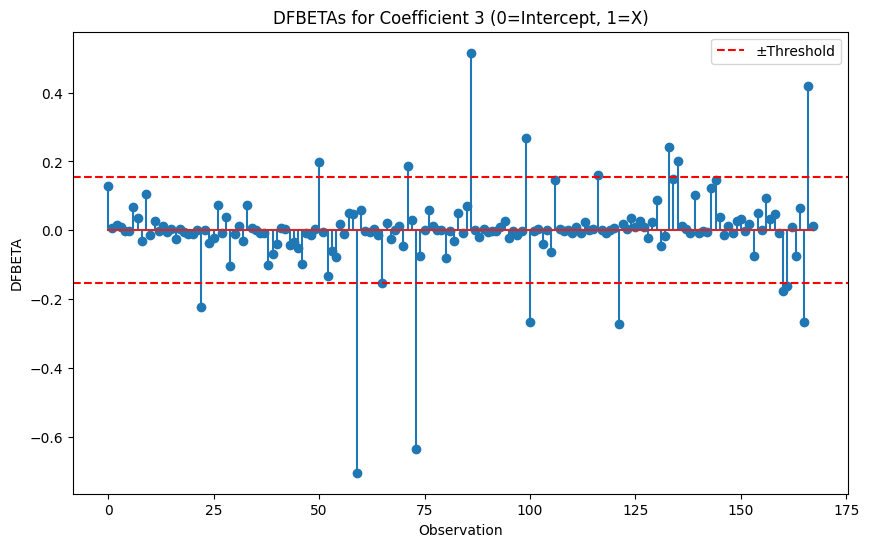

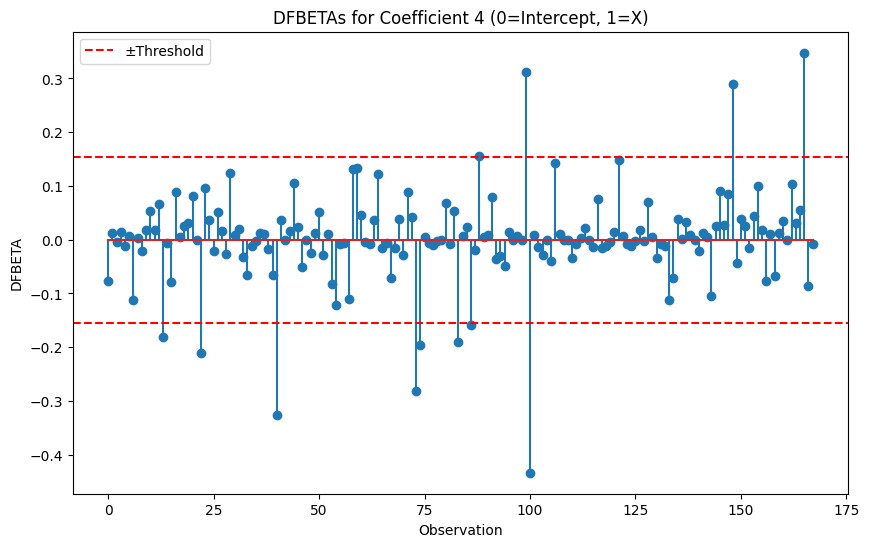

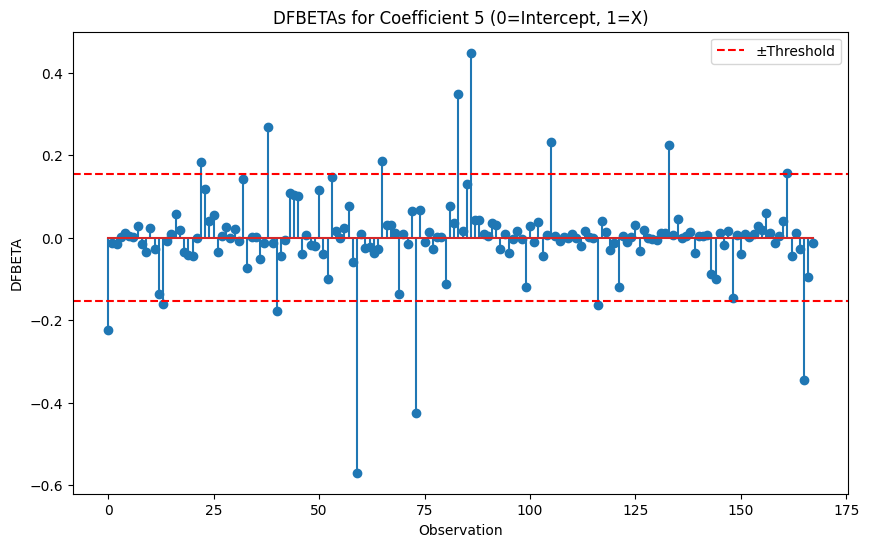

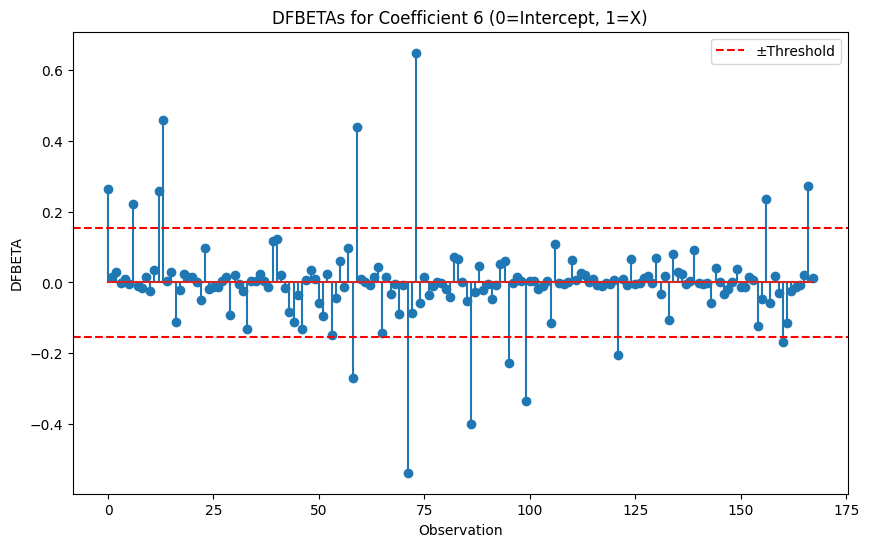

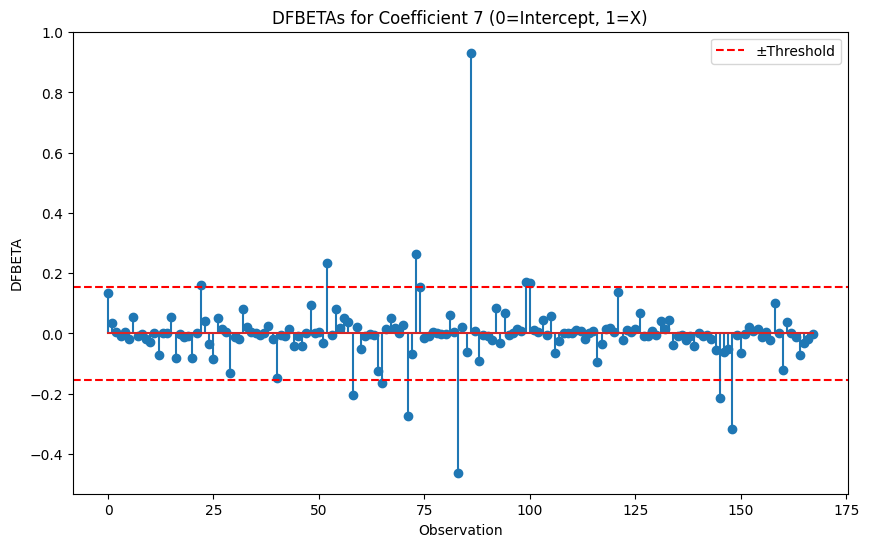

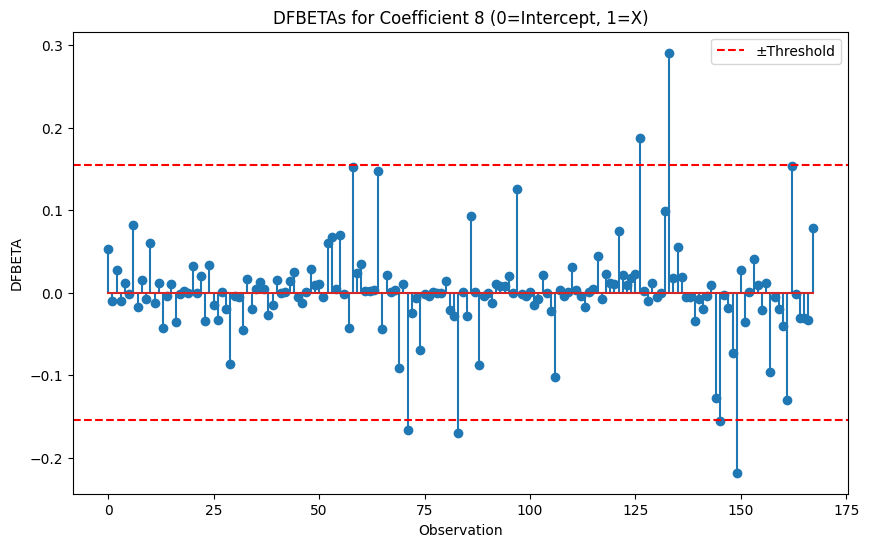

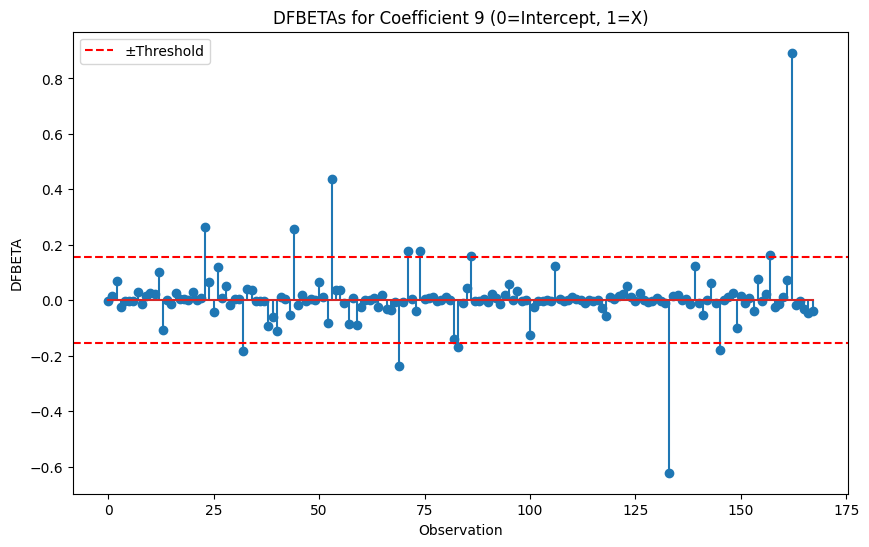

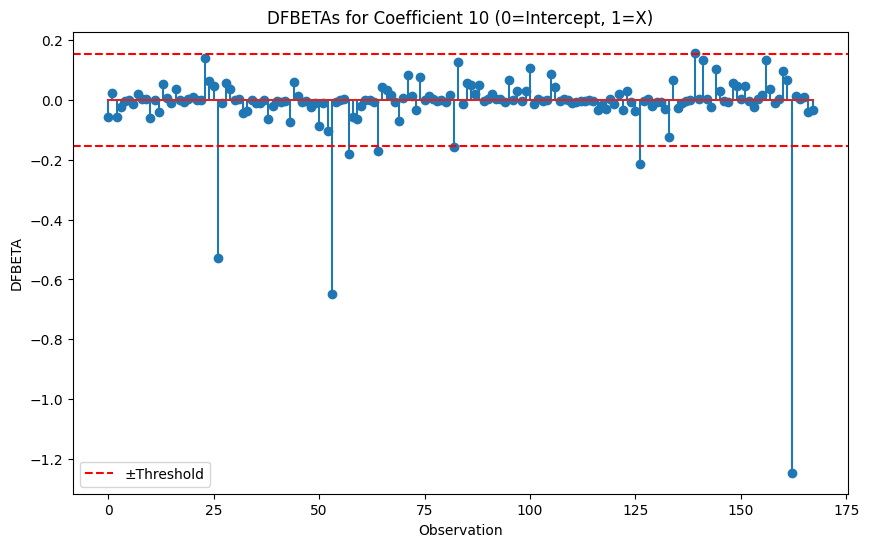

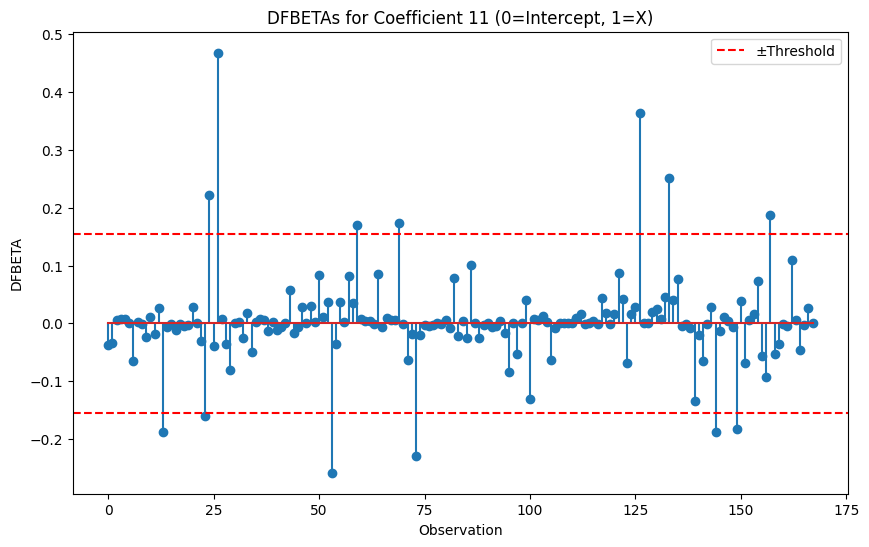

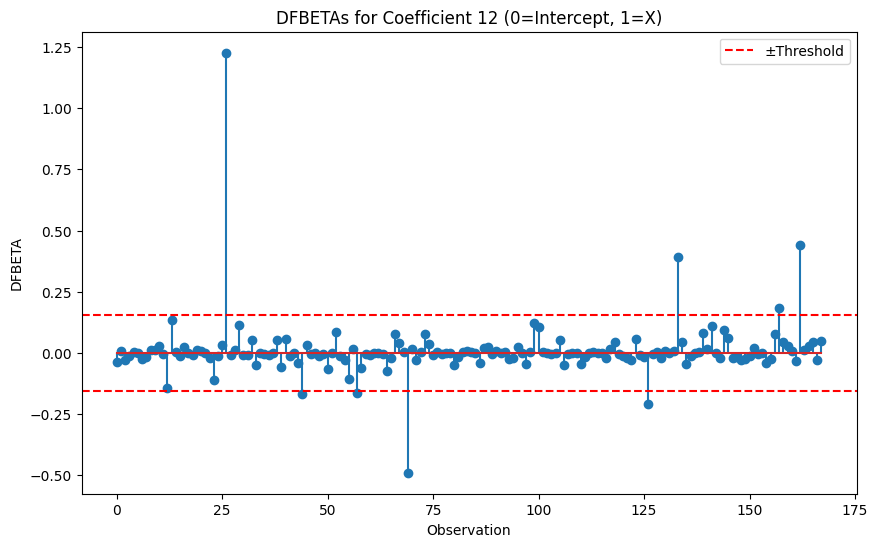

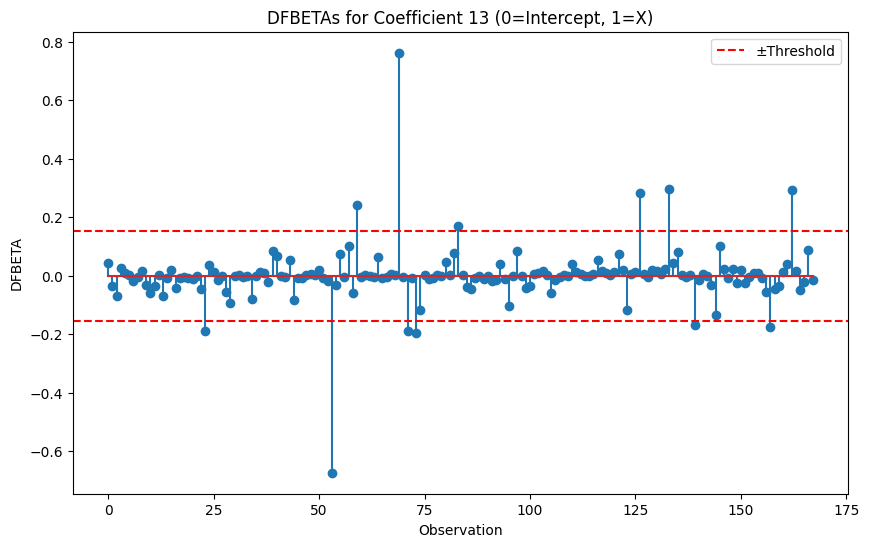

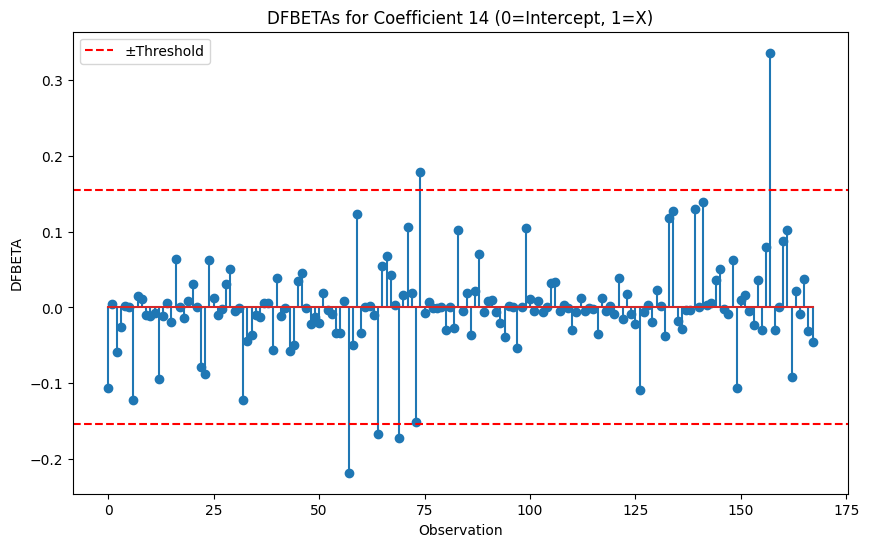

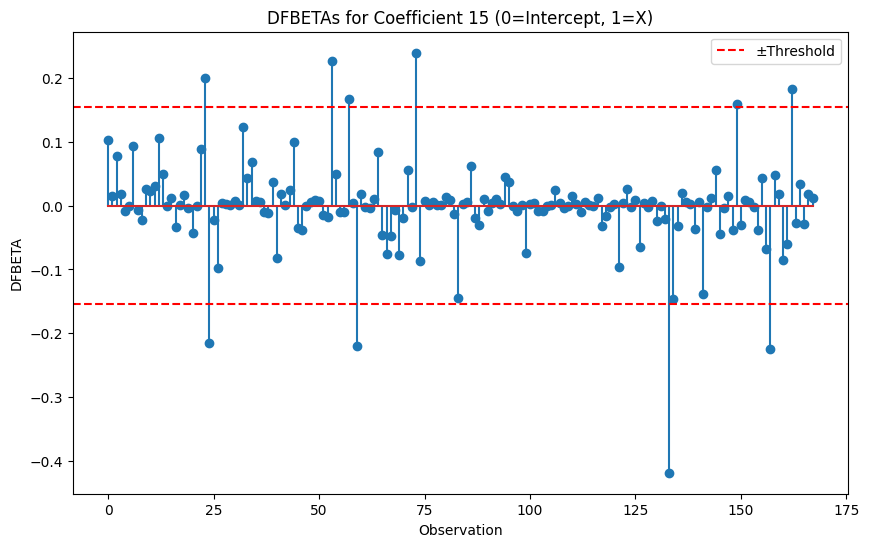

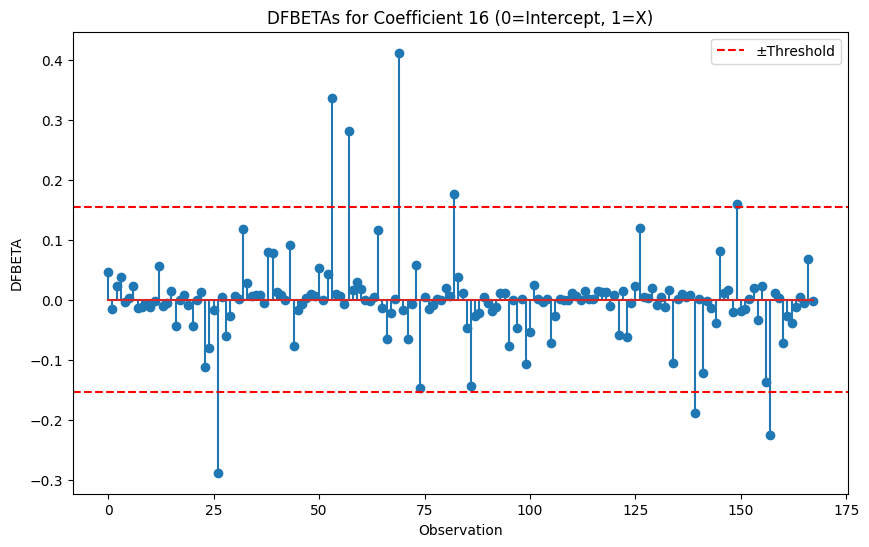

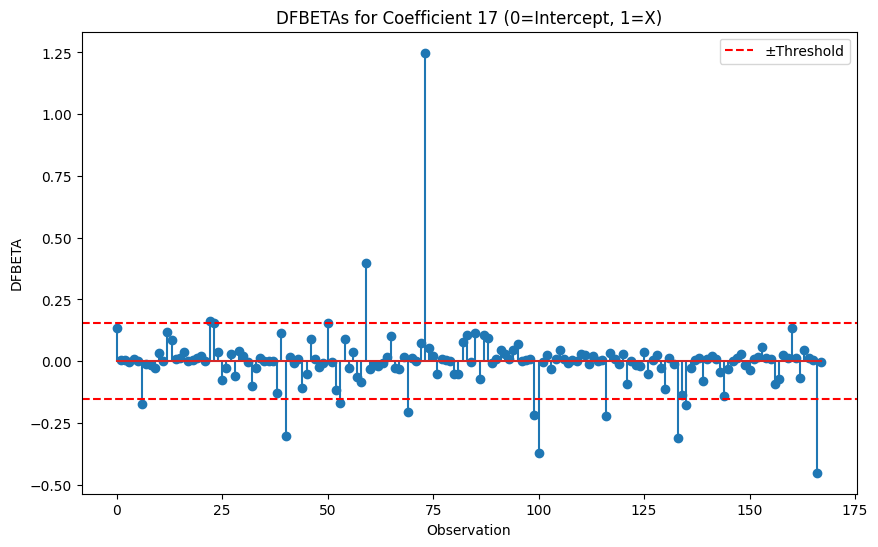

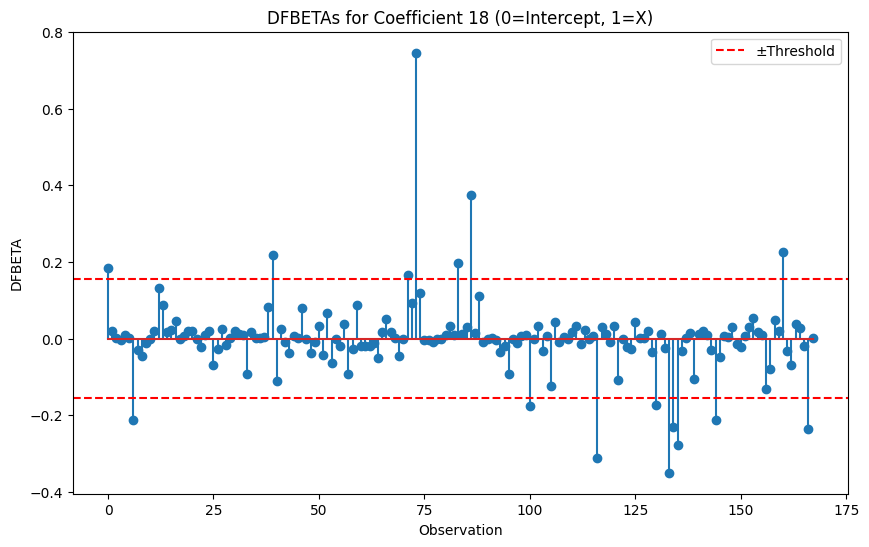

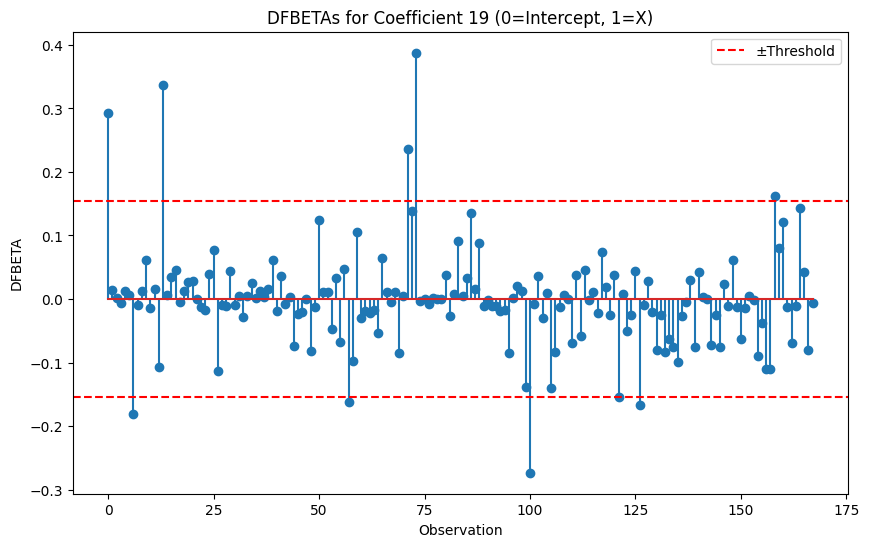

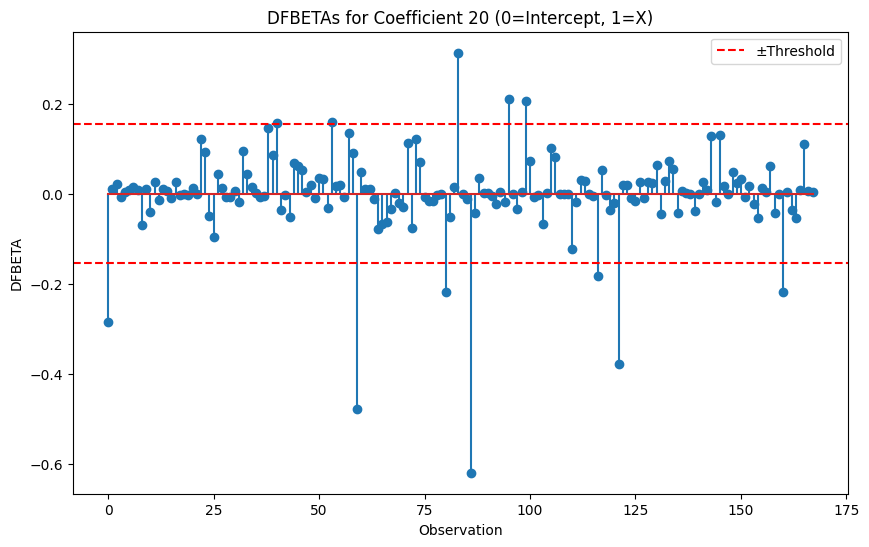

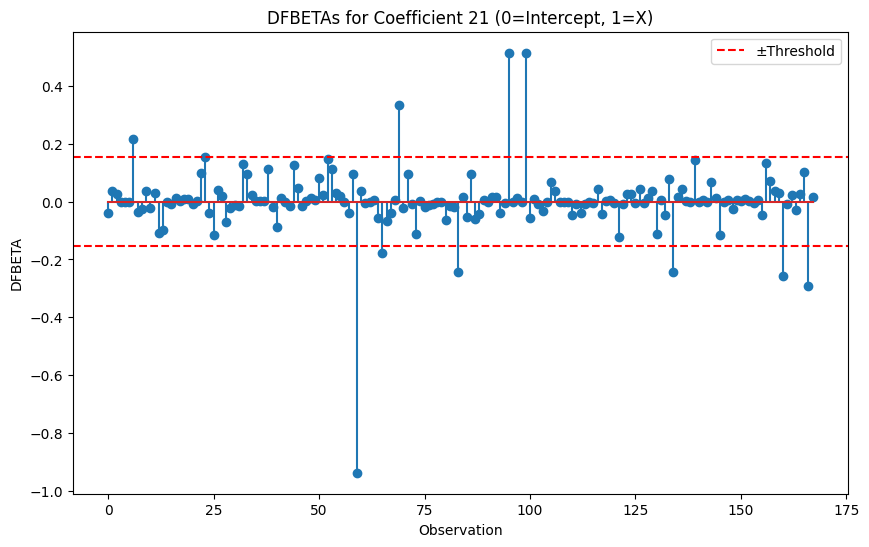

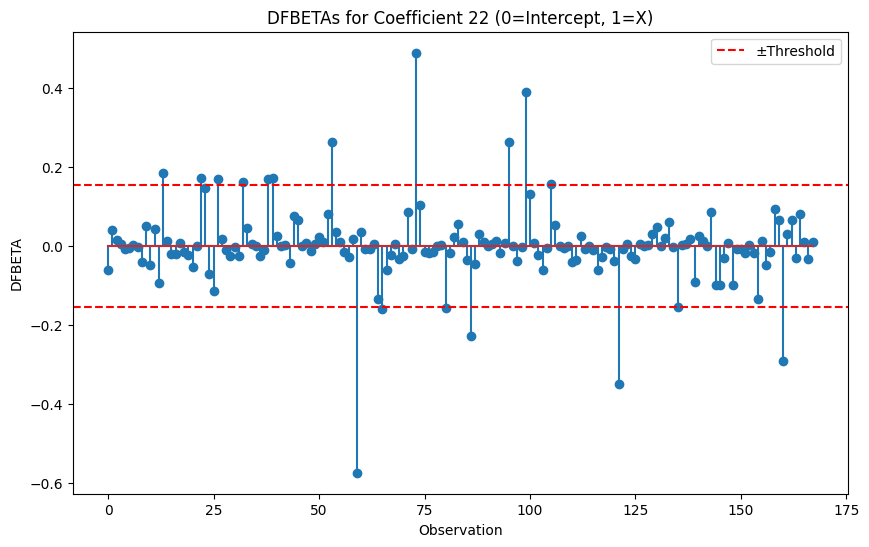

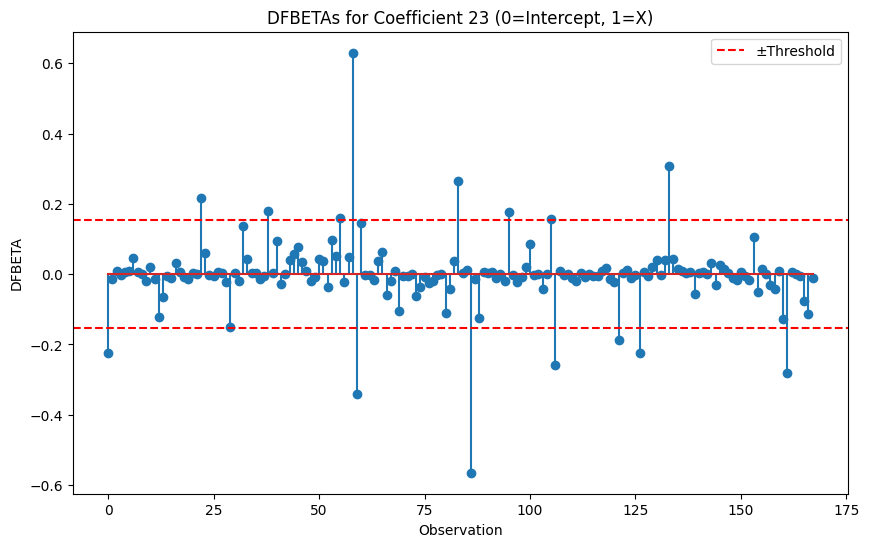

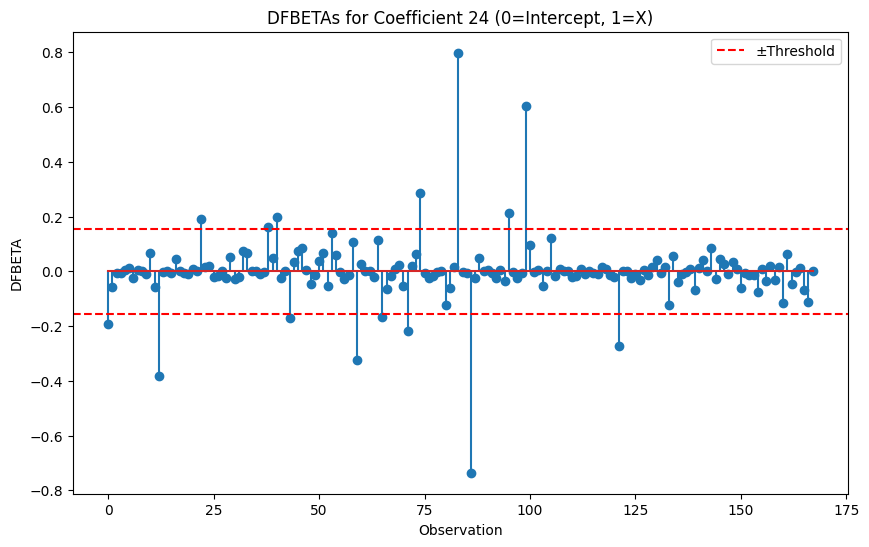

In [ ]:
dfbetas = influence.dfbetas
dfbeta_threshold = 2 / np.sqrt(n)

for j in range(dfbetas.shape[1]):
    plt.figure(figsize=(10, 6))
    plt.stem(dfbetas[:, j])
    plt.axhline(dfbeta_threshold, color='r', linestyle='--', label='±Threshold')
    plt.axhline(-dfbeta_threshold, color='r', linestyle='--')
    plt.title(f"DFBETAs for Coefficient {j} (0=Intercept, 1=X)")
    plt.xlabel("Observation")
    plt.ylabel("DFBETA")
    plt.legend()
    plt.show()

## DFFITs

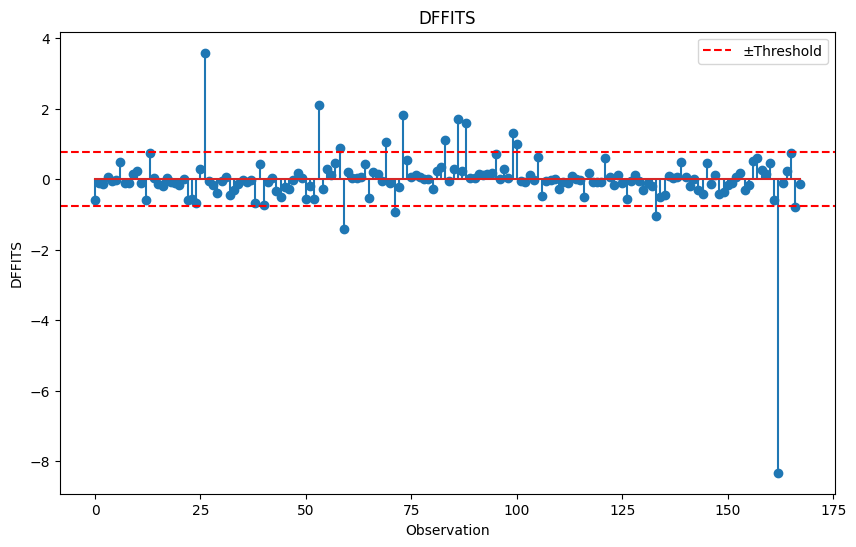

In [ ]:
dffits = influence.dffits[0]
dffits_threshold = 2 * np.sqrt(p / n)

plt.figure(figsize=(10, 6))
plt.stem(dffits)
plt.axhline(dffits_threshold, color='r', linestyle='--', label='±Threshold')
plt.axhline(-dffits_threshold, color='r', linestyle='--')
plt.title("DFFITS")
plt.xlabel("Observation")
plt.ylabel("DFFITS")
plt.legend()
plt.show()

## COVRATIOs

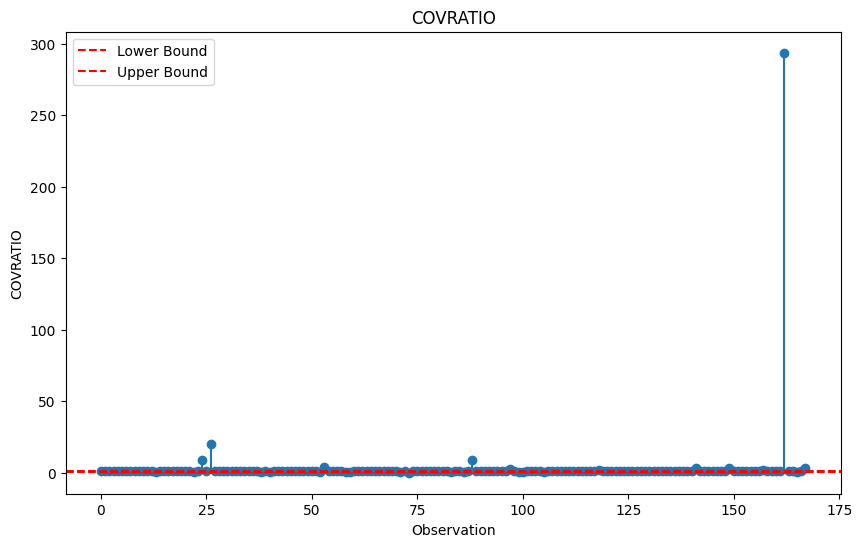

In [ ]:
covratio = influence.cov_ratio
cov_lower = 1 - 3 * p / n
cov_upper = 1 + 3 * p / n

plt.figure(figsize=(10, 6))
plt.stem(covratio)
plt.axhline(cov_lower, color='r', linestyle='--', label='Lower Bound')
plt.axhline(cov_upper, color='r', linestyle='--', label='Upper Bound')
plt.title("COVRATIO")
plt.xlabel("Observation")
plt.ylabel("COVRATIO")
plt.legend()
plt.show()

## Conensus diagnostic system

In [ ]:
summary = pd.DataFrame(index=range(n))
summary["leverage"] = (leverage > leverage_threshold).astype(int)
summary["cooks_d"] = (cooks_d > cooks_threshold).astype(int)
summary["dffits"] = (np.abs(dffits) > dffits_threshold).astype(int)
summary["covratio"] = ((covratio < cov_lower) | (covratio > cov_upper)).astype(int)

In [ ]:
summary.head()

leverage  cooks_d  dffits  covratio
0         0        0       0         0
1         0        0       0         0
2         0        0       0         0
3         0        0       0         0
4         0        0       0         0

In [ ]:
for j in range(dfbetas.shape[1]):
    summary[f"dfbeta_{j}"] = (np.abs(dfbetas[:, j]) > dfbeta_threshold).astype(int)

# Total flags per observation
summary["total_flags"] = summary.sum(axis=1)

summary

leverage  cooks_d  dffits  covratio  dfbeta_0  dfbeta_1  dfbeta_2  \
0           0        0       0         0         1         0         1   
1           0        0       0         0         0         0         0   
2           0        0       0         0         0         0         0   
3           0        0       0         0         0         0         0   
4           0        0       0         0         0         0         0   
..        ...      ...     ...       ...       ...       ...       ...   
163         0        0       0         0         0         0         0   
164         0        0       0         0         0         0         0   
165         0        0       0         0         1         0         0   
166         0        0       1         0         1         0         0   
167         1        0       0         1         0         0         0   

     dfbeta_3  dfbeta_4  dfbeta_5  ...  dfbeta_16  dfbeta_17  dfbeta_18  \
0           0         0         1  ...          0          0          1   
1           0         0         0  ...          0          0          0   
2           0         0         0  ...          0          0          0   
3           0         0         0  ...          0          0          0   
4           0         0         0  ...          0          0          0   
..        ...       ...       ...  ...        ...        ...        ...   
163         0         0         0  ...          0          0          0   
164         0         0         0  ...          0          0          0   
165         1         1         1  ...          0          0          0   
166         1         0         0  ...          0          1          1   
167         0         0         0  ...          0          0          0   

     dfbeta_19  dfbeta_20  dfbeta_21  dfbeta_22  dfbeta_23  dfbeta_24  \
0            1          1          0          0          1          1   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
163          0          0          0          0          0          0   
164          0          0          0          0          0          0   
165          0          0          0          0          0          0   
166          0          0          1          0          0          0   
167          0          0          0          0          0          0   

     total_flags  
0              9  
1              0  
2              0  
3              0  
4              0  
..           ...  
163            0  
164            0  
165            4  
166            7  
167            2  

[168 rows x 30 columns]

In [ ]:
summary.head()

leverage  cooks_d  dffits  covratio  dfbeta_0  dfbeta_1  dfbeta_2  \
0         0        0       0         0         1         0         1   
1         0        0       0         0         0         0         0   
2         0        0       0         0         0         0         0   
3         0        0       0         0         0         0         0   
4         0        0       0         0         0         0         0   

   dfbeta_3  dfbeta_4  dfbeta_5  ...  dfbeta_16  dfbeta_17  dfbeta_18  \
0         0         0         1  ...          0          0          1   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   dfbeta_19  dfbeta_20  dfbeta_21  dfbeta_22  dfbeta_23  dfbeta_24  \
0          1          1          0          0          1          1   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   total_flags  
0            9  
1            0  
2            0  
3            0  
4            0  

[5 rows x 30 columns]

In [ ]:
summary["total_flags"].unique()

array([ 9,  0,  5,  4,  6, 10,  8,  2,  1,  3, 14, 16, 11, 13, 12,  7])

In [ ]:
summary[summary["total_flags"]<=8].shape

(154, 30)

In [ ]:
# Step 1: Reset both DataFrames to ensure aligned indices
dfn_reset = dfn.reset_index(drop=True)
summary_reset = summary.reset_index(drop=True)

# Step 2: Create boolean mask from summary
mask = summary_reset["total_flags"] <= 8

# Step 3: Filter dfn
dfl = dfn_reset[mask]

In [ ]:
dfl.shape

(154, 27)

In [ ]:
dfl

Death_rate  Lower_bound  Upper_bound     Density  Life expectancy  \
1          9.81         6.60        13.10    3.293651            82.64   
2         10.03         7.28        13.02  123.059446            82.53   
3         10.12         7.09        13.32   94.350809            83.14   
4         10.00         6.74        13.78  112.288583            81.37   
5         10.40         6.90        13.66  217.042782            83.48   
..          ...          ...          ...         ...              ...   
163       93.31        76.17       109.70  159.609957            72.71   
164       95.58        57.30       146.30   74.395797            76.15   
165       96.13        63.40       130.70    4.102946            68.73   
166       96.07        65.75       148.30  110.839917            69.17   
167       96.67        68.36       126.40  145.132689            71.40   

     per_polluting_fuels  Forest_cover  Urbanisation  Industrialisation  \
1                    0.0     17.421315        86.124          25.272079   
2                    0.0     31.356735        80.709          16.907004   
3                    0.0     37.167722        80.565          19.977906   
4                    0.0     36.154995        65.764          18.886083   
5                    0.0     32.034469        73.849          24.721159   
..                   ...           ...           ...                ...   
163                 56.8     33.029115        51.439          21.942257   
164                 21.8     39.710151        58.208          23.703483   
165                  0.0     93.596850        26.689          28.689319   
166                  6.4      2.843108        54.821          15.916047   
167                 17.9     49.394296        55.985          38.951768   

     Precipitation(mm)  ...          NOx         PM10  Income_group_L  \
1                534.0  ...  1105.179363   185.602754             0.0   
2                867.0  ...   644.837670   297.478129             0.0   
3                636.0  ...   705.883686   151.825633             0.0   
4                854.0  ...   126.354822    57.052490             0.0   
5               1537.0  ...    69.105948    29.372740             0.0   
..                 ...  ...          ...          ...             ...   
163             1996.0  ...   141.604818   253.927452             0.0   
164              619.0  ...    18.826208     7.911364             0.0   
165             2387.0  ...    22.157226     7.097353             0.0   
166              252.0  ...    81.257645    15.968870             1.0   
167             2702.0  ...  2920.269651  1657.049010             0.0   

     Income_group_LM  Income_group_UM  ParentLocation_Americas  \
1                0.0              0.0                      0.0   
2                0.0              0.0                      0.0   
3                0.0              0.0                      0.0   
4                0.0              0.0                      0.0   
5                0.0              0.0                      0.0   
..               ...              ...                      ...   
163              0.0              1.0                      1.0   
164              0.0              1.0                      0.0   
165              0.0              1.0                      1.0   
166              0.0              0.0                      0.0   
167              0.0              1.0                      0.0   

     ParentLocation_Eastern Mediterranean  ParentLocation_Europe  \
1                                     0.0                    0.0   
2                                     0.0                    1.0   
3                                     0.0                    1.0   
4                                     0.0                    1.0   
5                                     0.0                    1.0   
..                                    ...                    ...   
163                                   0.0                    0.0   
1

In [ ]:
X=dfl.drop(columns=['Death_rate','Lower_bound','Upper_bound'])
Y=pd.DataFrame(dfl['Death_rate'])

## Check which countries correspond to high influential point

In [ ]:
mask=summary["total_flags"]>8
merged_df_reset = merged_df.reset_index(drop=True)
merged_df_flags=merged_df_reset[mask]

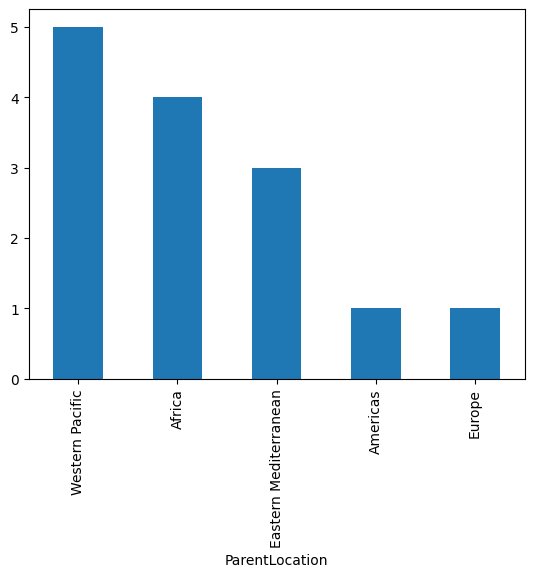

In [ ]:
merged_df_flags['ParentLocation'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
merged_df_flags['ParentLocation'].value_counts()

ParentLocation
Western Pacific          5
Africa                   4
Eastern Mediterranean    3
Americas                 1
Europe                   1
Name: count, dtype: int64

# MODEL FIT


In [ ]:
X=dfl.drop(columns=['Death_rate','Lower_bound','Upper_bound'])
Y=pd.DataFrame(dfl['Death_rate'])

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model1=LinearRegression()
model1.fit(X_train,y_train)
pred=model1.predict(X_test)

In [ ]:
r2_score=r2_score(y_test,pred)

In [ ]:
r2_score

0.8971061497060725

In [ ]:
adj_r2=1 - ((1 - r2_score) * (154 - 1)) / (154 - 24- 1)

In [ ]:
adj_r2

0.8779631077909232

# Checking Assumptions

In [ ]:
X.shape

(154, 24)

In [ ]:
X.head()

Density  Life expectancy  per_polluting_fuels  Forest_cover  \
1    3.293651            82.64                  0.0     17.421315   
2  123.059446            82.53                  0.0     31.356735   
3   94.350809            83.14                  0.0     37.167722   
4  112.288583            81.37                  0.0     36.154995   
5  217.042782            83.48                  0.0     32.034469   

   Urbanisation  Industrialisation  Precipitation(mm)           CO         OC  \
1        86.124          25.272079              534.0  2118.857116  36.973240   
2        80.709          16.907004              867.0  2481.249729  42.499764   
3        80.565          19.977906              636.0  1123.881843  22.063090   
4        65.764          18.886083              854.0   229.957187   8.909173   
5        73.849          24.721159             1537.0   212.213859   5.834756   

        PM2.5  ...          NOx        PM10  Income_group_L  Income_group_LM  \
1  138.985504  ...  1105.179363  185.602754             0.0              0.0   
2  226.100082  ...   644.837670  297.478129             0.0              0.0   
3   99.945273  ...   705.883686  151.825633             0.0              0.0   
4   45.582443  ...   126.354822   57.052490             0.0              0.0   
5   23.771621  ...    69.105948   29.372740             0.0              0.0   

   Income_group_UM  ParentLocation_Americas  \
1              0.0                      0.0   
2              0.0                      0.0   
3              0.0                      0.0   
4              0.0                      0.0   
5              0.0                      0.0   

   ParentLocation_Eastern Mediterranean  ParentLocation_Europe  \
1                                   0.0                    0.0   
2                                   0.0                    1.0   
3                                   0.0                    1.0   
4                                   0.0                    1.0   
5                                   0.0                    1.0   

   ParentLocation_South-East Asia  ParentLocation_Western Pacific  
1                             0.0                             1.0  
2                             0.0                             0.0  
3                             0.0                             0.0  
4                             0.0                             0.0  
5                             0.0                             0.0  

[5 rows x 24 columns]

In [ ]:
df1.shape

(194, 8)

In [ ]:
model1.coef_

array([[ 1.68860291e-04, -5.17103369e+00,  9.72595843e-01,
        -2.71631062e-01,  8.07292343e-02,  6.63107476e-01,
         5.16323179e-03, -9.59053801e-04, -1.92732874e-02,
         1.01832665e-01, -3.40202475e-03,  3.14512957e-01,
        -7.40717132e-03,  1.46206879e-02, -1.02618360e-02,
        -8.21124060e-02,  2.85891565e+01,  2.11297837e+01,
         5.71455284e+00,  4.32026446e+00,  3.37748946e+01,
         3.07700534e+01,  9.96354054e+00,  2.34155004e+01]])

In [ ]:
Y.head()

Death_rate
1        9.81
2       10.03
3       10.12
4       10.00
5       10.40

## Fitting of Linear Regression by OLS

In [ ]:
X_constant = sm.add_constant(X)
model = sm.OLS(Y, X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death_rate   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     93.98
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.68e-70
Time:                        15:37:28   Log-Likelihood:                -656.42
No. Observations:                 154   AIC:                             1363.
Df Residuals:                     129   BIC:                             1439.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  437.8630     41.530     10.543      0.000     355.695     520.031
Density                               1.158e-05      0.003      0.005      0.996      -0.005       0.005
Life expectancy                         -5.7786      0.559    -10.331      0.000      -6.885      -4.672
per_polluting_fuels                      1.0269      0.103      9.950      0.000       0.823       1.231
Forest_cover                            -0.2310      0.099     -2.336      0.021      -0.427      -0.035
Urbanisation                             0.1607      0.113      1.418      0.159      -0.064       0.385
Industrialisation                        0.3990      0.200      1.996      0.048       0.004       0.795
Precipitation(mm)                        0.0023      0.003      0.652      0.516      -0.005       0.009
CO                                      -0.0016      0.003     -0.485      0.629      -0.008       0.005
OC                                       0.0666      0.237      0.281      0.779      -0.403       0.536
PM2.5                                    0.1169      0.139      0.838      0.403      -0.159       0.393
SO2                                     -0.0052      0.006     -0.842      0.401      -0.018       0.007
BC                                       0.3444      0.481      0.715      0.476      -0.608       1.297
NH3                                     -0.0160      0.015     -1.091      0.277      -0.045       0.013
NMVOC                                    0.0191      0.014      1.366      0.174      -0.009       0.047
NOx                                     -0.0082      0.015     -0.529      0.598      -0.039       0.022
PM10                                    -0.1105      0.056     -1.970      0.051      -0.222       0.000
Income_group_L                          24.7618     10.287      2.407      0.017       4.408      45.116
Income_group_LM                         21.1671      6.825      3.101      0.002       7.663      34.671
Income_group_UM                          6.0406      5.187      1.165      0.246      -4.223      16.304
ParentLocation_Americas                  9.7970      7.433      1.318      0.190      -4.910      24.504
ParentLocation_Eastern Mediterranean    41.3957      8.430      4.911      0.000      24.717      58.075
ParentLocation_Europe                   36.4740      7.588      4.807      0.000      21.462      51.486
ParentLocation_South-East Asia          23.3952      9.950      2.351      0.020       3.709      43.082
ParentLocation_Western Pacific          36.4576      8.717      4.182      0.000      19.211      53.704
==============================================================================
Omnibus:                        4.212   Durbin-Watson:          

## Normality of Residuals

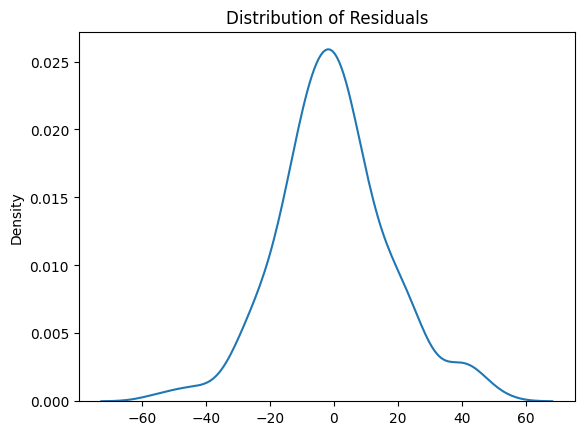

In [ ]:
Residuals = model.resid
sns.kdeplot(Residuals)
plt.title("Distribution of Residuals")
plt.show()

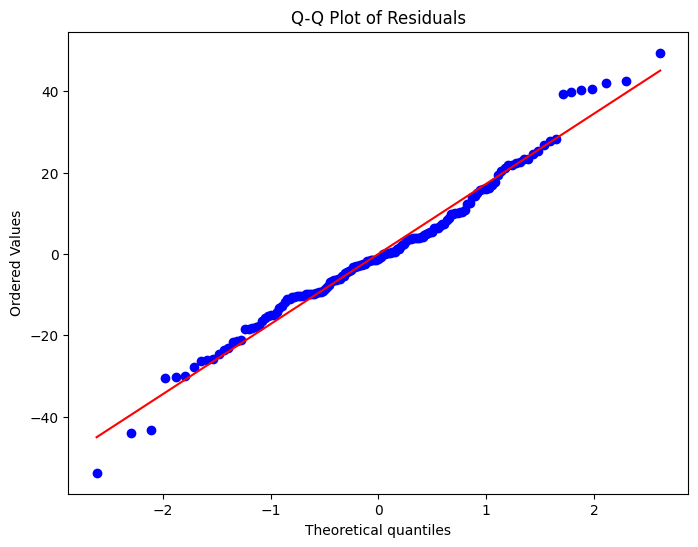

Shapiro-Wilk Test p-value: 0.04440265859759399
Residuals seem to follow a normal distribution (Shapiro-Wilk).


In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro, anderson

# Assuming 'Residuals' is the name of your residuals (e.g., model.resid)

# 1. Q-Q Plot for visual check
plt.figure(figsize=(8, 6))
stats.probplot(Residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 2. Shapiro-Wilk Test for normality
stat, p_value = shapiro(Residuals)
print(f"Shapiro-Wilk Test p-value: {p_value}")


# Interpretation:
if p_value > 0.01:
    print("Residuals seem to follow a normal distribution (Shapiro-Wilk).")
else:
    print("Residuals do not follow a normal distribution (Shapiro-Wilk).")


## Linearity

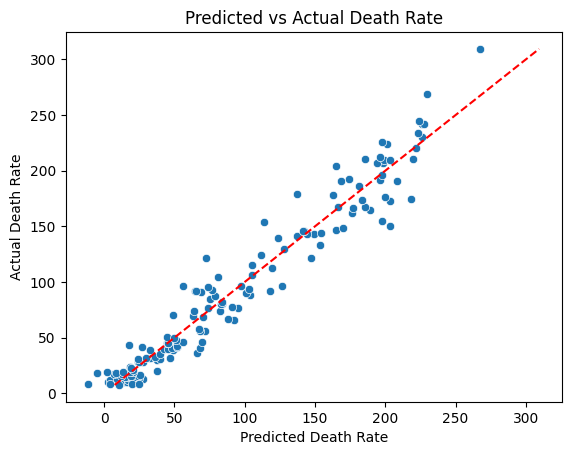

In [ ]:
y_pred = model.predict(X_constant).to_numpy().flatten()
Y_flat = Y.to_numpy().flatten()

# Create a DataFrame for plotting
Y_Pred = pd.DataFrame({'y_pred': y_pred, 'Y': Y_flat})

sns.scatterplot(data=Y_Pred, x='y_pred', y='Y')  # Pass column names as strings here
plt.plot([Y_flat.min(), Y_flat.max()], [Y_flat.min(), Y_flat.max()], color='red', linestyle='--')
plt.xlabel("Predicted Death Rate")
plt.ylabel("Actual Death Rate")
plt.title("Predicted vs Actual Death Rate")
plt.show()

## Heteroscedasticity

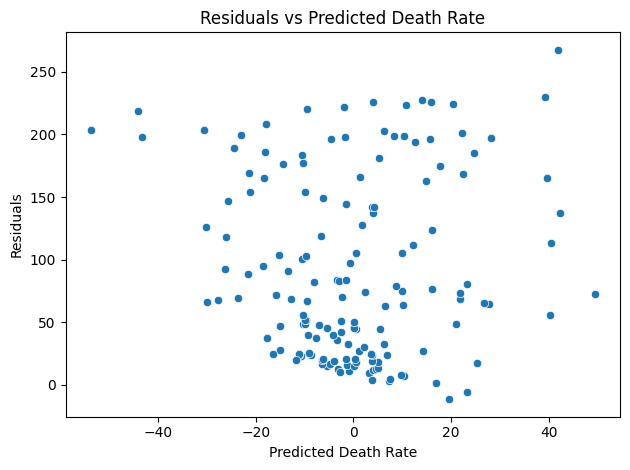

In [ ]:
sns.scatterplot(y = model.predict(X_constant), x = Residuals)
plt.ylabel("Residuals")
plt.xlabel("Predicted Death Rate")
plt.title("Residuals vs Predicted Death Rate")
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_white
white_test_results = het_white(model.resid, model.model.exog)

# Unpack results
lm_stat, lm_pvalue, f_stat, f_pvalue = white_test_results

# Print the results
print(f"LM Statistic: {lm_stat}")
print(f"LM p-value: {lm_pvalue}")
print(f"F-statistic: {f_stat}")
print(f"F-test p-value: {f_pvalue}")

# Interpretation
if lm_pvalue < 0.05:
    print("Reject null hypothesis: Heteroscedasticity detected.")
else:
    print("Fail to reject null hypothesis: No evidence of heteroscedasticity.")

LM Statistic: 154.0
LM p-value: 0.46210016412588567
F-statistic: nan
F-test p-value: nan
Fail to reject null hypothesis: No evidence of heteroscedasticity.


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test_results = het_breuschpagan(model.resid, model.model.exog)

# Unpack results
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test_results

# Print the results
print(f"LM Statistic: {lm_stat}")
print(f"LM p-value: {lm_pvalue}")
print(f"F-statistic: {f_stat}")
print(f"F-test p-value: {f_pvalue}")

# Interpretation
if lm_pvalue < 0.05:
    print("Reject null hypothesis: Heteroscedasticity detected.")
else:
    print("Fail to reject null hypothesis: No evidence of heteroscedasticity.")

LM Statistic: 30.5322923020891
LM p-value: 0.16773073189808088
F-statistic: 1.329182133398478
F-test p-value: 0.15804309856732557
Fail to reject null hypothesis: No evidence of heteroscedasticity.


## Independence of errors

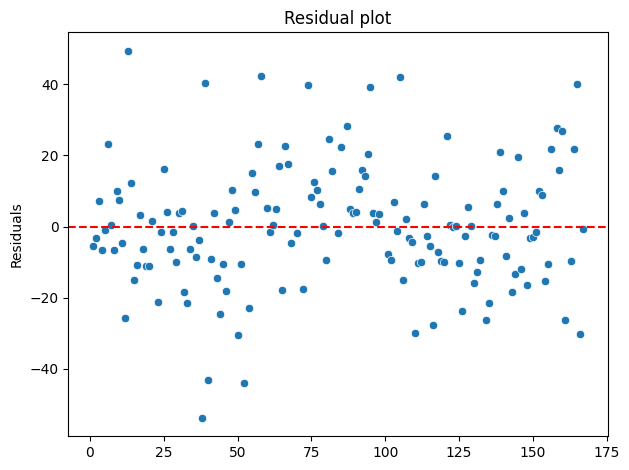

In [ ]:
sns.scatterplot(Residuals)
plt.ylabel("Residuals")
plt.axhline(y = 0, color = 'red',linestyle = '--')
plt.title("Residual plot")
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.sandbox.stats.runs import runstest_1samp

z, p = runstest_1samp(Residuals)
print(f"Runs test z = {z:.3f}, p-value = {p:.3f}")

Runs test z = -2.095, p-value = 0.036


In [ ]:
Residuals.mean()

np.float64(1.1812542286318238e-12)

## Multicollinearity

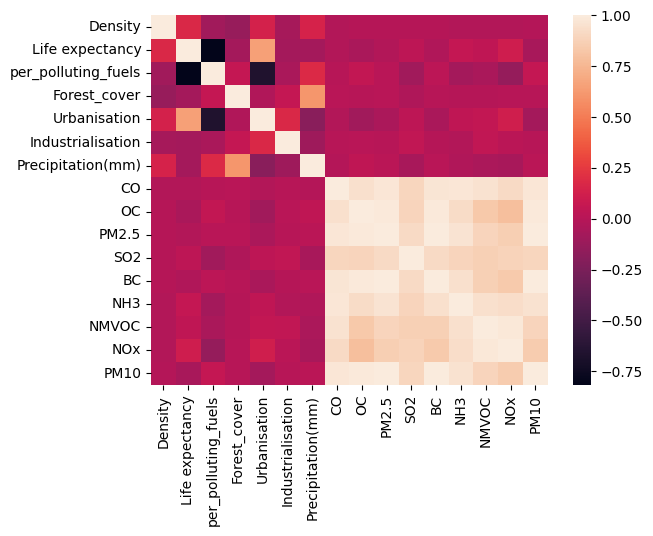

In [ ]:
numerical_cols = [
    'Density', 'Life expectancy', 'per_polluting_fuels', 'Forest_cover',
    'Urbanisation', 'Industrialisation', 'Precipitation(mm)',
    'CO', 'OC', 'PM2.5', 'SO2', 'BC', 'NH3', 'NMVOC', 'NOx', 'PM10'
]
sns.heatmap(X[numerical_cols].corr())
plt.tight_layout
plt.show()

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                                 feature          VIF
0                                Density     1.460010
1                        Life expectancy    53.761611
2                    per_polluting_fuels     9.385249
3                           Forest_cover     6.615466
4                           Urbanisation    21.431650
5                      Industrialisation    12.064442
6                      Precipitation(mm)    10.635934
7                                     CO   136.280045
8                                     OC   617.595806
9                                  PM2.5  1785.597210
10                                   SO2    21.154253
11                                    BC   402.267936
12                                   NH3    62.589229
13                                 NMVOC   187.479350
14                                   NOx   156.580316
15                                  PM10   652.199287
16                        Income_group_L     5.762940
17                       Inc

In [ ]:
X1 = X.drop(['OC','BC','NH3','NMVOC','NOx'],axis = 1)

In [ ]:
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X1.columns
vif_data1["VIF"] = [variance_inflation_factor(X1.values, i)
                   for i in range(X1.shape[1])]

print(vif_data1)

                                 feature         VIF
0                                Density    1.414788
1                        Life expectancy   50.892211
2                    per_polluting_fuels    9.268116
3                           Forest_cover    6.030535
4                           Urbanisation   20.711482
5                      Industrialisation   10.880616
6                      Precipitation(mm)   10.210836
7                                     CO   28.894084
8                                  PM2.5  227.110356
9                                    SO2    9.582611
10                                  PM10  213.043879
11                        Income_group_L    5.564593
12                       Income_group_LM    3.774829
13                       Income_group_UM    2.410894
14               ParentLocation_Americas    4.126012
15  ParentLocation_Eastern Mediterranean    2.607078
16                 ParentLocation_Europe    5.789885
17        ParentLocation_South-East Asia    2.

In [ ]:
corr_matrix = X.corr()
significant_corr_pairs = []
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, col]) > 0.8 and row != col:  # Exclude self-correlation
            significant_corr_pairs.append((row, col, corr_matrix.loc[row, col]))

# Display the pairs
significant_corr_pairs_df = pd.DataFrame(significant_corr_pairs, columns=['Predictor 1', 'Predictor 2', 'Correlation'])
print(significant_corr_pairs_df)

            Predictor 1          Predictor 2  Correlation
0   per_polluting_fuels      Life expectancy    -0.817757
1       Life expectancy  per_polluting_fuels    -0.817757
2                    OC                   CO     0.949672
3                 PM2.5                   CO     0.975109
4                   SO2                   CO     0.898455
..                  ...                  ...          ...
67                  SO2                 PM10     0.900436
68                   BC                 PM10     0.993775
69                  NH3                 PM10     0.950463
70                NMVOC                 PM10     0.888313
71                  NOx                 PM10     0.844057

[72 rows x 3 columns]


#Variable Selection

### Backward selection

In [ ]:
def backward_selection(X, Y, threshold_in=0.1):
    """
    Perform backward selection to remove non-significant variables.
    X: predictors dataframe
    Y: target variable
    threshold_in: p-value threshold for a variable to stay in the model
    """
    while True:
        # Fit the model
        model = sm.OLS(Y, sm.add_constant(X)).fit()

        # Get the p-values for the coefficients
        p_values = model.pvalues[1:]  # Skip the constant term

        # If all p-values are below the threshold, we're done
        if (p_values > threshold_in).sum() == 0:
            break

        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        feature_to_remove = p_values.idxmax()

        # If the highest p-value is greater than the threshold, remove the feature
        if max_p_value > threshold_in:
            print(f'Removing {feature_to_remove} with p-value {max_p_value}')
            X = X.drop(columns=[feature_to_remove])
        else:
            break

    return X, model

# Run backward selection
X_selected, final_model = backward_selection(X, Y)

# Print final model summary
print(final_model.summary())

Removing Density with p-value 0.9963907807119795
Removing OC with p-value 0.7776032546648077
Removing CO with p-value 0.5709963162016892
Removing NOx with p-value 0.46270597266223035
Removing BC with p-value 0.6086650262533169
Removing Precipitation(mm) with p-value 0.3727333919994179
Removing NH3 with p-value 0.27960601361203063
Removing SO2 with p-value 0.4983413521837843
Removing NMVOC with p-value 0.6276006346224517
Removing Income_group_UM with p-value 0.2717115112785365
Removing Urbanisation with p-value 0.19848934900914258
Removing PM10 with p-value 0.10517138724490101
Removing PM2.5 with p-value 0.6353023206984455
                            OLS Regression Results                            
Dep. Variable:             Death_rate   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     209.6
Date:                Wed, 16 Apr 2025   Prob (F-statis

In [ ]:
vif_data2 = pd.DataFrame()
vif_data2["feature"] = X_selected.columns
vif_data2["VIF"] = [variance_inflation_factor(X_selected.values, i)
                   for i in range(X_selected.shape[1])]

print(vif_data2)

                                 feature        VIF
0                        Life expectancy  22.437339
1                    per_polluting_fuels   7.760578
2                           Forest_cover   4.273549
3                      Industrialisation   9.736213
4                         Income_group_L   4.468430
5                        Income_group_LM   2.622899
6                ParentLocation_Americas   3.375291
7   ParentLocation_Eastern Mediterranean   2.454918
8                  ParentLocation_Europe   5.282129
9         ParentLocation_South-East Asia   1.493200
10        ParentLocation_Western Pacific   1.730205


### Relationship between Pollutants and Death rate

In [ ]:
pollutants = [
    'CO', 'OC', 'PM2.5', 'SO2', 'PM10', 'BC', 'NH3', 'NMVOC', 'NOx'
]  # List of pollutants you want to check


# Calculate correlations with Death_rate
correlation_with_death_rate = dfl[pollutants+['Death_rate']].corr()['Death_rate'].drop(['Death_rate'])

# Display correlation values
print("Correlation of each pollutant with Death Rate:\n")
print(correlation_with_death_rate.sort_values(ascending=True))

Correlation of each pollutant with Death Rate:

NOx     -0.115022
NH3     -0.056347
SO2     -0.035889
NMVOC   -0.033280
CO       0.018375
PM2.5    0.029048
BC       0.036868
PM10     0.068477
OC       0.068657
Name: Death_rate, dtype: float64


In [ ]:
dfl.head()

Death_rate  Lower_bound  Upper_bound     Density  Life expectancy  \
1        9.81         6.60        13.10    3.293651            82.64   
2       10.03         7.28        13.02  123.059446            82.53   
3       10.12         7.09        13.32   94.350809            83.14   
4       10.00         6.74        13.78  112.288583            81.37   
5       10.40         6.90        13.66  217.042782            83.48   

   per_polluting_fuels  Forest_cover  Urbanisation  Industrialisation  \
1                  0.0     17.421315        86.124          25.272079   
2                  0.0     31.356735        80.709          16.907004   
3                  0.0     37.167722        80.565          19.977906   
4                  0.0     36.154995        65.764          18.886083   
5                  0.0     32.034469        73.849          24.721159   

   Precipitation(mm)  ...          NOx        PM10  Income_group_L  \
1              534.0  ...  1105.179363  185.602754             0.0   
2              867.0  ...   644.837670  297.478129             0.0   
3              636.0  ...   705.883686  151.825633             0.0   
4              854.0  ...   126.354822   57.052490             0.0   
5             1537.0  ...    69.105948   29.372740             0.0   

   Income_group_LM  Income_group_UM  ParentLocation_Americas  \
1              0.0              0.0                      0.0   
2              0.0              0.0                      0.0   
3              0.0              0.0                      0.0   
4              0.0              0.0                      0.0   
5              0.0              0.0                      0.0   

   ParentLocation_Eastern Mediterranean  ParentLocation_Europe  \
1                                   0.0                    0.0   
2                                   0.0                    1.0   
3                                   0.0                    1.0   
4                                   0.0                    1.0   
5                                   0.0                    1.0   

   ParentLocation_South-East Asia  ParentLocation_Western Pacific  
1                             0.0                             1.0  
2                             0.0                             0.0  
3                             0.0                             0.0  
4                             0.0                             0.0  
5                             0.0                             0.0  

[5 rows x 27 columns]

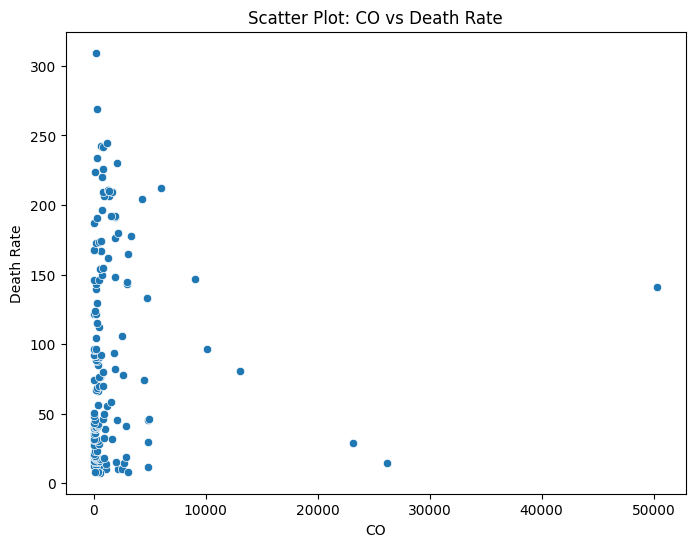

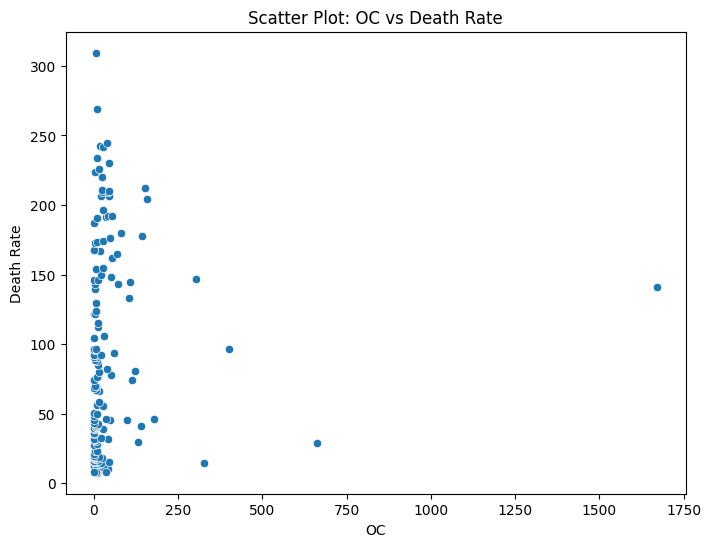

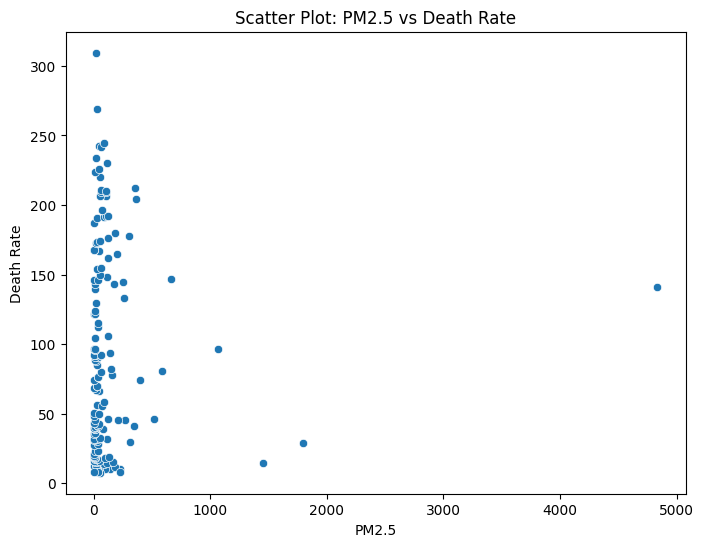

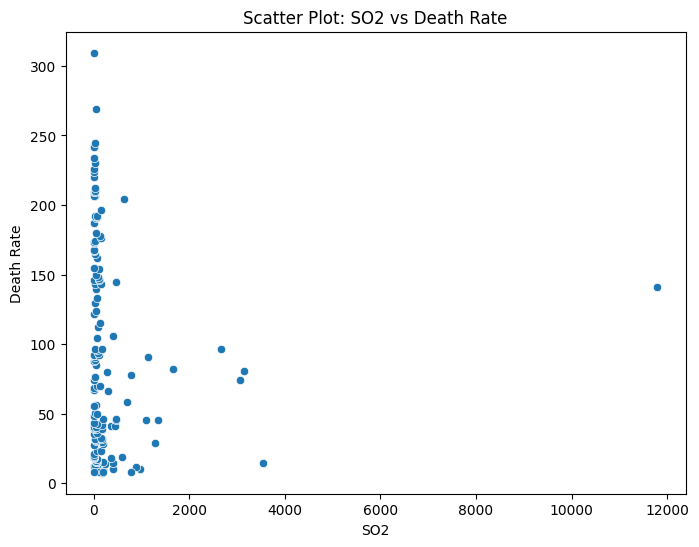

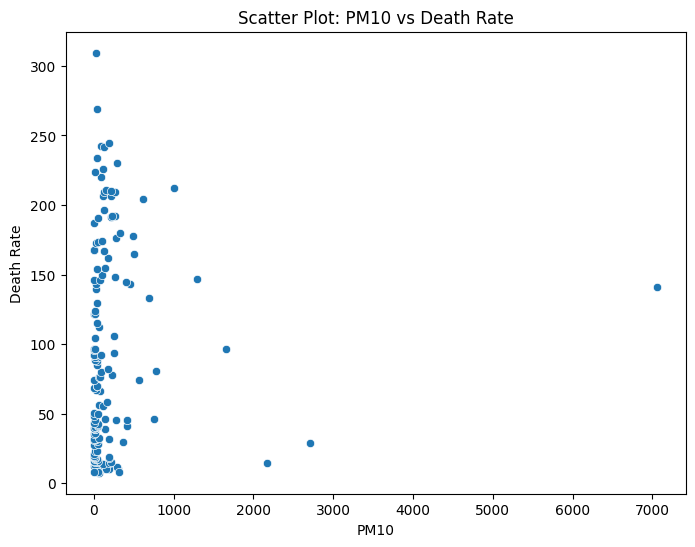

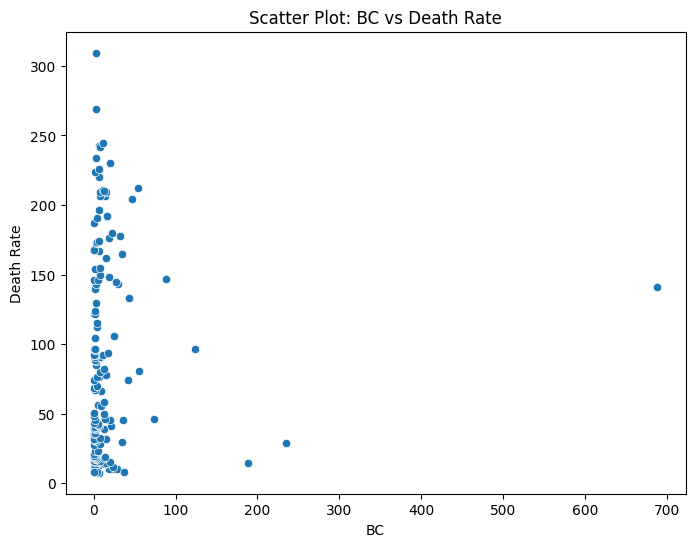

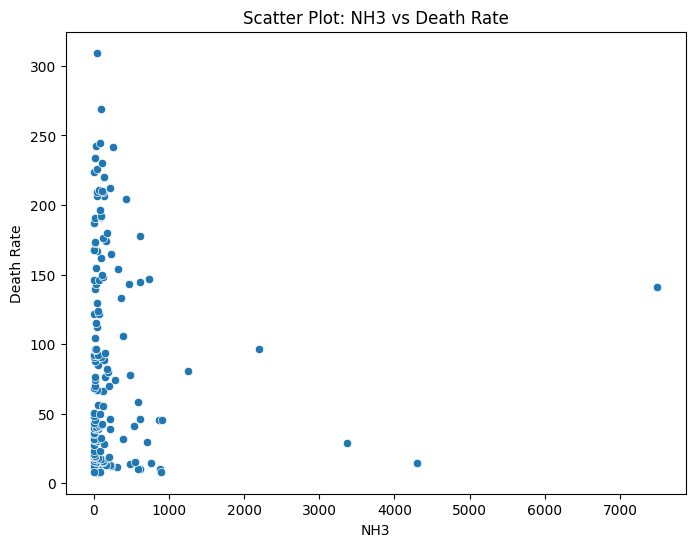

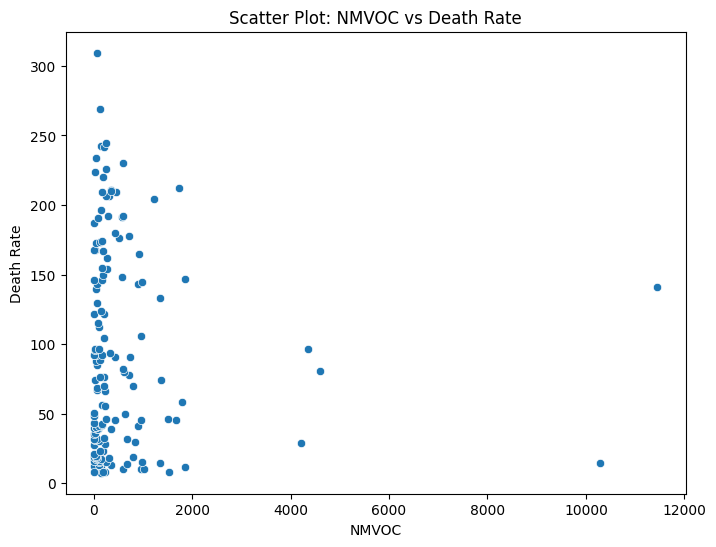

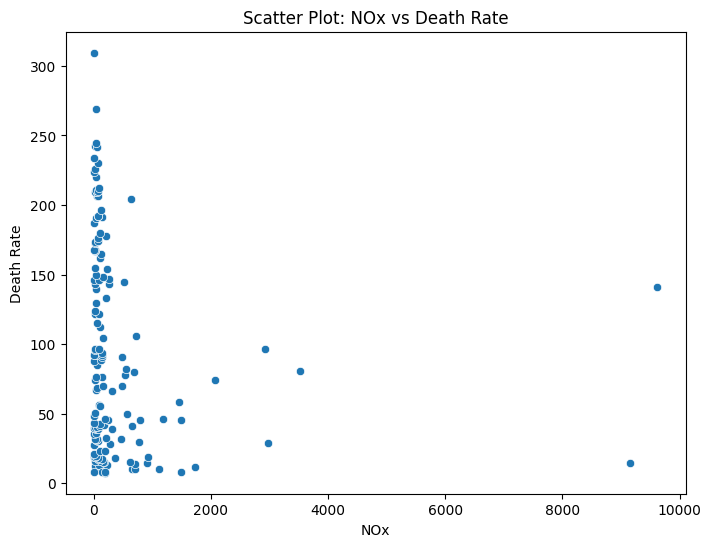

In [ ]:
# Loop through each pollutant and create a scatterplot
for pollutant in pollutants:
    plt.figure(figsize=(8, 6))  # Set the size of the plot
    sns.scatterplot(data=dfl, x=pollutant, y='Death_rate')  # Scatter plot
    plt.title(f'Scatter Plot: {pollutant} vs Death Rate')  # Title of the plot
    plt.xlabel(pollutant)  # x-axis label
    plt.ylabel('Death Rate')  # y-axis label
    plt.show()  # Display the plot

### Stepwise selection

In [ ]:
def stepwise_selection(X, y,
                       initial_features=None,
                       threshold_in=0.05,
                       threshold_out=0.1,
                       max_steps=25,
                       verbose=True):

    included = list(initial_features) if initial_features else []
    step = 0
    model_history = []

    while step < max_steps:
        step += 1
        changed = False

        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)

        for new_col in excluded:
            try:
                model = sm.OLS(y, sm.add_constant(X[included + [new_col]])).fit()
                new_pvals[new_col] = model.pvalues[new_col]
            except:
                new_pvals[new_col] = 1.0

        if not new_pvals.empty:
            best_pval = new_pvals.min()
            if best_pval < threshold_in:
                best_feature = new_pvals.idxmin()
                included.append(best_feature)
                changed = True
                if verbose:
                    print(f"Step {step}: Add {best_feature} with p-value {best_pval:.4f}")

        # Backward step
        if included:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max()

            if worst_pval > threshold_out:
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                changed = True
                if verbose:
                    print(f"Step {step}: Remove {worst_feature} with p-value {worst_pval:.4f}")

        if included:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues_dict = model.pvalues.iloc[1:].to_dict()
            rss = ((model.resid) ** 2).sum()

            # Partial F-statistic for each variable
            f_stats = {}
            for feat in included:
                X_temp = X[included].drop(columns=[feat])
                model_reduced = sm.OLS(y, sm.add_constant(X_temp)).fit()
                rss_reduced = ((model_reduced.resid) ** 2).sum()
                df_diff = 1
                f_stat = ((rss_reduced - rss) / df_diff) / (rss / model.df_resid)
                f_stats[feat] = f_stat

            model_history.append({
                "Step": step,
                "Features": included.copy(),
                "AIC": model.aic,
                "BIC": model.bic,
                "Adj_R2": model.rsquared_adj,
                "R2": model.rsquared,
                "P-Values": pvalues_dict,
                "Partial F": f_stats
            })

        if not changed:
            if verbose:
                print("🔕 No further improvement. Ending stepwise selection.")
            break

    if model_history:
        return pd.DataFrame(model_history)
    else:
        print("⚠️ No variables were selected. Try loosening p-value thresholds.")
        return pd.DataFrame(columns=["Step", "Features", "AIC", "BIC", "Adj_R2", "R2", "P-Values", "Partial F"])

In [ ]:
results_df = stepwise_selection(X, Y, threshold_in=0.05, threshold_out=0.1, verbose=True)
pd.set_option('display.max_colwidth', None)
results_df

Step 1: Add per_polluting_fuels with p-value 0.0000
Step 2: Add Life expectancy with p-value 0.0000
Step 3: Add ParentLocation_Eastern Mediterranean with p-value 0.0000
Step 4: Add ParentLocation_Americas with p-value 0.0000
Step 5: Add Income_group_LM with p-value 0.0122
Step 6: Add ParentLocation_Europe with p-value 0.0131
Step 7: Add ParentLocation_Western Pacific with p-value 0.0011
Step 7: Remove ParentLocation_Americas with p-value 0.7291
Step 8: Add ParentLocation_South-East Asia with p-value 0.0027
Step 9: Add Forest_cover with p-value 0.0301
Step 10: Add Industrialisation with p-value 0.0328
🔕 No further improvement. Ending stepwise selection.


Step  \
0      1   
1      2   
2      3   
3      4   
4      5   
5      6   
6      7   
7      8   
8      9   
9     10   
10    11   

                                                                                                                                                                                                                 Features  \
0                                                                                                                                                                                                   [per_polluting_fuels]   
1                                                                                                                                                                                  [per_polluting_fuels, Life expectancy]   
2                                                                                                                                            [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean]   
3                                                                                                                   [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean, ParentLocation_Americas]   
4                                                                                                  [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean, ParentLocation_Americas, Income_group_LM]   
5                                                                           [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean, ParentLocation_Americas, Income_group_LM, ParentLocation_Europe]   
6                                                                    [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean, Income_group_LM, ParentLocation_Europe, ParentLocation_Western Pacific]   
7                                    [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean, Income_group_LM, ParentLocation_Europe, ParentLocation_Western Pacific, ParentLocation_South-East Asia]   
8                      [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean, Income_group_LM, ParentLocation_Europe, ParentLocation_Western Pacific, ParentLocation_South-East Asia, Forest_cover]   
9   [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean, Income_group_LM, ParentLocation_Europe, ParentLocation_Western Pacific, ParentLocation_South-East Asia, Forest_cover, Industrialisation]   
10  [per_polluting_fuels, Life expectancy, ParentLocation_Eastern Mediterranean, Income_group_LM, ParentLocation_Europe, ParentLocation_Western Pacific, ParentLocation_South-East Asia, Forest_cover, Industrialisation]   

            AIC          BIC    Adj_R2        R2  \
0   1509.222504  1515.296410  0.810074  0.811315   
1   1426.535368  1435.646225  0.889687  0.891129   
2   1400.652120  1412.799930  0.907343  0.909160   
3   1383.963592  1399.148355  0.917381  0.919541   
4   1379.407098  1397.628813  0.920290  0.922895   
5   1374.932903  1396.191572  0.923051  0.926069   
6   1363.846703  1385.105371  0.928396  0.931204   
7   1356.296074  1380.591695  0.932241  0.935341   
8   1353.282358  1380.614931  0.933959  0.937412   
9   1350.393126  1380.762652  0.935579  0.939368   
10  1350.393126  1380.762652  0.935579  0.939368   

                                                                                                                                                                                                                                                                                                                                                                                                                                            P-Values  \
0                                                                                                                                            

In [ ]:
 S = X[['per_polluting_fuels', 'Life expectancy', 'ParentLocation_Eastern Mediterranean',
                                                     'Income_group_LM','ParentLocation_Europe', 'ParentLocation_Western Pacific',
                                                     'ParentLocation_South-East Asia','Forest_cover', 'Industrialisation']]
vif_data1 = pd.DataFrame()
vif_data1["feature"] = S.columns
vif_data1["VIF"] = [variance_inflation_factor(S.values, i)
                   for i in range(S.shape[1])]

print(vif_data1)

                                feature        VIF
0                   per_polluting_fuels   2.128108
1                       Life expectancy  12.039377
2  ParentLocation_Eastern Mediterranean   1.841125
3                       Income_group_LM   1.606118
4                 ParentLocation_Europe   2.433549
5        ParentLocation_Western Pacific   1.234463
6        ParentLocation_South-East Asia   1.237896
7                          Forest_cover   4.021953
8                     Industrialisation   9.125508


# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X.shape

(154, 24)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, random_state= 0)

In [ ]:
numerical_cols = [
    'Density', 'Life expectancy', 'per_polluting_fuels', 'Forest_cover',
    'Urbanisation', 'Industrialisation', 'Precipitation(mm)',
    'CO', 'OC', 'PM2.5', 'SO2', 'BC', 'NH3', 'NMVOC', 'NOx', 'PM10'
]

categorical_cols = [col for col in X.columns if col not in numerical_cols]

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols)

X_test_scaled = scaler.transform(X_test[numerical_cols])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols)

# Get categorical columns (already encoded or to be encoded earlier)
X_train_cat = X_train[categorical_cols].reset_index(drop=True)

X_test_cat = X_test[categorical_cols].reset_index(drop=True)

# Concatenate scaled numeric and categorical data
X_train = pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_cat], axis=1)

# Final feature matrix (X_final) and target vector (y) ready
X_train.head()


Density  Life expectancy  per_polluting_fuels  Forest_cover  Urbanisation  \
0  0.062462         1.132224            -0.800698     -0.849900      1.094768   
1 -0.171893         0.208761            -0.477277      1.126848      0.783566   
2  1.875054         0.317487            -0.786994     -1.305800     -0.822977   
3 -0.260392         0.782043            -0.800698      0.056469      1.042069   
4 -0.275151        -1.615573             1.635924      1.223413     -0.653616   

   Industrialisation  Precipitation(mm)        CO        OC     PM2.5  ...  \
0          -0.800152           0.051454 -0.115194 -0.222502 -0.093049  ...   
1           1.128463           2.187776 -0.194631 -0.251756 -0.199969  ...   
2          -1.369055           1.022157 -0.435788 -0.445202 -0.443660  ...   
3          -0.762336          -0.600415  7.201319  3.468566  5.592021  ...   
4           0.880553          -0.206712  0.101079  0.129631  0.052336  ...   

        NOx      PM10  Income_group_L  Income_group_LM  Income_group_UM  \
0  0.394569 -0.171123             0.0              0.0              0.0   
1  0.376294 -0.253433             0.0              0.0              1.0   
2 -0.341034 -0.477402             0.0              0.0              1.0   
3  9.417446  5.261709             0.0              0.0              0.0   
4 -0.285776  0.247247             0.0              1.0              0.0   

   ParentLocation_Americas  ParentLocation_Eastern Mediterranean  \
0                      0.0                                   0.0   
1                      0.0                                   0.0   
2                      0.0                                   0.0   
3                      1.0                                   0.0   
4                      0.0                                   0.0   

   ParentLocation_Europe  ParentLocation_South-East Asia  \
0                    1.0                             0.0   
1                    0.0                             0.0   
2                    0.0                             1.0   
3                    0.0                             0.0   
4                    0.0                             0.0   

   ParentLocation_Western Pacific  
0                             0.0  
1                             1.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 24 columns]

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.explained_variance_ratio_.cumsum()

array([0.46416381, 0.62223196, 0.72147462, 0.79089546, 0.84640627,
       0.8837821 , 0.91039685, 0.92921025, 0.94560811, 0.95809754,
       0.96972496, 0.97682457, 0.98285271, 0.98787073, 0.99152954,
       0.99434589, 0.9963082 , 0.99735957, 0.99827452, 0.99896306,
       0.99947797, 0.99985728, 0.9999422 , 1.        ])

Cumulative Explained Variance: [0.46416381 0.62223196 0.72147462 0.79089546 0.84640627 0.8837821
 0.91039685 0.92921025 0.94560811 0.95809754 0.96972496 0.97682457
 0.98285271 0.98787073 0.99152954 0.99434589 0.9963082  0.99735957
 0.99827452 0.99896306 0.99947797 0.99985728 0.9999422  1.        ]


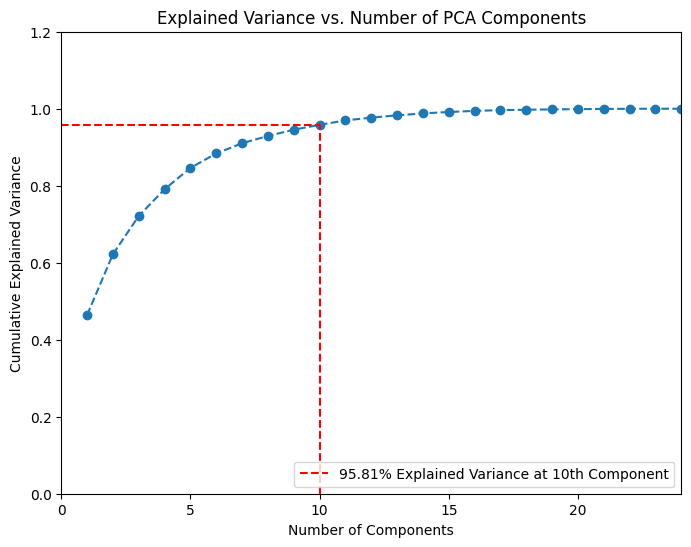

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Print or plot
print("Cumulative Explained Variance:", cumulative_variance)

# Optional: Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
explained_variance_at_10 = cumulative_variance[9]

# Vertical line from the 10th component to the curve
plt.plot([10, 10], [0, explained_variance_at_10], color='red', linestyle='--', label=f'{explained_variance_at_10*100:.2f}% Explained Variance at 10th Component')

# Horizontal line from the point at the 10th component to the y-axis
plt.plot([0, 10], [explained_variance_at_10, explained_variance_at_10], color='red', linestyle='--')
plt.xlim(0, len(cumulative_variance))
plt.ylim(0, 1.2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pca1 = PCA(n_components = 24)
X_train_pca1 = pca1.fit_transform(X_train)
X_test_pca1 = pca1.transform(X_test)
pca1.explained_variance_ratio_.cumsum()
pca_model1 = sm.OLS(y_train, X_train_pca1).fit()
pca_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Death_rate   R-squared (uncentered):                   0.371
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              2.438
Date:                Wed, 16 Apr 2025   Prob (F-statistic):                     0.00113
Time:                        15:37:32   Log-Likelihood:                         -728.07
No. Observations:                 123   AIC:                                      1504.
Df Residuals:                      99   BIC:                                      1572.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.8728      3.213     -0.583      0.561      -8.249       4.503
x2            37.5888      5.507      6.826      0.000      26.662      48.515
x3           -12.5785      6.950     -1.810      0.073     -26.368       1.211
x4             4.3986      8.309      0.529      0.598     -12.089      20.886
x5            15.6394      9.292      1.683      0.096      -2.799      34.077
x6             9.0834     11.324      0.802      0.424     -13.387      31.554
x7            15.4249     13.420      1.149      0.253     -11.203      42.053
x8             4.3959     15.962      0.275      0.784     -27.276      36.067
x9             9.3405     17.097      0.546      0.586     -24.584      43.265
x10           11.0901     19.590      0.566      0.573     -27.781      49.961
x11           -2.7416     20.303     -0.135      0.893     -43.028      37.545
x12           16.5217     25.983      0.636      0.526     -35.035      68.078
x13           -3.0405     28.198     -0.108      0.914     -58.992      52.911
x14           19.4667     30.906      0.630      0.530     -41.858      80.791
x15           10.6054     36.194      0.293      0.770     -61.212      82.423
x16           12.0584     41.254      0.292      0.771     -69.799      93.916
x17           34.5454     49.423      0.699      0.486     -63.520     132.611
x18           36.5606     67.520      0.541      0.589     -97.414     170.535
x19           -9.6998     72.379     -0.134      0.894    -153.316     133.916
x20           66.0281     83.435      0.791      0.431     -99.525     231.581
x21           -3.9251     96.482     -0.041      0.968    -195.366     187.516
x22          -25.9830    112.414     -0.231      0.818    -249.036     197.070
x23          -12.7722    237.571     -0.054      0.957    -484.165     458.621
x24           56.5361    287.972      0.196      0.845    -514.864     627.936
==============================================================================
Omnibus:                        3.076   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.777
Skew:                           0.188   Prob(JB):                        0.249
Kurtosis:                       3.633   Cond. No.                         89.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pca2 = PCA(n_components = 10)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)
pca2.explained_variance_ratio_.cumsum()
pca_model2 = sm.OLS(y_train, X_train_pca2).fit()
pca_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Death_rate   R-squared (uncentered):                   0.355
Model:                            OLS   Adj. R-squared (uncentered):              0.298
Method:                 Least Squares   F-statistic:                              6.231
Date:                Wed, 16 Apr 2025   Prob (F-statistic):                    1.53e-07
Time:                        15:37:33   Log-Likelihood:                         -729.62
No. Observations:                 123   AIC:                                      1479.
Df Residuals:                     113   BIC:                                      1507.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.8728      3.046     -0.615      0.540      -7.907       4.162
x2            37.5888      5.220      7.201      0.000      27.248      47.930
x3           -12.5785      6.587     -1.909      0.059     -25.629       0.472
x4             4.3986      7.876      0.558      0.578     -11.205      20.003
x5            15.6394      8.808      1.776      0.078      -1.811      33.089
x6             9.0834     10.734      0.846      0.399     -12.183      30.350
x7            15.4249     12.720      1.213      0.228      -9.776      40.626
x8             4.3959     15.130      0.291      0.772     -25.578      34.370
x9             9.3405     16.206      0.576      0.566     -22.766      41.447
x10           11.0901     18.569      0.597      0.552     -25.698      47.879
==============================================================================
Omnibus:                       18.617   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.598
Skew:                           0.719   Prob(JB):                     3.74e-07
Kurtosis:                       4.925   Cond. No.                         6.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ML = LinearRegression()
ML.fit(X_train_pca2, y_train)

LinearRegression()

In [ ]:
r2_score(y_test,ML.predict(X_test_pca2))

0.911399553360218

In [ ]:
r2_score(y_train,ML.predict(X_train_pca2))

0.9068306593943053

# Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
ridge_alphas = np.logspace(-3, 3, 100)

ridge_model = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Best alpha for Ridge:", ridge_model.alpha_)
print("R² score (Ridge):", ridge_r2)

Best alpha for Ridge: 8.697490026177835
R² score (Ridge): 0.8904296060346789


In [ ]:
ridge_model.coef_

array([ -0.08436305, -30.17866933,  32.9741141 ,  -4.88406322,
        -2.03421516,   6.30850865,  -0.33522775,  -0.6313034 ,
         3.41452602,   0.59333258,  -2.55821907,  -3.65268729,
         0.65478715,   2.80324392,   0.03863286,  -1.60262228,
         7.68469716,  10.63901784,   2.08504855, -10.77093394,
        12.07662538,   2.25687245,   2.45415788,   9.94580556])

In [ ]:
Y_Pred_Ridge = ridge_model.predict(X_test)
r2_score(y_test,Y_Pred_Ridge)

0.8904296060346789

In [ ]:
numerical_cols = [
    'Density', 'Life expectancy', 'per_polluting_fuels', 'Forest_cover',
    'Urbanisation', 'Industrialisation', 'Precipitation(mm)',
    'CO', 'OC', 'PM2.5', 'SO2', 'BC', 'NH3', 'NMVOC', 'NOx', 'PM10'
]

categorical_cols = [col for col in X.columns if col not in numerical_cols]

# Scale the numerical features
scaler = StandardScaler()
X__scaled = scaler.fit_transform(X[numerical_cols])
X_scaled_df = pd.DataFrame(X__scaled, columns=numerical_cols)
X__cat = X[categorical_cols].reset_index(drop=True)

# Concatenate scaled numeric and categorical data
X_Scaled = pd.concat([X_scaled_df, X__cat], axis=1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Create and configure the Ridge model
ridge = Ridge(alpha=ridge_model.alpha_)

# Perform 5-fold cross-validation (you can change cv=5)
r2_scores = cross_val_score(ridge, X_Scaled, Y, cv=5, scoring='r2')

# Display individual and average R² scores
print("Cross-validated R² scores for each fold:", r2_scores)
print("Mean Cross-validated R² score:", np.mean(r2_scores))


Cross-validated R² scores for each fold: [0.88794295 0.8667114  0.80096057 0.84256341 0.5802758 ]
Mean Cross-validated R² score: 0.795690825178249


# Lasso Regression

In [ ]:
lasso_alphas = np.logspace(-3, 3, 100)

lasso_model = LassoCV(alphas=lasso_alphas, cv=5, max_iter=5000, random_state=42)
lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Best alpha for Lasso:", lasso_model.alpha_)
print("R² score (Lasso):", lasso_r2)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha for Lasso: 0.8111308307896873
R² score (Lasso): 0.9156960150264077


In [ ]:
lasso_model.coef_

array([  0.        , -30.87521206,  37.2264473 ,  -4.38245972,
        -0.        ,   5.30214231,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.46310253,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   6.24996476,   0.        , -11.5232989 ,
        15.50877262,   0.        ,   0.        ,   5.39816329])

In [ ]:
coefficients = lasso_model.coef_
predictor_names = X_train.columns

# Create a DataFrame to display the coefficients with predictor names
coefficients_df = pd.DataFrame({
    'Predictor': predictor_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of coefficients to easily identify the most important predictors
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients_df[['Predictor', 'Coefficient']])

                               Predictor  Coefficient
2                    per_polluting_fuels    37.226447
1                        Life expectancy   -30.875212
20  ParentLocation_Eastern Mediterranean    15.508773
19               ParentLocation_Americas   -11.523299
17                       Income_group_LM     6.249965
23        ParentLocation_Western Pacific     5.398163
5                      Industrialisation     5.302142
3                           Forest_cover    -4.382460
10                                   SO2    -0.463103
6                      Precipitation(mm)    -0.000000
4                           Urbanisation    -0.000000
0                                Density     0.000000
7                                     CO    -0.000000
8                                     OC    -0.000000
9                                  PM2.5    -0.000000
11                                    BC    -0.000000
15                                  PM10    -0.000000
14                          

In [ ]:
Y_Pred_Lasso = lasso_model.predict(X_test)
r2_score(y_test,Y_Pred_Lasso)

0.9156960150264077

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

# Create and configure the Lasso model
lasso = Lasso(alpha=lasso_model.alpha_)

# Perform 5-fold cross-validation (you can change cv=5 to any other value)
r2_scores = cross_val_score(lasso, X_Scaled,Y, cv=5, scoring='r2')

# Display individual and average R² scores
print("Cross-validated R² scores for each fold:", r2_scores)
print("Mean Cross-validated R² score:", np.mean(r2_scores))


Cross-validated R² scores for each fold: [0.88476802 0.85268168 0.84157598 0.86968398 0.55487908]
Mean Cross-validated R² score: 0.8007177468737368


# PLS

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error


from sklearn.model_selection import cross_val_score

scores = []
for n in range(1, X_train.shape[1]+1):
    pls = PLSRegression(n_components=n)
    score = cross_val_score(pls, X_train, y_train, cv=5, scoring='r2').mean()
    scores.append(score)

best_n = np.argmax(scores)
print("Best number of components:", best_n)


# Fit PLS model with chosen number of components
pls = PLSRegression(n_components=best_n)  # You can tune this number
pls.fit(X_train, y_train)

# Predict
pls_pred = pls.predict(X_test)

# Evaluation
pls_r2 = r2_score(y_test, pls_pred)
pls_mse = mean_squared_error(y_test, pls_pred)
pls_rmse = np.sqrt(pls_mse)

print("R² score (PLS):", pls_r2)
print("RMSE (PLS):", pls_rmse)

Best number of components: 10
R² score (PLS): 0.8639142228196058
RMSE (PLS): 30.513501158489884


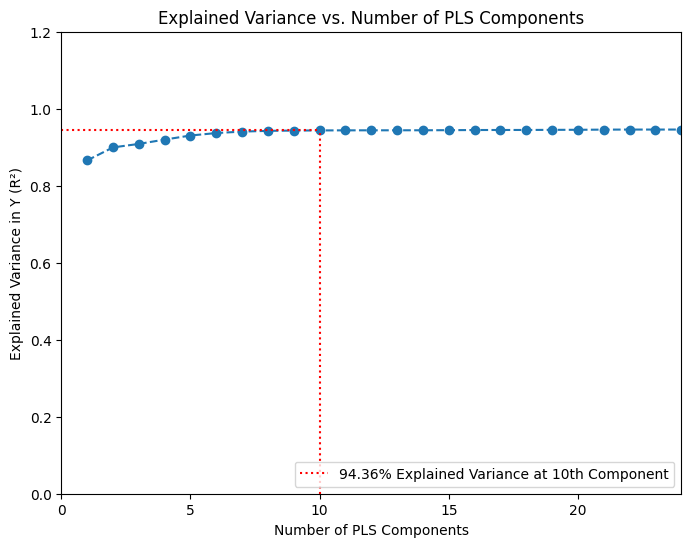

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

max_components = min(X_Scaled.shape[0], X_Scaled.shape[1])
r2_scores = []

for n in range(1, max_components + 1):
    pls = PLSRegression(n_components=n)
    pls.fit(X_Scaled, Y)
    y_pred_pl = pls.predict(X_Scaled)
    r2 = r2_score(Y, y_pred_pl)
    r2_scores.append(r2)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_components + 1), r2_scores, marker='o', linestyle='--')

if len(r2_scores) >= 10:
    explained_at_10 = r2_scores[9]

    # Vertical line from x-axis to the curve
    plt.plot([10, 10], [0, explained_at_10], color='red', linestyle=':', label=f'{explained_at_10*100:.2f}% Explained Variance at 10th Component')

    # Horizontal line from curve to y-axis
    plt.plot([0, 10], [explained_at_10, explained_at_10], color='red', linestyle=':')

plt.xlabel('Number of PLS Components')
plt.ylabel('Explained Variance in Y (R²)')
plt.title('Explained Variance vs. Number of PLS Components')
plt.legend(loc='lower right')
plt.xlim(0, max_components)
plt.ylim(0, 1.2)
plt.show()




# Combined Results

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X = X_Scaled
y = Y
# ----- Utility: Adjusted R² -----
def adjusted_r2_score(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

# ----- Setup -----
cv = KFold(n_splits=5, shuffle=True, random_state=42)
n, k = X.shape

# Store results
results = {}

# ----- 1. Multiple Linear Regression -----
mlr = LinearRegression()
y_pred = cross_val_predict(mlr, X, y, cv=cv)
results['MLR'] = y_pred

# ----- 2. Stepwise Model -----
mlr_stepwise = LinearRegression()
y_pred_stepwise = cross_val_predict(mlr_stepwise, X[['per_polluting_fuels', 'Life expectancy', 'ParentLocation_Eastern Mediterranean',
                                                     'Income_group_LM','ParentLocation_Europe', 'ParentLocation_Western Pacific',
                                                     'ParentLocation_South-East Asia','Forest_cover', 'Industrialisation']],y,cv=cv)

results['Stepwise'] = y_pred_stepwise

# ----- 3. Principal Component Regression (PCR) -----
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Perform cross-validation on PCA-transformed data
y_pred_pcr = cross_val_predict(LinearRegression(), X_pca, y, cv=cv)
results['PCR'] = y_pred_pcr

# ----- 4. Ridge Regression -----
ridge = Ridge(alpha=ridge_model.alpha_)
y_pred_ridge = cross_val_predict(ridge, X, y, cv=cv)
results['Ridge'] = y_pred_ridge

# ----- 5. Lasso Regression -----
lasso = Lasso(alpha=lasso_model.alpha_)
y_pred_lasso = cross_val_predict(lasso, X, y, cv=cv)
results['Lasso'] = y_pred_lasso

# ----- 6. Partial Least Squares (PLS) Regression -----
pls = PLSRegression(n_components=10)  # You can tune the number of components
y_pred_pls = cross_val_predict(pls, X, y, cv=cv)
results['PLS'] = y_pred_pls

# ----- Evaluate All Models -----
metrics = []
for model_name, y_pred_model in results.items():
    r2 = r2_score(y, y_pred_model)
    adj_r2 = adjusted_r2_score(r2, n, k)
    mse = mean_squared_error(y, y_pred_model)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred_model)

    metrics.append({
        'Model': model_name,
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    })

metrics_df = pd.DataFrame(metrics)
print(metrics_df.sort_values(by='R²', ascending=False))


      Model        R²  Adjusted R²         MSE       RMSE        MAE
1  Stepwise  0.929822     0.916766  382.698674  19.562686  15.033224
5       PLS  0.911691     0.895261  481.575376  21.944826  16.350599
4     Lasso  0.909932     0.893175  491.166203  22.162270  16.159237
3     Ridge  0.901385     0.883038  537.776270  23.190004  17.009438
0       MLR  0.885306     0.863968  625.459071  25.009180  17.993338
2       PCR  0.874289     0.850901  685.536831  26.182758  18.985216


***Interpretation of RMSE Score:*** *On average, the model’s predicted death rates deviate from the actual values by about 19.56 units, which is roughly 6.5% of the total death rate range. This suggests that the model performs reasonably well in terms of absolute error — especially given the wide range of death rates.*

# TRY

In [ ]:
df2=pd.merge(X,Y,left_index=True,right_index=True)

In [ ]:
df2.shape

(142, 25)

In [ ]:
residuals=y_test-pred

In [ ]:
residuals

Death_rate
28   109.826789
98  -231.880640
165  -25.617166
120  -27.065514
26    89.277002
8    -74.348347
46   142.186886
118 -120.742304
60   -17.857441
132  -67.264384
151 -143.704462
94   139.606853
148  -19.190695
57   -46.934573
119 -177.897702
42   -18.543207
35   -54.774399
145  -70.381079
78   209.468645
136   11.103556
108 -107.659926
9    -81.794283
149   76.045385
158  -64.570026
39   124.257394
112 -131.960887
92   205.760899
65    19.729983
105  112.135134
87   181.669663
17   -67.289204

Normality of errors

<Axes: ylabel='Density'>

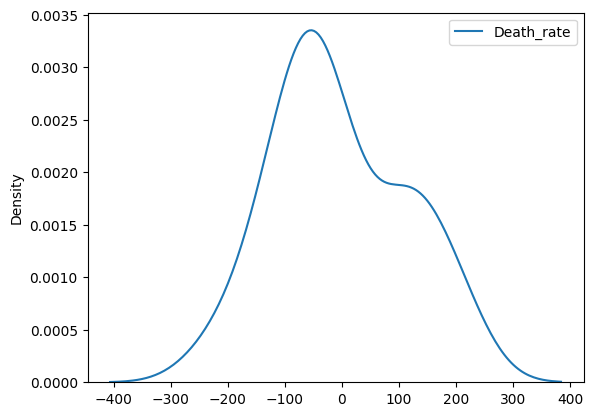

In [ ]:
sns.kdeplot(residuals)

Linearity

In [ ]:
residuals.shape
pred = np.ravel(pred)           # ensures it's 1D
residuals = np.ravel(residuals)


<Axes: >

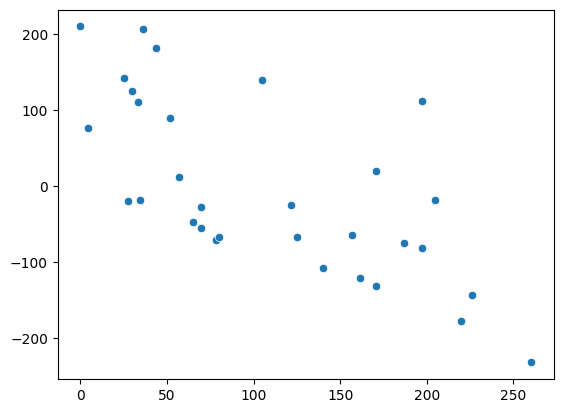

In [ ]:
sns.scatterplot(x=pred,y=residuals)

Independence of errors

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 2.4625186119599416


Multicollinearirty

In [ ]:
df2.corr()

Density  Life expectancy  \
Density                               1.000000         0.187219   
Life expectancy                       0.187219         1.000000   
per_polluting_fuels                  -0.095096        -0.802047   
Forest_cover                         -0.137764        -0.126961   
Urbanisation                          0.146216         0.635674   
Industrialisation                    -0.079828        -0.111690   
Precipitation(mm)                     0.151140        -0.066058   
CO                                   -0.010807        -0.053445   
OC                                   -0.002310        -0.074117   
PM2.5                                -0.001287        -0.046964   
SO2                                   0.003910         0.001153   
BC                                    0.000670        -0.053144   
NH3                                  -0.010213         0.021143   
NMVOC                                -0.009505        -0.010480   
NOx                                  -0.003104         0.066627   
PM10                                 -0.006227        -0.084896   
Income_group_L                       -0.052766        -0.564317   
Income_group_LM                      -0.065034        -0.293368   
Income_group_UM                      -0.092637         0.019485   
ParentLocation_Americas              -0.062745         0.144179   
ParentLocation_Eastern Mediterranean  0.010134         0.116702   
ParentLocation_Europe                -0.067288         0.511432   
ParentLocation_South-East Asia        0.083413        -0.015586   
ParentLocation_Western Pacific        0.265518         0.054598   
Death_rate                           -0.032460        -0.335423   

                                      per_polluting_fuels  Forest_cover  \
Density                                         -0.095096     -0.137764   
Life expectancy                                 -0.802047     -0.126961   
per_polluting_fuels                              1.000000      0.108703   
Forest_cover                                     0.108703      1.000000   
Urbanisation                                    -0.666320     -0.049406   
Industrialisation                               -0.029748      0.057554   
Precipitation(mm)                                0.168760      0.610979   
CO                                               0.039696      0.016682   
OC                                               0.067908      0.005291   
PM2.5                                            0.034297      0.008619   
SO2                                             -0.067485     -0.033753   
BC                                               0.045075      0.000673   
NH3                                             -0.036751     -0.006874   
NMVOC                                           -0.011006     -0.007322   
NOx                                             -0.115456     -0.000883   
PM10                                             0.081763      0.007346   
Income_group_L                                   0.649473     -0.118262   
Income_group_LM                                  0.309672     -0.012870   
Income_group_UM                                 -0.215555      0.196876   
ParentLocation_Americas                         -0.217103      0.234753   
ParentLocation_Eastern Mediterranean            -0.216780     -0.393737   
ParentLocation_Europe                           -0.460686     -0.122275   
ParentLocation_South-East Asia                   0.121198      0.066780   
ParentLocation_Western Pacific                   0.074777      0.262731   
Death_rate                                       0.358067     -0.000043   

                                      Urbanisation  Industrialisation  \
Density                                   0.146216          -0.079828   
Life expectancy                           0.635674          -0.111690   
per_polluting_fuels                      -0.666320          -0.029748   
Forest_cover                             -0.049406   

<Axes: >

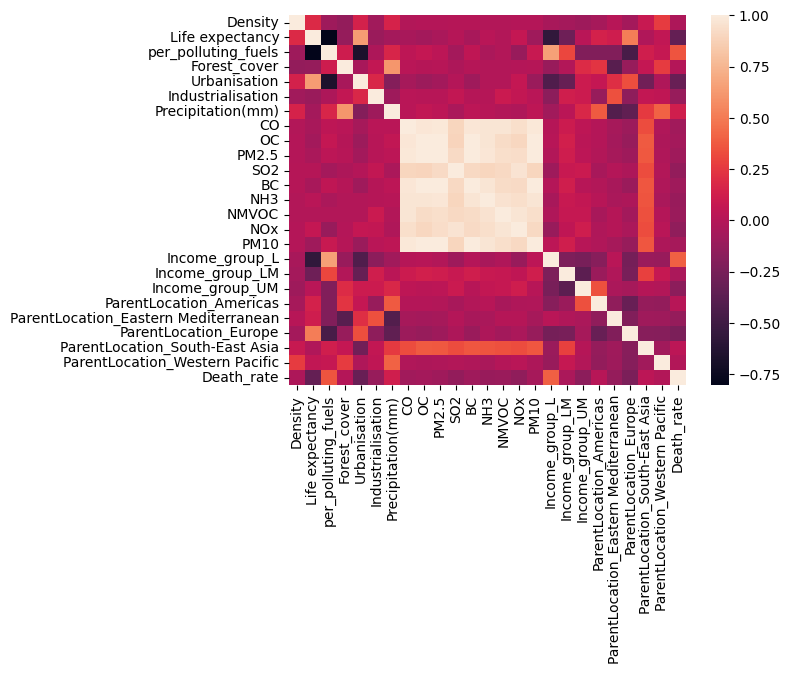

In [ ]:
sns.heatmap(df2.corr())

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                                 feature          VIF
0                                Density     1.320495
1                        Life expectancy     6.934935
2                    per_polluting_fuels     6.381157
3                           Forest_cover     2.278065
4                           Urbanisation     2.598646
5                      Industrialisation     1.675348
6                      Precipitation(mm)     3.224174
7                                     CO   117.932368
8                                     OC   562.499288
9                                  PM2.5  1633.748709
10                                   SO2    18.676748
11                                    BC   379.019518
12                                   NH3    52.792157
13                                 NMVOC   162.798621
14                                   NOx   138.692658
15                                  PM10   582.738849
16                        Income_group_L     5.148905
17                       Inc

In [ ]:
vif_data[vif_data['VIF']>10]

feature          VIF
7       CO   117.932368
8       OC   562.499288
9    PM2.5  1633.748709
10     SO2    18.676748
11      BC   379.019518
12     NH3    52.792157
13   NMVOC   162.798621
14     NOx   138.692658
15    PM10   582.738849

PC Regression

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
scaler = StandardScaler()

# Create PCA + Linear Regression pipeline
pcr_pipeline = make_pipeline(
    scaler,
    PCA(n_components=0.95),  # Retain 95% variance
    LinearRegression()
)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def pca_r2_comparison(X, y, max_components=None, test_size=0.2, random_state=42):
    if max_components is None:
        max_components = X.shape[1]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    r2_scores = []
    components = list(range(1, max_components + 1))

    for n in components:
        pipeline = make_pipeline(
            StandardScaler(),
            PCA(n_components=n),
            LinearRegression()
        )
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        r2 = r2_score(y_test, y_pred)  # <- Now it's the real function
        r2_scores.append(r2)

    # Plot R² vs n_components
    plt.figure(figsize=(10, 5))
    plt.plot(components, r2_scores, marker='o')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('R² Score (on test set)')
    plt.title('PCR Performance for Varying n_components')
    plt.grid(True)
    plt.show()

    return dict(zip(components, r2_scores))


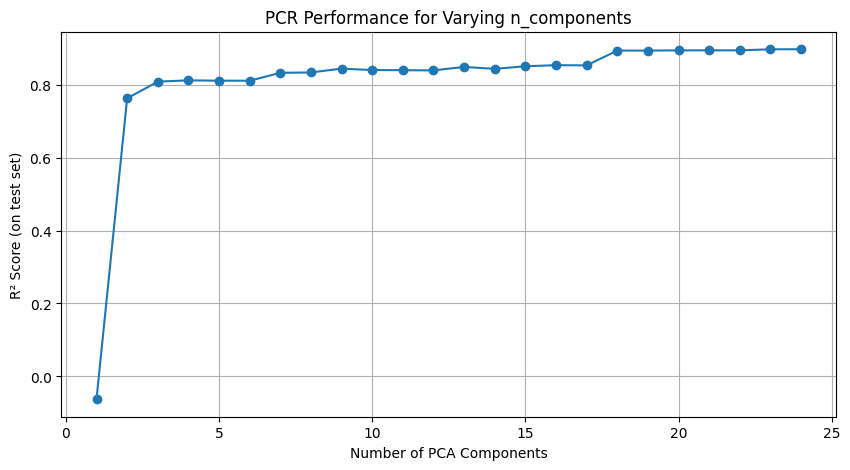

In [ ]:
results = pca_r2_comparison(X, Y, max_components=24)

Variable Selection

In [ ]:
'''import statsmodels.api as sm
import pandas as pd
import numpy as np
from itertools import combinations

def stepwise_selection(X, y):
    initial_features = []
    best_features = initial_features.copy()
    remaining_features = list(X.columns)
    models_info = []  # To store model stats for each iteration

    def model_metrics(X_subset):
        X_model = sm.add_constant(X[X_subset])
        model = sm.OLS(y, X_model).fit()

        # AIC, BIC
        aic = model.aic
        bic = model.bic

        # Adjusted R^2
        adj_r2 = model.rsquared_adj

        # Mallow’s Cp ≈ SSE/σ² - (n - 2p)
        sse = np.sum(model.resid ** 2)
        sigma2 = sse / (X_model.shape[0] - X_model.shape[1])  # MSE
        cp = sse / sigma2 - (X_model.shape[0] - 2 * X_model.shape[1])

        # p-values and partial F-stat
        pvals = model.pvalues.to_dict()
        fval = model.fvalue
        f_pval = model.f_pvalue

        # Store the metrics for the current model
        return {
            'features': X_subset,
            'AIC': aic,
            'BIC': bic,
            'Adj_R2': adj_r2,
            'Cp': cp,
            'F_stat': fval,
            'F_pval': f_pval,
            'p_values': pvals,
            'model': model
        }

    while True:
        changed = False
        scores_with_candidates = []

        # Forward Step
        for new_feature in remaining_features:
            candidate_features = best_features + [new_feature]
            metrics = model_metrics(candidate_features)
            scores_with_candidates.append((metrics['AIC'], new_feature, metrics))

        if not scores_with_candidates:
            break

        scores_with_candidates.sort()
        best_new_score, best_candidate, best_metrics = scores_with_candidates[0]

        if best_candidate not in best_features:
            best_features.append(best_candidate)
            remaining_features.remove(best_candidate)
            models_info.append(best_metrics)  # Store model info at this step
            changed = True

        # Backward Step (only if there are more than 1 feature)
        if len(best_features) > 1:
            scores_with_candidates = []
            for candidate in best_features:
                reduced_features = [f for f in best_features if f != candidate]
                if not reduced_features:
                    continue
                metrics = model_metrics(reduced_features)
                scores_with_candidates.append((metrics['AIC'], candidate, metrics))

            if scores_with_candidates:
                scores_with_candidates.sort()
                best_backward_score, worst_candidate, worst_metrics = scores_with_candidates[0]

                if best_backward_score < best_metrics['AIC']:
                    best_features.remove(worst_candidate)
                    remaining_features.append(worst_candidate)
                    models_info.append(worst_metrics)  # Store model info at this step
                    changed = True

        if not changed:
            break

    # Convert the results into a DataFrame
    results_df = pd.DataFrame([
        {
            'Features': ', '.join(model['features']),
            'AIC': model['AIC'],
            'BIC': model['BIC'],
            'Adj_R2': model['Adj_R2'],
            'Cp': model['Cp'],
            'F_stat': model['F_stat'],
            'F_pval': model['F_pval'],
            'p_values': model['p_values']
        }
        for model in models_info
    ])

    return results_df
'''

"import statsmodels.api as sm\nimport pandas as pd\nimport numpy as np\nfrom itertools import combinations\n\ndef stepwise_selection(X, y):\n    initial_features = []\n    best_features = initial_features.copy()\n    remaining_features = list(X.columns)\n    models_info = []  # To store model stats for each iteration\n\n    def model_metrics(X_subset):\n        X_model = sm.add_constant(X[X_subset])\n        model = sm.OLS(y, X_model).fit()\n\n        # AIC, BIC\n        aic = model.aic\n        bic = model.bic\n\n        # Adjusted R^2\n        adj_r2 = model.rsquared_adj\n\n        # Mallow’s Cp ≈ SSE/σ² - (n - 2p)\n        sse = np.sum(model.resid ** 2)\n        sigma2 = sse / (X_model.shape[0] - X_model.shape[1])  # MSE\n        cp = sse / sigma2 - (X_model.shape[0] - 2 * X_model.shape[1])\n\n        # p-values and partial F-stat\n        pvals = model.pvalues.to_dict()\n        fval = model.fvalue\n        f_pval = model.f_pvalue\n\n        # Store the metrics for the current mode

In [ ]:
import statsmodels.api as sm
import pandas as pd

def stepwise_selection(X, y,
                       initial_features=None,
                       threshold_in=0.1,
                       threshold_out=0.15,
                       max_steps=25,
                       verbose=True):

    included = list(initial_features) if initial_features else []
    step = 0
    model_history = []

    while step < max_steps:
        step += 1
        changed = False

        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)

        for new_col in excluded:
            try:
                model = sm.OLS(y, sm.add_constant(X[included + [new_col]])).fit()
                new_pvals[new_col] = model.pvalues[new_col]
            except:
                new_pvals[new_col] = 1.0

        if not new_pvals.empty:
            best_pval = new_pvals.min()
            if best_pval < threshold_in:
                best_feature = new_pvals.idxmin()
                included.append(best_feature)
                changed = True
                if verbose:
                    print(f"Step {step}: Add {best_feature} with p-value {best_pval:.4f}")

        # Backward step
        if included:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max()

            if worst_pval > threshold_out:
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                changed = True
                if verbose:
                    print(f"Step {step}: Remove {worst_feature} with p-value {worst_pval:.4f}")

        if included:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues_dict = model.pvalues.iloc[1:].to_dict()  # exclude const
            rss = ((model.resid) ** 2).sum()

            # Partial F-statistic per variable (for interpretation)
            f_stats = {}
            for feat in included:
                X_temp = X[included].drop(columns=[feat])
                model_reduced = sm.OLS(y, sm.add_constant(X_temp)).fit()
                rss_reduced = ((model_reduced.resid) ** 2).sum()
                df_diff = 1
                f_stat = ((rss_reduced - rss) / df_diff) / (rss / model.df_resid)
                f_stats[feat] = f_stat

            model_history.append({
                "Step": step,
                "Features": included.copy(),
                "AIC": model.aic,
                "BIC": model.bic,
                "Adj_R2": model.rsquared_adj,
                "R2": model.rsquared,
                "P-Values": pvalues_dict,
                "Partial F": f_stats
            })

        if not changed:
            if verbose:
                print("No further improvement. Ending stepwise selection.")
            break

    if model_history:
        return pd.DataFrame(model_history)
    else:
        print("No variables were selected. Try loosening p-value thresholds.")
        return pd.DataFrame(columns=["Step", "Features", "AIC", "BIC", "Adj_R2", "R2", "P-Values", "Partial F"])


In [ ]:


results_df = stepwise_selection(X_high_vif, Y, threshold_in=0.5, threshold_out=0.7, verbose=True)
pd.set_option('display.max_colwidth', None)
results_df

NameError: name 'X_high_vif' is not defined

In [ ]:
X.head()

In [ ]:
X1=X.drop(columns=['Life expectancy','Urbanisation','Industrialisation','Precipitation(mm)','CO','OC','SO2','BC'])

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                   for i in range(X1.shape[1])]

print(vif_data)

# Model Fitting

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
ridge_alphas = np.logspace(-3, 3, 100)

ridge_model = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Best alpha for Ridge:", ridge_model.alpha_)
print("R² score (Ridge):", ridge_r2)

In [ ]:
lasso_alphas = np.logspace(-3, 3, 100)

lasso_model = LassoCV(alphas=lasso_alphas, cv=5, max_iter=5000, random_state=42)
lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Best alpha for Lasso:", lasso_model.alpha_)
print("R² score (Lasso):", lasso_r2)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def pca_r2_comparison(X, y, max_components=None, test_size=0.2, random_state=42):
    if max_components is None:
        max_components = X.shape[1]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    r2_scores = []
    components = list(range(1, max_components + 1))

    for n in components:
        pipeline = make_pipeline(
            StandardScaler(),
            PCA(n_components=n),
            LinearRegression()
        )
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        r2 = r2_score(y_test, y_pred)  # <- Now it's the real function
        r2_scores.append(r2)

    # Plot R² vs n_components
    plt.figure(figsize=(10, 5))
    plt.plot(components, r2_scores, marker='o')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('R² Score (on test set)')
    plt.title('PCR Performance for Varying n_components')
    plt.grid(True)
    plt.show()

    return dict(zip(components, r2_scores))

In [ ]:
pca_r2_comparison(X1, Y, max_components=16, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Standardize X
X1_std = (X1 - X1.mean()) / X1.std()

# Step 2: Compute Covariance Matrix
cov_matrix = np.cov(X1_std.T)

# Step 3: Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort Eigenvalues and Eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Step 5: Project X onto top n principal components
n_components = 13  # or any number you decide
PCs = np.dot(X1_std, eigenvectors[:, :n_components])

# Step 6: Train-test split
X1_train, X1_test, y_train, y_test = train_test_split(PCs, Y, test_size=0.2, random_state=42)

# Step 7: Fit linear regression on PCs
model = LinearRegression()
model.fit(X1_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X1_test)
r2 = r2_score(y_test, y_pred)

print("R² score on test set:", r2)


Just checking

In [ ]:
import statsmodels.api as sm
import pandas as pd

def stepwise_selection(X, y,
                       initial_features=None,
                       threshold_in=0.1,
                       threshold_out=0.15,
                       max_steps=25,
                       verbose=True):

    included = list(initial_features) if initial_features else []
    step = 0
    model_history = []

    while step < max_steps:
        step += 1
        changed = False

        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)

        for new_col in excluded:
            try:
                model = sm.OLS(y, sm.add_constant(X[included + [new_col]])).fit()
                new_pvals[new_col] = model.pvalues[new_col]
            except:
                new_pvals[new_col] = 1.0

        if not new_pvals.empty:
            best_pval = new_pvals.min()
            if best_pval < threshold_in:
                best_feature = new_pvals.idxmin()
                included.append(best_feature)
                changed = True
                if verbose:
                    print(f"Step {step}: Add {best_feature} with p-value {best_pval:.4f}")

        # Backward step
        if included:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max()

            if worst_pval > threshold_out:
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                changed = True
                if verbose:
                    print(f"Step {step}: Remove {worst_feature} with p-value {worst_pval:.4f}")

        if included:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues_dict = model.pvalues.iloc[1:].to_dict()
            rss = ((model.resid) ** 2).sum()

            # Partial F-statistic for each variable
            f_stats = {}
            for feat in included:
                X_temp = X[included].drop(columns=[feat])
                model_reduced = sm.OLS(y, sm.add_constant(X_temp)).fit()
                rss_reduced = ((model_reduced.resid) ** 2).sum()
                df_diff = 1
                f_stat = ((rss_reduced - rss) / df_diff) / (rss / model.df_resid)
                f_stats[feat] = f_stat

            model_history.append({
                "Step": step,
                "Features": included.copy(),
                "AIC": model.aic,
                "BIC": model.bic,
                "Adj_R2": model.rsquared_adj,
                "R2": model.rsquared,
                "P-Values": pvalues_dict,
                "Partial F": f_stats
            })

        if not changed:
            if verbose:
                print("🔕 No further improvement. Ending stepwise selection.")
            break

    if model_history:
        return pd.DataFrame(model_history)
    else:
        print("⚠️ No variables were selected. Try loosening p-value thresholds.")
        return pd.DataFrame(columns=["Step", "Features", "AIC", "BIC", "Adj_R2", "R2", "P-Values", "Partial F"])


In [ ]:
results_df = stepwise_selection(X, Y, threshold_in=0.5, threshold_out=0.7, verbose=True)
pd.set_option('display.max_colwidth', None)
results_df